# **XGBOOST와 사이킷런을 활용한 그레이디언트 부스팅 책**을 참고하였습니다.

- 데이터 및 코드 참고 : https://github.com/rickiepark/handson-gb

# 1장. 배깅과 부스팅

### Xgboost란

- 부스팅의 일반적인 아이디어는 약한 학습기를 반복적으로 오차를 개선하여 강한 학습기로 바꾸는 것.

- Gradient Boosting의 핵심 아이디어는 Gradient Descent을 사용해 잔차를 최소화 하는 것.

- xgboost는 Extreme Gradient Boosting의 약자.

- Extreme은 정확도와 속도를 달성하기 위해 계산량을 극대화하는 것을 의미.

- xgboost가 대회에서 압도적으로 캐글에서 우승을 하였습니다.


## 데이터 랭글링
- 다양한 데이터 소스의 데이터를 통합하고 쉽게 액세스하고 분석할 수 있도록 정리하는 프로세스

- 데이터 로딩, 데이터 정제, 데이터 분석, 데이터 조작이 모두 데이터 랭글링이다.


In [ ]:
!pip install --upgrade xgboost

- 리눅스 q 옵션 :q를 입력하면 화면의 왼쪽 아래에 글자가 입력되고 커서가 깜박일텐데 이렇게 작동하는 모드를 'ex모드' 또는 '라인 명령 모드'

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter01/bike_rentals.csv

- 데이터 랭글링

 - pandas의 책 참고 : hand on data analysis with pandas, packt publishing(2019)

In [ ]:
# pandas import
import pandas as pd

In [ ]:
#bike_rentel.csv를 data frame로 읽기
df_bikes = pd.read_csv('/content/bike_rentals.csv')

- y data profiling(https://post.naver.com/viewer/postView.nhn?volumeNo=36354809&memberNo=412918&isInf=true)

In [ ]:
!pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0dc05f1580c5321246ace96b8f84dd38a004356bf2ec1c9778cd684a7641b67c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import ydata_profiling
pr = df_bikes.profile_report()
pr

In [ ]:
pr.to_file('./pr_report.html') #report html 저장

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [ ]:
df_bikes.isnull().sum()
#df_bikes.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#누락된 값 출력
df_bikes[df_bikes.isna().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
#누락된 값 고치기 -> 중앙값이나 평균으로 바꾸기.
##windspeed의 누락된 값을 중간값으로 채우기
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace = True)
df_bikes.isna().sum()

<ipython-input-12-c7fd7aeb3cad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace = True)


,0
instant,0
dteday,0
season,0
yr,1
mnth,1
holiday,0
weekday,0
workingday,0
weathersit,0
temp,1


- Tip) 종종 중간값을 선택하는 것이 평균보다 좋습니다. 중간값을 데이터의 절반이 이보다 크고 나머지 절반은 작다는 것을 보장합니다. 이와 달리 평균은 이상치에 취약합니다.

In [ ]:
#인덱스 56과 81의 행을 출력
df_bikes.iloc[[56,81]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121


In [ ]:
#중간값이나 평균으로 groupby
##season으로  groupby한 중간값을 얻음.
df_bikes.groupby(['season']).median()

TypeError: agg function failed [how->median,dtype->object]

In [ ]:
# 'hum' 열의 누락된 값을 season의 중간값으로 바꿈.
df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))

- 특정 행에서 중간값이나 평균을 취하기

In [ ]:
# 'temp' 열의 누락된 값을 확인합니다.
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [ ]:
#temp의 결측치를 확인해보자.
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [ ]:

# temp와 atemp의 평균을 계산합니다.#701의 어제와 내일 온도의 평균을 계산
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2

# 누락된 값을 평균 온도로 대체합니다.
df_bikes['temp'].fillna((mean_temp), inplace=True)
df_bikes['atemp'].fillna((mean_atemp), inplace=True)

In [ ]:
df_bikes.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- 날짜 추정하기

In [ ]:
# 'dteday' 열을 datetime 객체로 바꿉니다.
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'])

In [ ]:
df_bikes['dteday'].apply(pd.to_datetime, infer_datetime_format=True, errors='coerce')

<ipython-input-53-43714c98bdd4>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_bikes['dteday'].apply(pd.to_datetime, infer_datetime_format=True, errors='coerce')


0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

- 공식 문서 : to_datetime(https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

- infer_datetime_format=True 로 두면 알아서 format을 바꿔줌
-  날짜/시간 포맷을 추정해서 잘 파싱해줍니다.

- errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
  - If 'raise', then invalid parsing will raise an exception.

 - If 'coerce', then invalid parsing will be set as NaT.

 - If 'ignore', then invalid parsing will return the input.

- 블로그 참고 : [Pandas] 일자와 시간(dt) 처리법(https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221603462366)

In [ ]:
df_bikes['dteday'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: dteday, Length: 731, dtype: int32

In [ ]:
# datetime을 import
import datetime as dt
df_bikes['mmth'] = df_bikes['dteday'].dt.month
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mmth
726,727,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,12
727,728,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,12
728,729,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,12
729,730,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,12
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,12


- 인덱스 730 행의 'yr'열을 1.0으로 바꿈.

In [ ]:
df_bikes.loc[730,'yr']=1.0
df_bikes.loc[730,'mnth']=12.0

In [ ]:
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mmth
726,727,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,12
727,728,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,12
728,729,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,12
729,730,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,12
730,731,2012-12-31,1.0,1.0,12.0,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,12


In [ ]:
#수치형이 아닌 열 삭제하기
# 'dteday' 열을 삭제합니다.
df_bikes = df_bikes.drop('dteday', axis=1)

In [ ]:
df_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mmth
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,12
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,12
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,12
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,12


- target : df_bikes['cnt'] : 해당 날의 자전거 대여 횟수
- df_bikes['casual'],df_bikes['registered']의 합인 df_bikes['cnt']이다.

- 두 열을 더해서 정확한 값을 얻을 수 있기 때문에 100% 정확한 예측은 안됨.

- 이론적으로는 완벽한 예측이 이상적이지만 실전에서는 두 열의 값을 알 수 없음.


In [ ]:
#회귀 모델 적용하기.
# 'casual', 'registered' 열을 삭제합니다.
df_bikes = df_bikes.drop(['casual', 'registered'], axis=1)

In [ ]:
#나중을 위해서 데이터 저장.
# 'bike_rentals_cleaned.csv' 파일로 저장합니다.
df_bikes.to_csv('bike_rentals_cleaned.csv', index=False)

In [ ]:
#특성과 타깃 준비하기
# X와 y로 데이터를 나눕니다.
X = df_bikes.iloc[:,:-2]
y = df_bikes.iloc[:,-2]

In [ ]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
#sklearn 사용.
# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split

# LinearRegression 클래스를 임포트합니다.
from sklearn.linear_model import LinearRegression

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
#warnings 끄기
# 경고를 표시하지 않습니다.
import warnings
warnings.filterwarnings('ignore')


#xgboost의 경고를 끄는 법.
import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
#선형 회귀 모델 만들기.
# LinearRegression 모델 객체를 만듭니다.
lin_reg = LinearRegression()

# 훈련 데이터로 lin_reg 객체를 훈련합니다.
lin_reg.fit(X_train, y_train)

# lin_reg 객체를 사용해 X_test에 대한 예측값을 만듭니다.
y_pred = lin_reg.predict(X_test)

# mean_squared_error 함수를 임포트합니다.
from sklearn.metrics import mean_squared_error

# numpy를 임포트합니다.
import numpy as np

# mean_squared_error 함수로 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 898.21


In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

898.207651372443

In [ ]:
# 'cnt' 열의 통계를 출력합니다.
df_bikes['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# 튜닝할 파라미터 딕셔너리
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드의 최소 샘플 수
    'max_features': [None, 'sqrt', 'log2'],  # 분할에 사용할 특성 수
    'criterion': ['mse', 'friedman_mse', 'mae']  # 분할 품질 평가 기준
}

# DecisionTreeRegressor 객체 생성
dt_reg = DecisionTreeRegressor()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# 훈련 데이터로 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측 수행
best_dt_reg = grid_search.best_estimator_
y_pred_best_dt = best_dt_reg.predict(X_test)

# 평균 제곱 오차 계산
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)

# 평균 제곱근 오차 계산
rmse_best_dt = np.sqrt(mse_best_dt)

# 최적 모델의 RMSE 출력
print("RMSE (Best Decision Tree): %0.2f" % (rmse_best_dt))

- XGBRegressor

In [ ]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor의 객체 xg_reg를 만듭니다.
xg_reg = XGBRegressor()

# 훈련 데이터로 xg_reg 객체를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트의 레이블을 예측합니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 693.21


In [ ]:
xg_reg.score(X_train,y_train)

0.9999518246062657

- 교차 검증


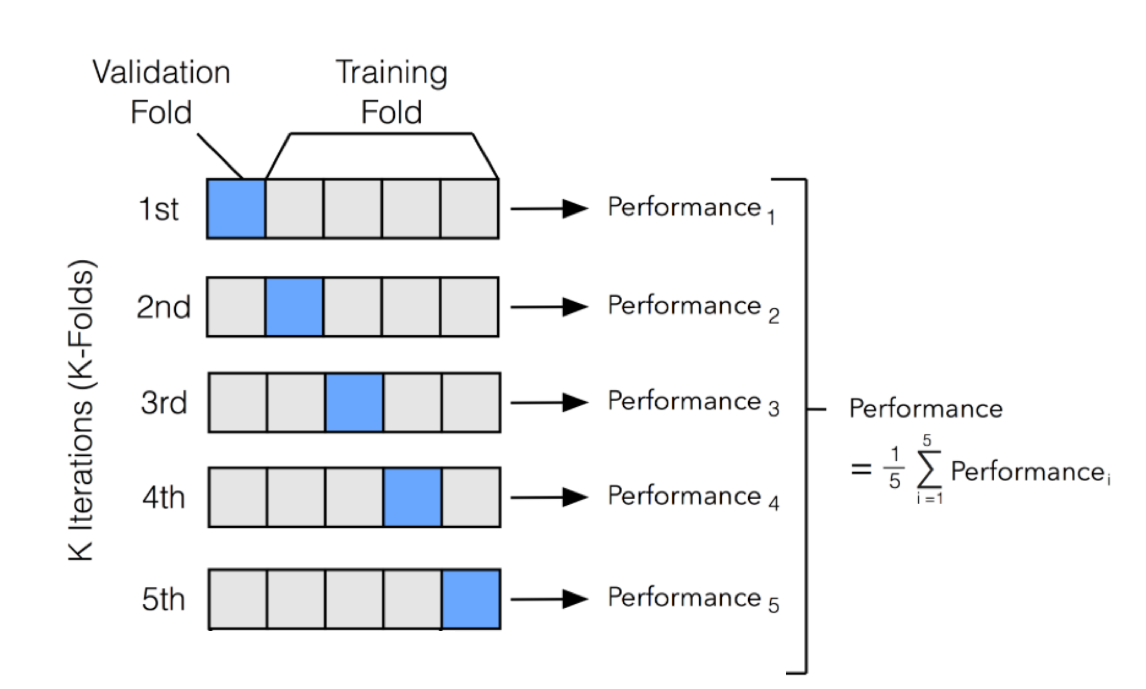

In [ ]:
# cross_val_score 함수를 임포트합니다.
from sklearn.model_selection import cross_val_score

# LinearRegression 클래스 객체를 만듭니다.
model = LinearRegression()

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# 이 점수의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('회귀 rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

회귀 rmse: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
RMSE 평균: 972.02


- Tip) 왜 scoring = 'neg_mean_squared_error'라고 쓸까? 사이킷런은 모델을 훈련할 때, 높은 점수가 좋은 것으로 간주함. 정확도는 이에 맞지만 낮을수록 좋은 오차는 이와 반대입니다. 평균 제곱 오차에 음수를 취하면 가장 낮은 값이 가장 높은 값이 됩니다. 나중에 rmse = np.sqrt(-scores)라고 바꾸기 때문에 최종 결과는 양수가 됨.

- Tip) scoring 매개변수를 'neg_mean_squared_error' 대신에 'neg_root_mean_squared_error'로 지정하면 평균 제곱근 오차가 계산됨. cross_val_score()는 단순히 cross_validate()를 감싼 함수. cross_validate()를 사용하면 scoring 매개변수에 여러 개의 측정 지표를 지정할 수 있고 훈련 폴드에 대한 점수도 반환함. cross_validate()를 사용하면 교차 검증 코드를 다음과 같이 쓸 수 있음.


```
# 코드로 형식 지정됨
from sklearn.model_selection improt cross_validate
cv_results = cross_validate(model,X,y,cv=10, scoring='neg_root_mean_squared_error')
print(-np.mean(cv_results['test_score']))
```



In [ ]:
-np.mean(cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=10))

972.0234147419284

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, scoring='neg_root_mean_squared_error', cv=10)
-np.mean(cv_results['test_score'])

972.0234147419284

- 모델의 성능에 대한 더 나은 추정값을 얻을려면, 항상 교차 검증을 사용하는 것이 좋음.

- XGBoost 교차 검증

In [ ]:
# XGBRegressor 객체를 만듭니다.
model = XGBRegressor(objective="reg:squarederror")

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# 이 점수의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('회귀 rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

회귀 rmse: [ 869.03  902.85  556.63  685.42  890.73  930.6   890.65  879.29  747.78
 2067.64]
RMSE 평균: 942.06


### 분류 모델 만들기

- 데이터 랭글링
 - 데이터 적재

In [ ]:
# UCI 머신러닝 저장소에서 인구 조사 데이터셋(adult)을 로드합니다.
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# 처음 다섯 개 행을 출력합니다.
df_census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


- 출력을 보게 되면, 첫번째 행이 열 제목으로 들어가 있음. 이럴 때는 header=None 으로 데이터를 다시 로드

In [ ]:
# 헤더가 없는 데이터셋을 로드합니다.
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# 처음 다섯 개 행을 출력합니다.
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- 출력을 보게 되면 열 이름이 숫자로만 나와 있음. 이 열이름은 인구 조사 소득 데이터셋 웹 사이트(https://archive.ics.uci.edu/ml/datasets/Census+Income) 에서 Attribute Information 아래 나와 있음.

In [ ]:
# df_census 열 이름을 정의합니다.
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                   'income']

# 처음 다섯 개 행을 출력합니다.
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#누락된 값.
# df_census 정보를 출력합니다.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- 모든 열의 Non-Null Count가 모두 동일하므로 이 데이터에는 누락된 값이 없다.

- df_census의 dataframe을 살펴보니, education 열과 education_num열이 있음.
- education_num열은 education 열을 숫자로 변환한 것.
- 두 열이 동일한 정보를 가지고 있기 때문에 education열은 삭제할 수 있음

In [ ]:
#수치형이 아닌 열
# education 열을 삭제합니다.
df_census = df_census.drop(['education'], axis=1)

- Pandas의  get_dummies 참고) https://devuna.tistory.com/67

- Tip) pd.get_dummies() 함수를 사용하면, 데이터프레임의 용량이 증가할 수 있으므로, dataframe의 info() 메서드 출력의 마지막 라인에서 메모리 사용량(Memory usage)을 확인하세요.
- 희소 행렬(Sparse Matrix)은 0을 저장하지 않고, 1만 저장하기 때문에 메모리 절약을 할 수 있습니다.

- 참고) https://thesauro.tistory.com/entry/%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0-%EA%B3%B5%EB%B6%807-%ED%9D%AC%EC%86%8C-%ED%96%89%EB%A0%AC

In [ ]:
# get_dummies를 사용해 숫자가 아닌 열을 바꿉니다.
df_census = pd.get_dummies(df_census)

# 처음 다섯 개 행을 출력합니다.
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


- 소득이 5만 달러 이상인지 아닌지가 target

In [ ]:
#특성과 타깃 데이터
# 'income_ <=50K' 열을 삭제합니다.
df_census = df_census.drop('income_ <=50K', axis=1)

In [ ]:
 #데이터를 X와 y로 나눕니다.
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [ ]:
#로지스틱 회귀
# LogisticRegression을 임포트합니다.
from sklearn.linear_model import LogisticRegression

In [ ]:
#교차 검증 함수
# classifier와 num_splits 매개변수를 가진 cross_val 함수를 정의합니다.
def cross_val(classifier, num_splits=10):

    # 분류 모델 생성
    model = classifier

    # 교차 검증 점수 얻기
    scores = cross_val_score(model, X, y, cv=num_splits)

    # 정확도 출력
    print('정확도:', np.round(scores, 2))

    # 평균 정확도 출력
    print('평균 정확도: %0.2f' % (scores.mean()))

In [ ]:
# LogisticRegression으로 cross_val 함수를 호출합니다.
cross_val(LogisticRegression())

정확도: [0.8  0.8  0.79 0.8  0.79 0.81 0.79 0.79 0.8  0.8 ]
평균 정확도: 0.80


- XGboostClassifier

In [ ]:
# XGBClassifier를 임포트합니다.
from xgboost import XGBClassifier



```
# 코드로 형식 지정됨
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.1, max_delta_step=0, max_depth=5,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None)
```



- Xgboost의 하이퍼 파라미터는 다양한 하이퍼 파라미터가 존재함.
    - 일반 파라미터 : 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다.
        -  booster[기본값=gbtree]
            - 어떤 부스트 구조를 쓸지 결정하는 것.
            - 의사결정기반 모형(gbtree), 선형 모델(gblinear),dart가 있다.
        -  n_jobs
            - xgboost를 실행하는데 사용되는 병렬 스레드 수
        -  verbosity[기본값=1]
            - 유효한 값은 0(무음), 1(경고), 2(정보), 3(디버그)
    - 부스트 파라미터 : 선택한 부스터에 따라서 적용할 수 있는 파라미터 종류가 다르다.
        - gbtree Booster의 파라미터
            - learning_rate['기본값':0.3]
                - learning_rate값, learning_rate가 높을수록 과적합 하기 쉽다.
            - n_estimators : 생성할 weak learner의 수
                - learning_rate가 낮을 땐, n_estimators를 높여야 과적합이 방지 됨.
            - max_depth[기본값 : 6]
                - 트리의 maximum depth이다.
                - 적절한 값이 제시되어야 하고 보통 3~10 사이 값이 적용됨.
                - max_depth가 높을수록 모델의 복잡도가 커져 과적합 하기 쉽다.
            - min_child_weight [기본값 1]
                - 관측치에 대한 가중치 합의 최소를 말함.
                - 값이 높을수록 과적합이 방지 됨.
            - gamma[기본값:0]
                - leaf node의 추가분할을 결정할 최소손실 감소값.
                - 해당값보다 손실이 크게 감소할 때 분리한다.
                - 값이 높을수록 과적합이 방지됨.
            - subsample[기본값:1]
                - weak learner가 학습에 사용하는 데이터 샘플링 비율이다. / 보통 0.5 ~ 1이 사용됨.
                - 값이 낮을수록 과적합이 방지 됨.
            - colsample_bytree[기본값:1]
                - 각 tree 별 사용된 feature의 percentage 이다. / 보통 : 0.5 ~ 1이 사용됨.
                - 값이 낮을수록 과적합이 방지 됨.
            - lambda [기본값=1, 별칭 : reg_lambda]
                - 가중치에 대한 L2 Regulization 적용 값이다.
                - 피처 개수가 많을 때 적용을 검토한다.
                - 이 값이 클수록 과적합 감소 효과가 있다.
            - alpha [기본값 = 0, 별칭 reg_alpha]
                - 가중치에 대한 L1 Regulization 적용 값이다.
                - 피쳐 개수가 많을 때, 적용을 검토한다.
                - 이 값이 클수록 과적합 감소 효과가 있다.

    - 학습 과정 파라미터 : 학습 시나리오를 결정한다.
        - object [기본값 : reg = squared error]
            - reg : squared error
                - 제곱 손실이 있는 회귀
            - binary : logistic(binary-logistic classification)
                - 이항 분류 문제 로지스틱 회귀 모형으로 반환값이 클래스가 아니라 예측 확률
            - multi : softmax
                - 다항 분류 문제의 경우 Softmax를 사용해서 분류한느데 반환되는 값이 예측확률이 아니라 클래스이다. 또한 num_class도 지정해야 한다.
            - multi : softprob
                - 각 클래스에 범주에 속하는 예측 확률을 반환한다.
            - count : poisson(count data poison regression) 등 다양함.

**eval_metric**

- 모델의 평가 함수를 조정하는 함수다.
- 설정한 objective 별로 기본설정값이 지정되어 있다.
- rmse: root mean square error
- mae: mean absolute error
- logloss: negative log-likelihood
- error: Binary classification error rate (0.5 threshold)    
- merror: Multiclass classification error rate
- mlogloss: Multiclass logloss
- auc: Area under the curve
- map (mean average precision)등, 해당 데이터의 특성에 맞게 평가 함수를 조정한다.
- seed [ 기본값 : 0 ]
    - 재현가능하도록 난수를 고정시킴.

**민감하게 조정해야하는 것**
- booster 모양
- eval_metric(평가함수) / objective(목적함수)
- eta
- L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
- L2 form

**과적합 방지를 위해 조정해야하는 것**

- learning rate 낮추기 → n_estimators은 높여야함
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기

In [ ]:
# XGBClassifier로 cross_val 함수를 호출합니다.
cross_val(XGBClassifier(n_estimators=5))

정확도: [0.85 0.86 0.86 0.85 0.86 0.86 0.86 0.87 0.86 0.86]
평균 정확도: 0.86


- 시각화
 - Xgboost 모형을 시각화 함으로써 예측 모형의 성능에 대해 더 깊은 이해를 가질 수 있다.

In [ ]:
# XGBClassifier로 cross_val 함수를 호출합니다.
cross_val(XGBClassifier(n_estimators=7))

정확도: [0.85 0.86 0.87 0.85 0.86 0.86 0.87 0.87 0.87 0.86]
평균 정확도: 0.86


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
# XGBClassifier를 임포트합니다.
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

scores = xgb.score(X_test,y_test)
# 정확도 출력
print('정확도:', np.round(scores, 2))

정확도: 0.87


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

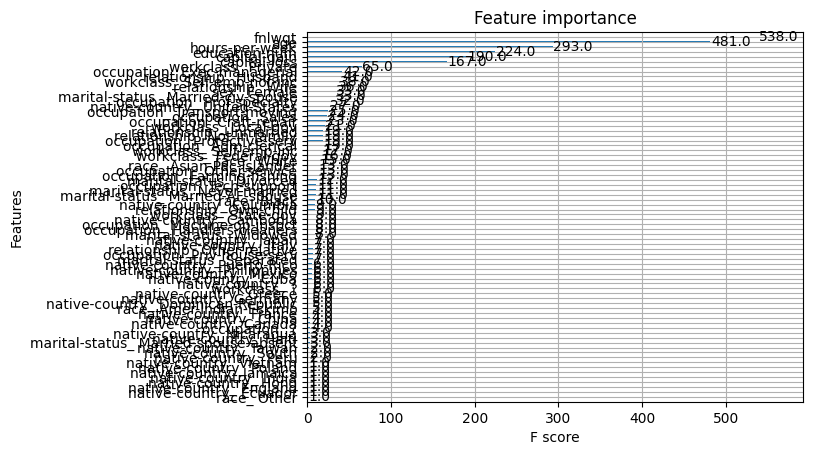

In [ ]:
from xgboost import plot_importance
plot_importance(xgb)

# 2장. 결정트리

- 결정트리는 과적합 되기가 쉽다.
- 가지(branch) 분할을 통해 데이터를 두 개의 노드(node)로 나눔.
- 가지 분할은 예측을 만드는 리프 노드(leaf node)까지 계속 됩니다.

## 결정트리는 초기값에 민감하다. 런타임을 삭제 후에 다시 시도 할것.

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter02/census_cleaned.csv
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter02/bike_rentals_cleaned.csv
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter02/heart_disease.csv

In [ ]:
# 판다스와 넘파이를 임포트합니다.
import pandas as pd
import numpy as np

# 경고를 끕니다.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_census

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# 'census_cleaned.csv' 데이터셋을 로드합니다.
df_census = pd.read_csv('census_cleaned.csv')

# 데이터를 X와 y로 나눕니다.
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
# DecisionTreeClassifier를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score

# 분류 모델을 만듭니다.
clf = DecisionTreeClassifier(random_state=2)

# 훈련 데이터로 모델을 훈련합니다.
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 만듭니다.
y_pred = clf.predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_pred, y_test)

0.8131679154894976

In [ ]:
clf.score(X_test, y_test)

0.8131679154894976

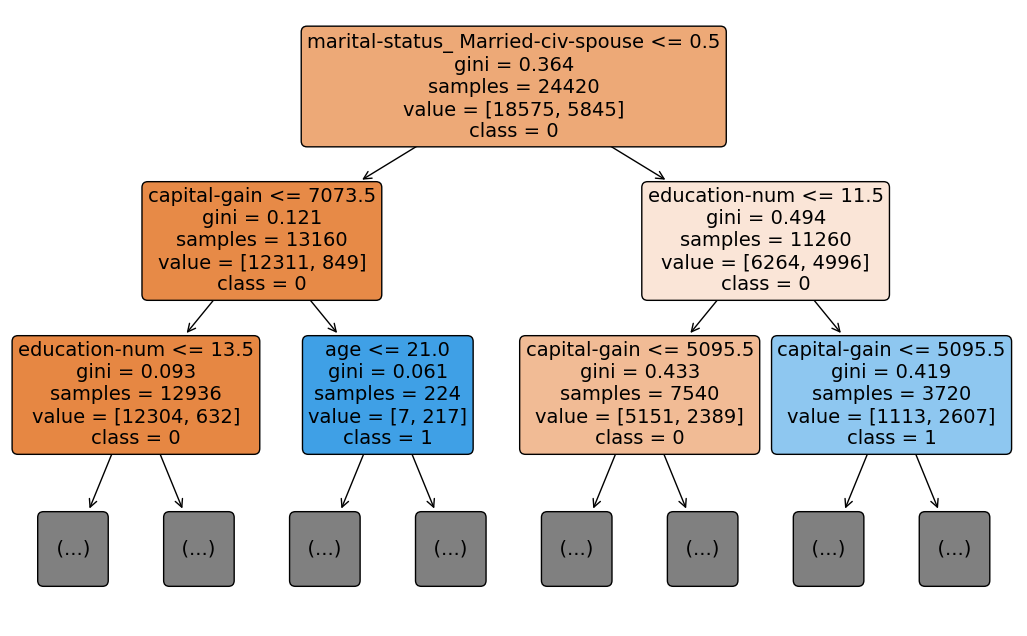

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(13,8))
plot_tree(clf, max_depth=2, feature_names=list(X.columns), class_names=['0', '1'],
          filled=True, rounded=True, fontsize=14)
plt.show()

- 분할에서 왼쪽이 True, 오른쪽이 False

### 결정 트리 hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split
# bike_rentals_cleaned 데이터셋을 로드합니다.
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# LinearRegression을 임포트합니다.
from sklearn.linear_model import LinearRegression

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [ ]:
# DecisionTreeRegressor를 임포트합니다.
from sklearn.tree import DecisionTreeRegressor

# cross_val_score를 임포트합니다.
from sklearn.model_selection import cross_val_score

In [ ]:
# DecisionTreeRegressor 객체를 만듭니다.
reg = DecisionTreeRegressor(random_state=2)

# 평균 제곱 오차로 교차 검증 점수를 계산합니다.
scores = cross_val_score(reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=5)

# 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균을 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

RMSE 평균: 1233.36


In [ ]:
# DecisionTreeRegressor를 훈련 세트에서 훈련하고 점수를 계산합니다.
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

- 분산이 크다는 것을 의미한다.

- Deicison Tree(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어에 사용.
    - default는 2이다. 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가.

- min_samples_leaf
    - 말단 노드가 되기위한 최소한의 샘플 수
    - 과적합 제어 용도. 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 이 경우에는 작게 설정.

- max_features
    - 최적의 분할을 위해 고려할 최대 feature 개수. default는 None으로 데이터 세트의 모든 feature을 사용하여 분할.
    - int로 지정 시 대상 feature 개수, float로 지정 시 전체 feature중 대상 feature의 퍼센트
    - sqrt는 전체 feature중 제곱근 값.
    - auto는 sqrt와 동일
    - log는 전체 featur을 log2()로 선정
- max_depth
    - 트리의 최대 깊이 지정
    - default는 None. 이는 완벽히 클래스 결정값이 될때 까지 깊이를 계속 키우거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때 까지 계속 분할
    - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적당한 값으로 제어.
- max_leaf_nodes
    - 말단 노드 최대 개수
- splitter
    - 'random'과 'best' 두가지가 있음.
    - splitter는 노드를 분할하기 위한 특성 선택 방법
    - 'best'는 정보 이득(Information gain)이 가장 큰 특성을 선택함. /  criterion 매개변수에 지정된 측정 지표를 가장 크게 줄이는 특성
    - 'random'은 랜덤하게 분할을 함.

    -  splitter를 'random'으로 바꾸면, 과대적합을 막고, 다양한 트리를 만들 수 있음.

- criterion
    - 분할 품질을 측정할 수 있는 방법을 제공.
    - 지정한 함수를 가능한 분할마다 곗나하여 비교하여 가장 좋은 점수를 얻은 분할이 선택됨.
    
    - 회귀인 경우, 'squared error', 'friedman_mse'(프리디만이 제안한 방식), 'absolute_error'(평균 절댓값 오차), 'poisson'(포아송 편차)가 있음.
    - 기본값은 'squared error'
    
    - 분류 모델인 경우, gini(기본값) 과 entropy가 있음. 일반적으로 두 옵션은 비슷한 결과를 만듦.

- min_impurity_decrease
    - 분할하기 위한 최소 불순도 감소(분할하기 위한 최소 불순도를 지정하는 min_impurity_split 매개변수는 scikit-learn 0.23버전에서 삭제됨.

- min_weight_fraction_leaf
    - 리프 노드가 되기 위한 전체 가중치의 최소 비율.
    -  sample_weight 매개변수를 지정하지 않으면 샘플은 모두 동일한 가중치를 가짐.

    - min_weight_fraction_leaf는 분산을 줄이고 과대적합을 막을 수 있는 또 다른 하이퍼 파리머임.

- ccp_alpha
    - 트리를 만든 후 가지치기 하는 기능.
    - 참고 : https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    


- DecisionTreeRegressor의 max_depth 매개변수 기본값이 None이기 때문에, 모든 leaf node가 순수 노드(Pure node)가 될 때까지 트리가 성장.
- 회귀 모델의 타깃은 임의의 실수이기 때문에, 리프 노드가 순수 노드가 될 때까지 성장하면 대부분 leaf node에 샘플이 하나씩만 들어간다. 이런 몯델을 과대적합된 모델이며 테스트 셋에서 좋은 성능을 내기 힘듦.


- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
- 훈련된 reg 객체에 tree_ 속성에 훈련된 트리 객체가 저장되어 있음.
- node_count : 트리의 전체 노드 개수가 저장.
- children_left, children_right : 자식 노드의 인덱스를 담고 있음.
- n_node_samples : 각 노드에 포함되는 샘플 개수가 저장.

In [ ]:
leaf_node_count = 0
tree = reg.tree_
for i in range(tree.node_count):
    if (tree.children_left[i] == -1) and (tree.children_right[i] == -1):
        leaf_node_count += 1
        if tree.n_node_samples[i] > 1:
            print('노드 인덱스:', i, ', 샘플 개수:', tree.n_node_samples[i])
print('전체 리프 노드 개수:', leaf_node_count)

노드 인덱스: 124 , 샘플 개수: 2
전체 리프 노드 개수: 547


- leaf_node의 전체 개수는 547개로, 훈련 크기 548개로 거의 비슷함. -> 차이 나는 이유는 두 개의 샘플이 포함된 리프 노드가 하나 있기 때문.

- GridSearchCV
 - 교차 검증과 하이퍼 파라미터 튜닝을 동시에 수행
 - 하이퍼 파라미터는 머신러닝 알고리즘 중 중요하다고 생각되는 구성 요소이며 이 값을 조정하는 튜닝 과정을 통해 알고리즘의 예측 성능을 개선

 - 교차 검증 기반으로 지정된 파라미터들을 순차적으로 적용해보며 최적의 파라미터 값을 찾아준다. 이 때문에 최적의 파라미터를 알 수 있으나 시간이 오래 걸린다.

In [ ]:
# GridSearchCV를 임포트합니다.
from sklearn.model_selection import GridSearchCV

# max_depth(트리의 깊이 제한) 매개변수를 선택합니다.
params = {'max_depth':[None,2,3,4,6,8,10,20]}

# 회귀 모델을 만듭니다.
reg = DecisionTreeRegressor(random_state=2)

# GridSearchCV 객체를 초기화합니다.
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error',
                        cv=5, return_train_score=True, n_jobs=-1)

# X_train와 y_train로 그리드 서치를 수행합니다.
grid_reg.fit(X_train, y_train)

# 최상의 매개변수를 추출합니다.
best_params = grid_reg.best_params_

# 최상의 매개변수를 출력합니다.
print("최상의 매개변수:", best_params)

최상의 매개변수: {'max_depth': 6}


- Tip) 일반적으로 max 이름을 가진 매개변수로 감소시키고 min 이름을 가진 매개변수를 증가시키면 분산을 줄이고 과대적합을 방지합니다.


In [ ]:
# 최상의 점수를 계산합니다.
best_score = np.sqrt(-grid_reg.best_score_)

# 최상의 점수를 출력합니다.
print("훈련 점수: {:.3f}".format(best_score))

훈련 점수: 951.398


In [ ]:
# 최상의 모델을 추출합니다.
best_model = grid_reg.best_estimator_

# 테스트 세트에서 예측을 만듭니다.
y_pred = best_model.predict(X_test)

# mean_squared_error를 임포트합니다.
from sklearn.metrics import mean_squared_error

# 테스트 세트의 제곱근 오차를 계산합니다.
rmse_test = mean_squared_error(y_test, y_pred)**0.5

# 테스트 세트 점수를 출력합니다.
print('테스트 점수: {:.3f}'.format(rmse_test))

테스트 점수: 864.670


- 분산이 줄어들은 것을 확인할 수 있다.

- min_samples_leaf
 - 리프 노드가 가질 수 있는 최소 샘플의 개수를 제한. max_depth와 마찬가지로 min_samples_leaf는 **과대적합**을 방지.

In [ ]:
# grid_search 함수를 만듭니다.
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # GridSearchCV 객체를 만듭니다.
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

    # X_train와 y_train에서 그리드 서치를 수행합니다.
    grid_reg.fit(X_train, y_train)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 계산합니다.
    best_score = np.sqrt(-grid_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = grid_reg.predict(X_test)

    # 평균 제곱근 오차를 계산합니다.
    rmse_test = mean_squared_error(y_test, y_pred)**0.5

    # 테스트 세트 점수를 출력합니다.
    print('테스트 점수: {:.3f}'.format(rmse_test))

- Tip) 함수를 작성할 때, 키워드 매개변수의 기본값을 포함하는 것이 좋습니다. 키워드 매개변수에 기본값을 지정하면 테스트할 때나 나중에 바꿀 수 있습니다. 키워드 매개변수 기본값을 사용하면 파이썬을 훨썬 더 잘 활용할 수 있습니다.

In [ ]:
X_train.shape

(548, 12)

In [ ]:
grid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30]})

최상의 매개변수: {'min_samples_leaf': 8}
훈련 점수: 896.083
테스트 점수: 855.620


In [ ]:
grid_search(params={'max_depth':[None,2,3,4,6,8,10,20],'min_samples_leaf':[1,2,4,6,8,10,20,30]})

최상의 매개변수: {'max_depth': 6, 'min_samples_leaf': 2}
훈련 점수: 870.396
테스트 점수: 913.000


In [ ]:
grid_search(params={'max_depth':[6,7,8,9,10],'min_samples_leaf':[3,5,7,9]})

최상의 매개변수: {'max_depth': 9, 'min_samples_leaf': 7}
훈련 점수: 888.905
테스트 점수: 878.538


- GridSearchCV 클래스의 생성자 정리(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

    - estimator : classifier, regressor, pipeline 등 가능

    - param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.

    - scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.

    - cv : 교차 검증에서 몇개로 분할되는지 지정한다.

    - refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

- Tip) 결정 트리 하이퍼 파라미터는 모두 사용하기에 너무 많습니다. 경험적으로 보았을 때, max_depth, max_features, min_samples_leaf, max_leaf_nodes, min_impurity_decrease, min_samples_split으로도 충분함.

### 사례 연구 - 심장 질환

In [ ]:
# heart_disease.csv를 데이터프레임으로 로드합니다.
df_heart = pd.read_csv('heart_disease.csv')

# 처음 다섯 개 행을 출력합니다.
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- target : binary value(1: 심장 질환 있는 사람 / 0:그렇지 않다)
- age : 나이
- sex : 성별(1=남성,0=여성)
- cp : 가슴 통증(chest pain) (1=전형적인 협심증, 2= 비전형적인 협심증, 3=협심증이 아닌 통증, 4=무증상)
- trestbps : 안정혈압 (입원시 mmHg)
- chol : 혈청 콜레스테롤(serum cholesterol)(mg/dl)
- fbs : 공복혈당 > 120 mg/dl (1=True, 0=False)
- restecg : 심전도 결과(0=정상, 1=ST-T파 이상)(T파 반전 및 또는 0.05mV 이상의 ST 상승 또는 감소), 2 = Estes 기준에 의해 좌심실 비대증 가능성 또는 유력
- thalach : 최대 심장 박동수
- exang : 운동으로 인한 협심증(1=yes, 2=no)
- oldpeak : 휴식 대비 운동으로 인한 ST 감소
- slope : 최대 운동 ST 세그먼트 기울기(1=상승 기울기, 2=수평,3=하강 기울기)
- ca : 형광 투시로 착색된 주요 혈관(0-3)
- thal : 탈륨 스트레스 테스트(3=정상, 6=고정 결합, 7=가역적 결함)

In [ ]:
# 데이터를 X와 y로 나눕니다.
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

- 결정 트리 분류기

In [ ]:
# DecisionTreeClassifier 객체를 만듭니다.
model = DecisionTreeClassifier(random_state=2)

# 교차 검증 점수를 계산합니다.
scores = cross_val_score(model, X, y, cv=5)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 평균 정확도를 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.74 0.85 0.77 0.73 0.7 ]
정확도 평균: 0.76


-  RandomizedSearchCV
    - RandomizedSearchCV는 GridSearch 와 동일한 방식으로 사용하지만 모든 조합을 다 시도하지는 않고, 각 반복마다 임의의 값만 대입해 지정한 횟수만큼 평가합니다.

    - 즉, 몇 번 학습과 평가를 반복할 것인지 시도의 수를 우리가 설정할 수 있기 때문에 비교적 시간이 적게 걸립니다.
        - param_distributions : 튜닝을 위한 대상 파라미터, 사용될 파라미터를 딕셔너리 형태로 넣어준다.

        - n_iter : 파라미터 검색 횟수

In [ ]:
# RandomizedSearchCV를 임포트합니다.
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):

    # RandomizedSearchCV 객체를 만듭니다.
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs,
                                  cv=5, n_jobs=-1, random_state=2)

    # X_train와 y_train에서 랜덤 서치를 수행합니다.
    rand_clf.fit(X_train, y_train)

    # 최상의 모델을 추출합니다.
    best_model = rand_clf.best_estimator_

    # 최상의 점수를 추출합니다.
    best_score = rand_clf.best_score_

    # 최상의 점수를 출력합니다.
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = best_model.predict(X_test)

    # 정확도를 계산합니다.
    accuracy = accuracy_score(y_test, y_pred)

    # 정확도를 출력합니다.
    print('테스트 점수: {:.3f}'.format(accuracy))

    # 최상의 모델을 반환합니다.
    return best_model

- hyperparameter tuning

In [ ]:
randomized_search_clf(
    params={
        'criterion':['entropy', 'gini'], #분할기준
        #entropy : 정보 이득을 최적화하는 방식 (현재트리의 불순도 - subset들의 불순도)
        #gini : 데이터 셋 내에서 클래스 불순도를 최소화하는 방식.(sklearn 채택)
        'splitter':['random', 'best'], # 분할 방법
        # random : 분할을 랜덤하게 트리 구조를 만들도록 하는 것.
        # best : 모든 가능한 분할을 평가하고 가장 좋은 분할을 선택함.
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10], #분할을 위한 최소 샘플 수
        # 이 값을 높이면 트리가 덜 복잡해짐. -> 과적합 방지를 할 수 있음.
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],#리프 노드(끝마디)에 최소한의 샘플 수
        # 작은 값으로 설정하면 리프 노드가 더 많아져서 모델이 더 복잡해지고,
        # 큰 값으로 설정하면 모델이 단순해져 과적합을 방지.
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        #불순도 감소의 최소값
        #불순도 : 데이터가 혼합되어 있는지를 나타냄. 값이; 크면 모델이 복잡.
        #작으면 성능이 단순화됨.
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        # 최대 리프 노드 수
        # 이 값을 제어하면 트리가 과도하게 깊어지는 것을 방지할 수 있음.
        'max_features':['sqrt', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        # 최대 특성 수 / sqrt : 특성의 제곱근 개수만큼 특성을 사용.
        # 너무 크면 트리가 과적합될 수 있으며, 너무 작으면 분할 능력이 떨어짐.
        'max_depth':[None, 2,4,6,8],
        #최대 깊이 / 깊이를 제한하면 모델이 과적합되는 것을 방지할 수 있음.
        #과적합 방지 : min_samples_split, min_samples_leaf, 'max_depth'
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
        #최소 가중치 비율율
    }, runs=20)

훈련 점수: 0.798
테스트 점수: 0.855


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

- 탐색 범위 좁히기

In [ ]:
best_model = randomized_search_clf(
    params={'max_depth':[None, 6, 7],
            'max_features':['sqrt', 0.78],
            'max_leaf_nodes':[45, None],
            'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
            'min_samples_split':[2, 9, 10],
            'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07],
            },
    runs=100)

훈련 점수: 0.802
테스트 점수: 0.868


In [ ]:
# 교차 검증 점수를 계산합니다.
scores = cross_val_score(best_model, X, y, cv=5)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 평균 정확도를 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.82 0.9  0.8  0.8  0.78]
정확도 평균: 0.82


- log-uniform(로그 균등분포)를 사용한 random_search
    - scipy의 randint, uniform 같은 샘플링 가능한 분포에서 매개변수 값을 탐색할 수 있음.
    - 매개변수 값이 연속적이고 임의의 간격을 지정하기 어려울때 도움이 됨.

    - max_depth와 max_leaf_nodes는 정수값을 받는다.


In [ ]:
from scipy.stats import randint,loguniform

params = {'max_depth': randint(1,100),
          'max_leaf_nodes': randint(1,100),
          'max_features': loguniform(1e-5,1),
          'min_samples_split': loguniform(1e-5,1),
          'min_samples_leaf': loguniform(1e-5,1),
          'min_impurity_decrease': loguniform(1e-5,1),
          'min_weight_fraction_leaf': loguniform(1e-5,1)}

dtc = DecisionTreeClassifier(random_state=0)
rs = RandomizedSearchCV(dtc, params, n_iter=100, n_jobs=-1, random_state=0)
rs.fit(X_train, y_train)

print('최상의 교차 검증 점수:', rs.best_score_)
print('최상의 매개변수:', rs.best_params_)

최상의 교차 검증 점수: 0.7932367149758455
최상의 매개변수: {'max_depth': 48, 'max_features': 0.43091880545542766, 'max_leaf_nodes': 68, 'min_impurity_decrease': 0.0013196080073784365, 'min_samples_leaf': 0.005935250363740934, 'min_samples_split': 0.0002724316743777187, 'min_weight_fraction_leaf': 0.0341093569075626}


- Feature Importance

In [ ]:
best_model.fit(X,y)

DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

In [ ]:
best_model.feature_importances_

array([0.04826754, 0.04081653, 0.48409586, 0.00568635, 0.        ,
       0.        , 0.        , 0.00859483, 0.        , 0.02690379,
       0.        , 0.18069065, 0.20494446])

In [ ]:
# 열과 feature_importances_를 딕셔너리로 묶습니다.
feature_dict = dict(zip(X.columns, best_model.feature_importances_))

# operator를 임포트합니다.
import operator

# 튜플에 있는 값을 기준으로 딕셔너리를 정렬합니다.
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.4840958610240171),
 ('thal', 0.20494445570568706),
 ('ca', 0.18069065321397942)]

- cp : 가슴 통증(chest pain) (1=전형적인 협심증, 2= 비전형적인 협심증, 3=협심증이 아닌 통증, 4=무증상)
- thalach : 최대 심장 박동수
- ca : 형광 투시로 착색된 주요 혈관(0-3)

- 가슴 통증, 최대 심장 박동수, 형광 투시로 착색된 주요 혈관 수로 심장 질환을 가졌는지 82%정확도로 예측할 수 있다.

- permutation_importance / 참고 : https://hong-yp-ml-records.tistory.com/51
    - 특정 feature의 데이터를 shuffle 했을 때, 검증 데이터 셋에 대한 예측성능을 확인하고 feature importance를 계산한다.

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X, y, n_jobs=-1, random_state=0)

feature_dict = dict(zip(X.columns, result.importances_mean))
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.08976897689768981),
 ('thal', 0.08382838283828387),
 ('ca', 0.05940594059405944)]

In [ ]:
from operator import itemgetter
li = [{'name':'Ace', 'age':87}, {'name':'Bella', 'age':10}]
# itemgetter이용 name 기준으로 사전순 정렬
print(sorted(li, key=itemgetter('name')))
## Output : [{'name': 'Ace', 'age': 87}, {'name': 'Bella', 'age': 10}]

# age 기준으로 사전순 정렬 (숫자도 가능)
print(sorted(li, key=itemgetter('age')))
## Output : [{'name': 'Bella', 'age': 10}, {'name': 'Ace', 'age': 87}]

[{'name': 'Ace', 'age': 87}, {'name': 'Bella', 'age': 10}]
[{'name': 'Bella', 'age': 10}, {'name': 'Ace', 'age': 87}]


In [ ]:
from operator import itemgetter

students = [
    ("jane", 22, 'A'),
    ("dave", 32, 'B'),
    ("sally", 17, 'B'),
]

result = sorted(students, key=itemgetter(1))
print(result)

[('sally', 17, 'B'), ('jane', 22, 'A'), ('dave', 32, 'B')]


- itemgetter(1)은 students의 아이템인 튜플의 2번째 요소를 기준으로 정렬하겠다는 의미이다. 만약 itemgetter(2)와 같이 사용한다면 성적순으로 정렬한다. 이번에는 students의 요소가 다음처럼 딕셔너리일 때를 생각해 보자.

In [ ]:
from operator import itemgetter

students = [
    ("jane", 22, 'A'),
    ("dave", 32, 'B'),
    ("sally", 17, 'B'),
]

result = sorted(students, key=itemgetter(2))
print(result)

[('jane', 22, 'A'), ('dave', 32, 'B'), ('sally', 17, 'B')]


## 3장. 배깅과 랜덤포레스트

- 랜덤포레스트는 배깅을 사용하였고, xgboost는 부스팅 기법을 사용함.

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter03/census_cleaned.csv
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter03/bike_rentals_cleaned.csv

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_census = pd.read_csv('census_cleaned.csv')

#데이터를 X와 y로 나눔
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [ ]:
#랜덤 포레스트 모델을 만듦.
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

#교차 검증 수행
scores = cross_val_score(rf,X_census,y_census,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

정확도 :  [0.847 0.848 0.855 0.854 0.853]
정확도의 평균: 0.851 


##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠.
 - 하지만 그만큼 메모리와 훈련 시간이 증가합니다.
Default는 10입니다.
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리를 만듭니다.
단, bootstrap=True이면 30개의 feature에서 복원 추출로 30개를 뽑습니다.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 그대로인 것입니다.
-  bootstrap=True는 default 값입니다.
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라질 것입니다. 따라서 오버피팅이 줄어들 것입니다.
-  max_features는 일반적으로 Defalut 값을 씁니다.
-  max_depth : 트리의 깊이를 뜻합니다.

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

-  max_leaf_nodes : 리프노드의 최대 개수

- A Random Forest is an ensemble of decision trees. Each decision tree will reach a "conclusion" (i.e., a prediction) about each observation. All trees are then combined together.

- What does it mean?

  - if you are training a Random Forest regressor, this combination is an average of each tree's prediction.
  - if you are training a Random Forest classifier, each tree's classification is combined into a final classification through a "majority vote" mechanism.

- 랜덤 포레스트 회귀 모델

In [ ]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# 처음 다섯 개 행을 출력합니다.
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
#데이터와 X와 y를 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]
# RandomForestRegressor를 임포트합니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores) # = (mean_squared_error(y_test,y_pred))**0.5

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE 평균: 945.365


In [ ]:
#데이터와 X와 y를 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]
# RandomForestRegressor를 임포트합니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(oob_score=True,n_estimators=50, random_state=2, n_jobs=-1)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores) # = (mean_squared_error(y_test,y_pred))**0.5

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균: 902.398


- oob_scores (Out of bags)
    - 랜덤 포레스트는 중복을 허용한 샘플링인 배깅을 통해 결정 트리를 만듭니다. 모든 샘플 중 일부 샘플은 선택되지 않고 남아 있게 됨. -> 이런 샘플을 테스트 세트로 사용할 수 있음.
    - oob_scores = True로 설정하면 랜덤 포레스트 모델을 훈련한 후 각 트리에서 사용되지 않은 샘플을 사용해 개별 트리의 예측 점수를 누적하여 평균을 냄

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)
#인구 조사 데이터셋으로 모델을 훈련
rf.fit(X_census,y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [ ]:
#oob_score
rf.oob_score_

0.8343109855348423

- n_estimators

In [ ]:
# n_estimators=50과 oob_score=True로 RandomForestClassifier를 만듭니다.
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# oob_score_를 출력합니다.
rf.oob_score_

0.8518780135745216

In [ ]:
# n_estimators=100과 oob_score=True로 RandomForestClassifier를 만듭니다.
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2, n_jobs=-1)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# oob_score_를 출력합니다.
rf.oob_score_

0.8551334418476091

- **warm_start**
    - 랜덤 포레스트는 랜덤 포레스트의 트리 갯수(n_estimators)를 결정하는데 도움이 됨.
    - warm_start = True로 지정하면 처음부터 시작하지 않고 트리를 앙상블에 추가할 수 있음.
    - n_estimators를 100에서 200으로 바꾸면 200개의 트리를 가진 랜덤 포레스트를 만드는데 두 배 오래 걸림.
    - warm_start = True로 지정하면 처음부터 200개의 트리를 다시 만들지 않고 이전 모델에 이어서 트리를 추가함.
    - warm_start를 매개변수로 사용해 n_estimators에 따라 OOB점수 변화를 그래프로 그릴 수 있음.

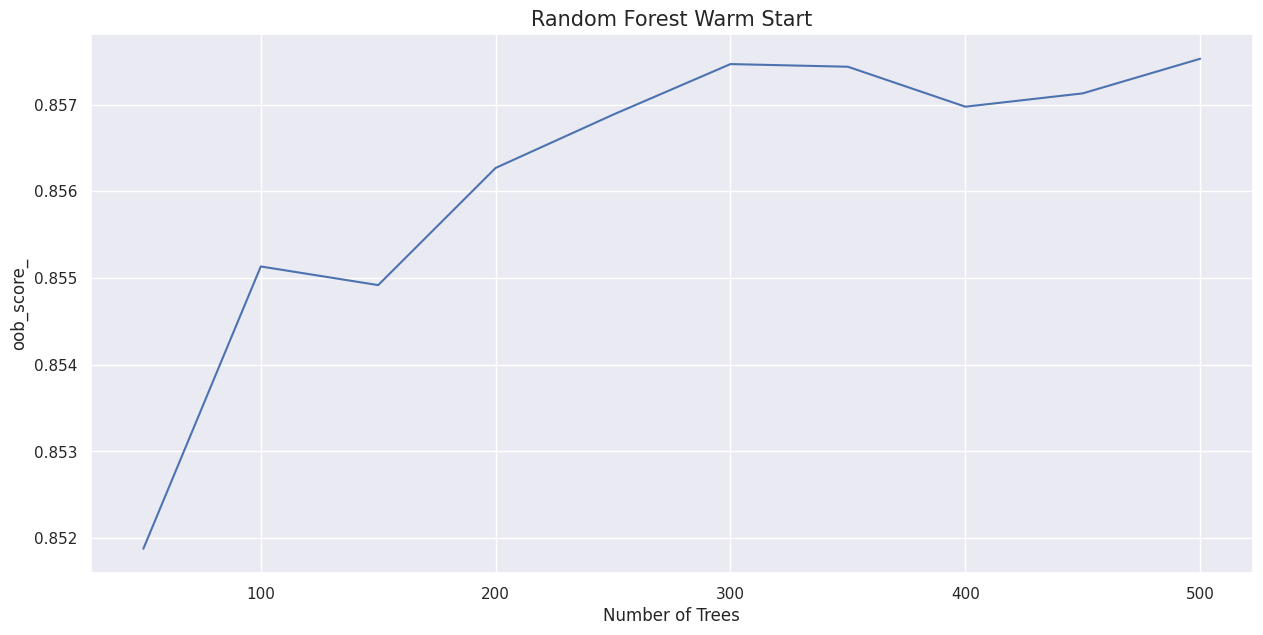

In [ ]:
# matplotlib 임포트
import matplotlib.pyplot as plt

# seaborn 임포트
import seaborn as sns

# seaborn을 darkgrid로 설정합니다.
sns.set()

# 빈 oob_scores 리스트를 만듭니다.
oob_scores = []

# n_estimators=50, warm_start=True, oob_score=True로 RandomForestClassifier 객체를 만듭니다.
rf = RandomForestClassifier(n_estimators=50, warm_start=True,
                            oob_score=True, n_jobs=-1, random_state=2)

# 인구 조사 데이터셋으로 모델을 훈련합니다.
rf.fit(X_census, y_census)

# rf.oob_score_를 oob_scores 리스트에 추가합니다.
oob_scores.append(rf.oob_score_)

# est를 50으로 초기화합니다.
est = 50

# est로 estimators 리스트를 초기화합니다.
estimators=[est]

# 0~9까지 반복합니다.
for i in range(9):

    # est에 50을 더합니다.
    est += 50

    # est를 estimators 리스트에 추가합니다.
    estimators.append(est)

    # n_estimators를 est로 설정합니다.
    rf.set_params(n_estimators=est)

    # 인구 조사 데이터셋으로 훈련합니다.
    rf.fit(X_census, y_census)

    # rf.oob_score를 oob_scores 리스트에 추가합니다.
    oob_scores.append(rf.oob_score_)

# 그래프 크기를 설정합니다.
plt.figure(figsize=(15,7))

# estimators와 oob_scores를 그래프로 그립니다.
plt.plot(estimators, oob_scores)

# x 축 레이블을 설정합니다.
plt.xlabel('Number of Trees')

# y 축 레이블을 설정합니다.
plt.ylabel('oob_score_')

# 제목을 출력합니다.
plt.title('Random Forest Warm Start', fontsize=15)

# 그래프를 출력합니다.
plt.show()

- 트리 개수 300에서 점수가 가장 높다. 300개 이상 트리를 사용하는 것은 비용과 시간 낭비이며 얻을 수 있는 이득이 크지 않음.

- bootstrap
    - 랜덤 포레스트는 일반적으로 bootstrap을 사용하지만 boostrap 매개변수를 False로 지정할 수 있음. boostrap=FALSE로 지정하면 oob_score_속성이 만들어 지지 않음.
     - OOB 점수는 boostrap되지 않은 남은 샘플로 계산이 됨.

- verbose
    - 실행 과정 출력 여부(=0 기본값, 대규모 모델을 만들 때는 verbose=1로 선언함)

- class_wight
    - 클래스 별로 가중치를 부여할 수 있는 class_wight 매개변수 제공.
    - 기본값은 None으로 클래스별 가중치를 부여하지 않음.
- max_samples
    - training set 크기를 지정할 수 있음.
    - 기본값 None, 원본 훈련 세트와 동일한 크기의 bootstrap sample을 만듦.
    - 정수로 지정할 수 있고 0~1사이의 실수로 원본 세트 크기의 비율을 지정할 수 있음.

- ExtraTreesClassifier
    -  앞서 본 Random Forest는 각 노드의 분할을 위해 feature의 subset을 사용했습니다. 트리를 더욱 무작위하게 만들기 위해 최적의 임곗값 t_k
를 찾는 대신 feature의 subset을 사용해 무작위로 분할 후 그중 최상의 분할을 선택합니다.

    - 이렇게 극단적으로 무작위한 Random Forest를 Extreme random Tree 앙상블 혹은 Extra tree라고 부릅니다. 이 역시 무작위성은 다양성을 늘려 편향을 늘리는 대신 분산을 줄이게 됩니다.

    - 기존엔 노드 분할 시 최적의 임곗값을 찾는 것이 트리 알고리즘에서 가장 많이 시간을 잡아먹는 부분이었는데 이것이 없어졌으므로 일반적인 Random Forest보다 Extra Tree가 훨씬 빠릅니다.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, random_state=2)
et = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)
cv_results = cross_validate(et, X_train, y_train)

print('교차 검증 평균 점수:', np.mean(cv_results['test_score']))

교차 검증 평균 점수: 0.8415642915642916


### 랜덤 포레스트 성능 높이기- 사례 연구

In [ ]:
# bike_rentals_cleaned.csv 파일을 로드합니다.
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# 처음 다섯 개 행을 출력합니다.
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
# train_test_split 임포트
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

- n_estimators
    - n_estimators를 증가시키면 시간과 계산 비용이 늘어나지만 정확도 향상을 시킬 수 있음.

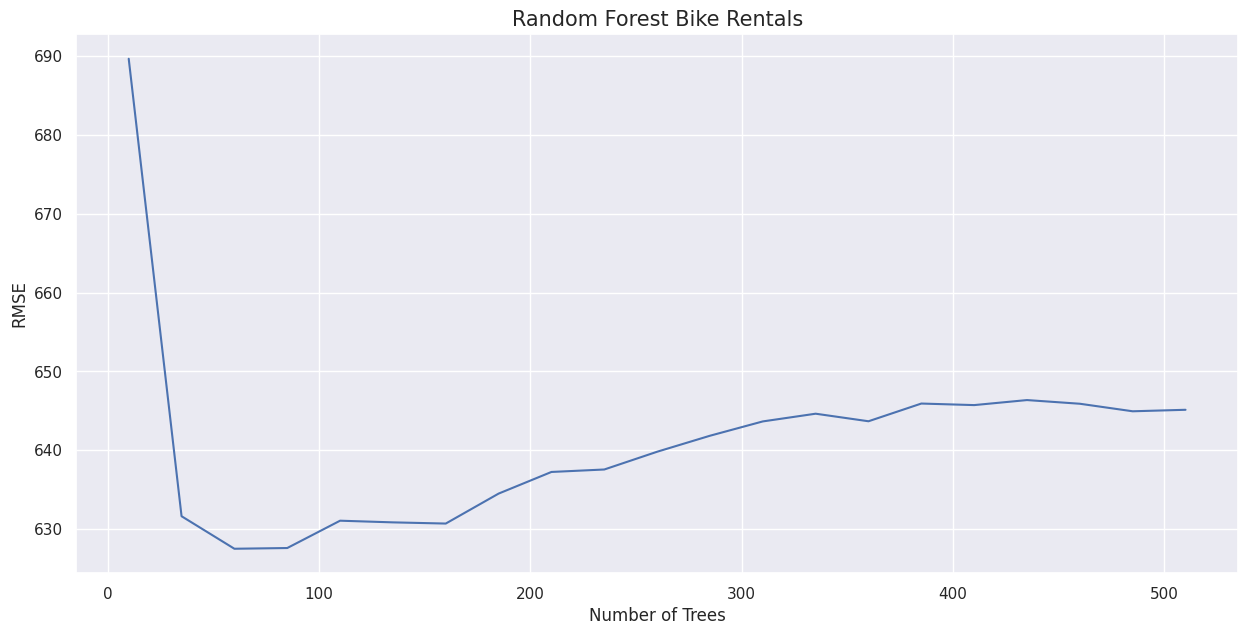

In [ ]:
from sklearn.metrics import mean_squared_error

# MSE 점수와 트리 개수를 담을 리스트
rmse_scores = []
estimators = []

# warm_start=True로 RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)

# 시작 트리 개수
est = 10

# 0~19까지 반복합니다.
for i in range(21):

    # n_estimators를 est로 설정합니다.
    rf.set_params(n_estimators=est)

    # 인구 조사 데이터셋으로 훈련합니다.
    rf.fit(X_train, y_train)

    # RMSE 값을 계산합니다.
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)

    # rmse와 est를 리스트에 추가합니다.
    rmse_scores.append(rmse)
    estimators.append(est)

    # 트리를 25개씩 늘립니다.
    est += 25

# 그래프 크기를 설정합니다.
plt.figure(figsize=(15,7))

# estimators와 oob_scores를 그래프로 그립니다.
plt.plot(estimators, rmse_scores)

# 축 레이블을 설정합니다.
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')

# 제목을 출력합니다.
plt.title('Random Forest Bike Rentals', fontsize=15)

# 그래프를 출력합니다.
plt.show()

- n_estimators=50이 합리적인 시작점

- Cross_val_score

In [ ]:
# n_estimators=50, warm_start=True, oob_score=True로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=50, warm_start=True,
                           n_jobs=-1, random_state=2)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes,
                         scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균: 902.398


- hyperparameter tuning

In [ ]:
# RandomizedSearchCV 임포트
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_reg(params, runs=16,
                          reg=RandomForestRegressor(random_state=2, n_jobs=-1)):

    # RandomizedSearchCV 객체를 만듭니다.
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error',
                                  cv=10, n_jobs=-1, random_state=2)

    # X_train와 y_train로 grid_reg를 훈련합니다.
    rand_reg.fit(X_train, y_train)

    # 최상의 모델을 추출합니다.
    best_model = rand_reg.best_estimator_

    # 최상의 매개변수를 추출합니다.
    best_params = rand_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 구합니다.
    best_score = np.sqrt(-rand_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트의 레이블을 예측합니다.
    y_pred = best_model.predict(X_test)

    # mean_squared_error를 임포트합니다.
    from sklearn.metrics import mean_squared_error as MSE

    # rmse를 계산합니다.
    rmse_test = MSE(y_test, y_pred)**0.5

    # rmse를 출력합니다.
    print('테스트 세트 점수: {:.3f}'.format(rmse_test))

In [ ]:
randomized_search_reg(
    params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
            'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
            'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,2,4,6,8,10,20]})

최상의 매개변수: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
훈련 점수: 759.076
테스트 세트 점수: 701.802


In [ ]:
randomized_search_reg(
    params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,2,4,6,8,10,20]})

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
훈련 점수: 679.052
테스트 세트 점수: 626.541


In [ ]:
randomized_search_reg(
    params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,4,6,8,10,12,15,20]},
    runs=20)

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128
테스트 세트 점수: 619.014


In [ ]:
randomized_search_reg(
    params={'min_samples_leaf':[1,2,3,4,5,6],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,8,10,12,14,16,18,20]})

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 18}
훈련 점수: 679.595
테스트 세트 점수: 630.954


In [ ]:
randomized_search_reg(
    params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,4,6,8,10,12,15,20],
            'n_estimators':[100]},
    runs=20)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128
테스트 세트 점수: 619.014


In [ ]:
# n_estimators=100, oob_score=True으로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1,
                           max_features=0.6, max_depth=12, n_jobs=-1,
                           random_state=2)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_bikes, y_bikes,
                         scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]
RMSE 평균: 817.162


In [ ]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


- 데이터를 섞은 것이 효과가 있을까?

In [ ]:
from sklearn.utils import shuffle
df_shuffle_bikes = shuffle(df_bikes, random_state=2)
df_shuffle_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
671,672,4.0,1.0,11.0,0.0,5.0,1.0,1,0.355000,0.356042,0.522083,0.266175,5847
199,200,3.0,0.0,7.0,0.0,2.0,1.0,1,0.776667,0.747479,0.650417,0.130600,4541
77,78,1.0,0.0,3.0,0.0,6.0,0.0,1,0.472500,0.466525,0.379167,0.368167,3117
225,226,3.0,0.0,8.0,0.0,0.0,0.0,2,0.676667,0.624388,0.817500,0.222633,3820
37,38,1.0,0.0,2.0,0.0,1.0,1.0,1,0.271667,0.303658,0.738333,0.045408,1712


In [ ]:
# 데이터를 X와 y로 나눕니다.
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]

In [ ]:
# n_estimators=100, oob_score=True로 랜덤 포레스트 모델을 만듭니다.
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1,
                           max_features=0.6, max_depth=12, n_jobs=-1,
                           random_state=2)

# 평균 제곱 오차를 사용해 교차 검증을 수행합니다.
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes,
                         scoring='neg_mean_squared_error', cv=10)

# 오차의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# rmse를 출력합니다.
print('RMSE:', np.round(rmse, 3))

# 평균 rmse를 출력합니다.
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE 평균: 645.329


- 랜덤 포레스트의 단점
    - 개별 트리에 제약이 됨. -> 모든 트리가 동일한 실수를 하면, 랜덤 포레스트도 실수를 하게 됨.
    - 개별 트리가 해결할 수 없는 데이터 내의 문제 때문에 랜덤 포레스트의 성능이 향상이 안되는 경우도 많음.
    - 트리의 실수로부터 배워서 초반의 단점을 개선할 수 있는 앙상블 방법이 도움이 될 수도 있음. -> 부스팅은 저지른 실수에서 배우도록 설계를 함.

## 4장. 그래디언트 부스팅과 xgboost까지
- 랜덤포레스트는 bootstrap 샘플을 사용하기 때문에 배깅 알고리즘으로 분류
- 부스팅은 개별 트리의 실수로부터 학습을 진행. 이전 트리의 오차를 기반으로 새로운 트리를 훈련하는 것이 기본적인 아이디어.

- 부스팅에서 새로운 트리에 대한 오차를 수정하는 것은 배깅과 다른 점.

- Adaboost
    - Adaboost는 가중치를 부여한 약 분류기(Weak Classifier)를 모아서 최종적인 강 분류기(Strong Classifier)를 생성하는 기법
    - 새로운 트리가 이전 트리의 오차를 기반으로 가중치 조정
    - 오류 샘플의 가중치를 높여 잘못된 예측에 더 많은 주의를 기울임.
    - 실수에서 학습하기 때문에 약한 학습기를 강력한 학습기로 만들 수 있음.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, random_state=2)
et = AdaBoostClassifier(n_estimators=100, random_state=2)
cv_results = cross_validate(et, X_train, y_train)

print('교차 검증 평균 점수:', np.mean(cv_results['test_score']))

교차 검증 평균 점수: 0.8655610155610155


- Gradient Boosting model
    - 이전 트리의 예측 오차를 기반으로 완전히 새로운 트리를 훈련함.
    - 각 트리의 실수를 살펴보고, 이런 실수에 대한 완전한 새로운 트리를 만듦.
    - 새로운 올바르게 예측된 값에는 영향을 받지 않음.
    - 오차에만 초점을 맞추는 머신러닝 알고리즘을 만들려면, 정확한 최종 예측을 만들기 위해 오차를 계산하는 방법이 필요-> 모델의 예측과 실제 값 사이의 차이인 잔차(Residual)를 활용함.

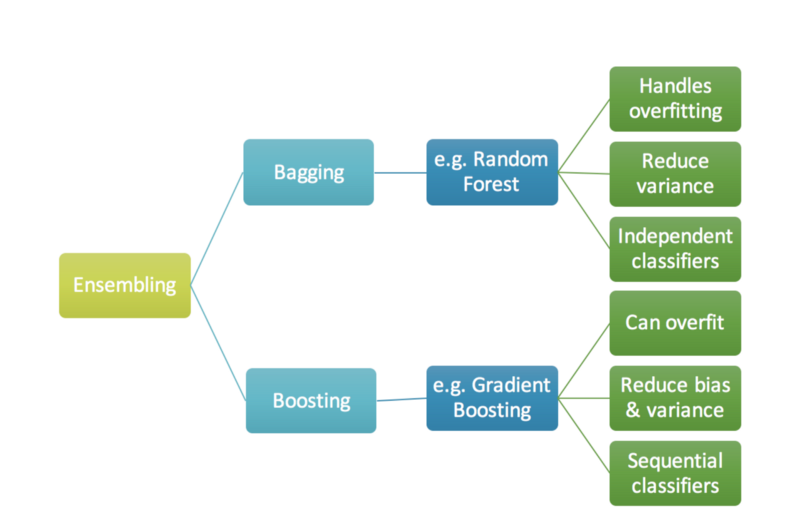

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter04/bike_rentals_cleaned.csv
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter04/exoplanets.csv.zip

!unzip -o exoplanets.csv.zip

Archive:  exoplanets.csv.zip
  inflating: exoplanets.csv          


- 그래디언트 부스팅 작동 방식
    - 자전거 대여 데이터셋 로드하기

In [ ]:
# pandas와 numpy 임포트하기
import pandas as pd
import numpy as np

# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# train_test_split를 임포트합니다.
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

- 그래디언트 부스팅 모델 작동 원리

In [ ]:
# DecisionTreeRegressor를 임포트합니다.
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor를 초기화합니다.
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 훈련 세트에 결정 트리를 훈련합니다.
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

- 기본 학습기라 부르는 결정 트리는 높은 정확도를 위해 튜닝하지 않음.
- 기본 학습기에 크게 의존하는 모델이 아니라 오차에서 학습하는 모델을 원하기 때문이다.

In [ ]:
# 훈련 세트에 대한 예측을 만듭니다.
y_train_pred = tree_1.predict(X_train)

In [ ]:
# 잔차를 계산합니다.
y2_train = y_train - y_train_pred

# DecisionTreeRegressor를 초기화합니다.
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 잔차에 모델을 훈련합니다.
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [ ]:
# 훈련 세트에 대한 예측을 만듭니다.
y2_train_pred = tree_2.predict(X_train)

# 잔차를 계산합니다.
y3_train = y2_train - y2_train_pred

# DecisionTreeRegressor를 초기화합니다.
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)

# 잔차에 모델을 훈련합니다.
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [ ]:
y1_pred = tree_1.predict(X_test)

y2_pred = tree_2.predict(X_test)

y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

# mean_squared_error를 임포트합니다.
from sklearn.metrics import mean_squared_error as MSE

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred)**0.5

911.0479538776444

- 사이킷런의 그래디언트 부스팅 알고리즘
    - 타깃과 앙상블 모델의 예측 사이에 손실 함수를 정의하고 이 손실을 최소화 하도록 트리를 추가함. 이를 위해 손실 함수의 그래디언트를 계산함.
    - 경사하강법로 두 함수를 미분하면 모두 y- y_pred꼴을 얻을 수 있음.

- 사이킷런의 GradientBoostingRegressor, GradientBoostingClassifier는 init 매개변수에서 초기 모델을 지정할 수 있음.

In [ ]:
res_1 = y_train - np.mean(y_train)

In [ ]:
tree_1.fit(X_train, res_1)
pred_1 = tree_1.predict(X_train)
res_2 = y_train - pred_1

In [ ]:
tree_2.fit(X_train, res_2)
pred_2 = tree_2.predict(X_train)
res_3 = y_train - (pred_1 + pred_2)

In [ ]:
tree_3.fit(X_train, res_3)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error

pred_all = tree_1.predict(X_test) + tree_2.predict(X_test) + tree_3.predict(X_test)
mean_squared_error(y_test, pred_all, squared=False)

911.0479538776432

- GradientBoostingClassifier의 경우 클래스별로 각 트리의 예측을 더한 후 시그모이드 함수를 적용하여 예측 확률을 계산합니다.

- 사이킷런으로 그레이디언트 부스팅 모델 만들기

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                random_state=2, learning_rate=1.0)

gbr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 만듭니다.
y_pred = gbr.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred)**0.5

911.0479538776439

In [ ]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

857.1072323426944

In [ ]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

936.3617413678853

In [ ]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

653.7456840231495

#### 그래디언트 부스팅 매개변수 튜닝

- learning_rate
    - 개별 트리의 영향을 제한. 일반적으로 트리 개수인 n_estimators를 늘리면 learning_rate는 줄여야 함.

In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                    random_state=2, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', rmse)

학습률: 0.001 , 점수: 1633.0261400367258
학습률: 0.01 , 점수: 831.5430182728547
학습률: 0.05 , 점수: 685.0192988749717
학습률: 0.1 , 점수: 653.7456840231495
학습률: 0.15 , 점수: 687.666134269379
학습률: 0.2 , 점수: 664.312804425697
학습률: 0.3 , 점수: 689.4190385930236
학습률: 0.5 , 점수: 693.8856905068778
학습률: 1.0 , 점수: 936.3617413678853


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

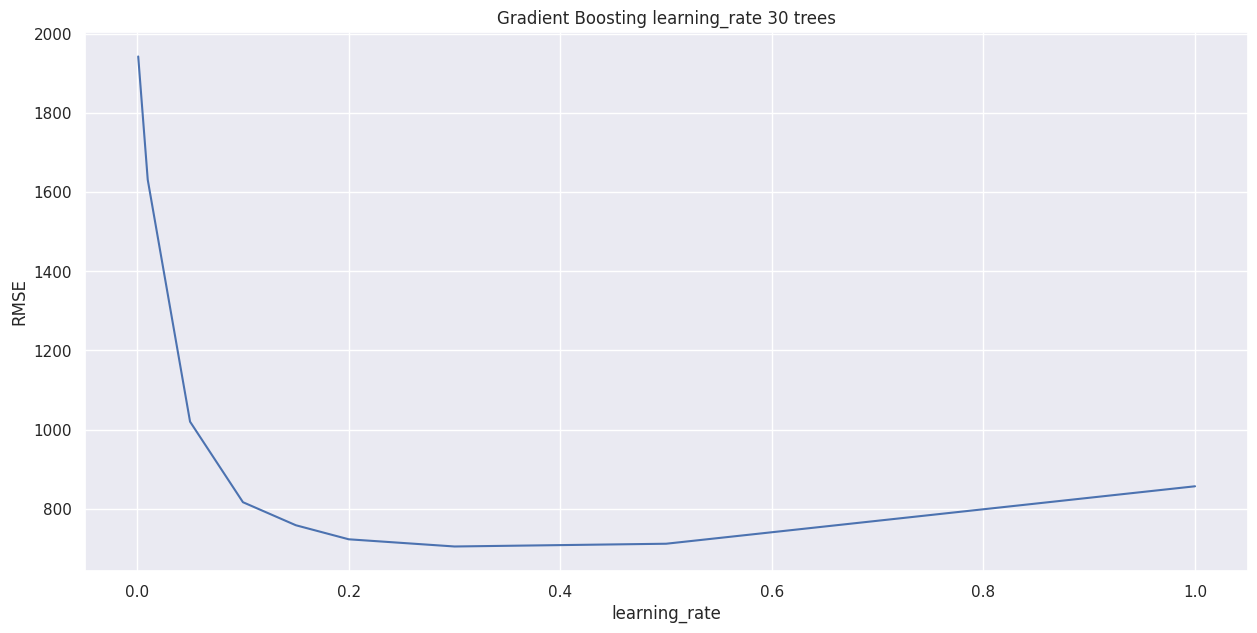

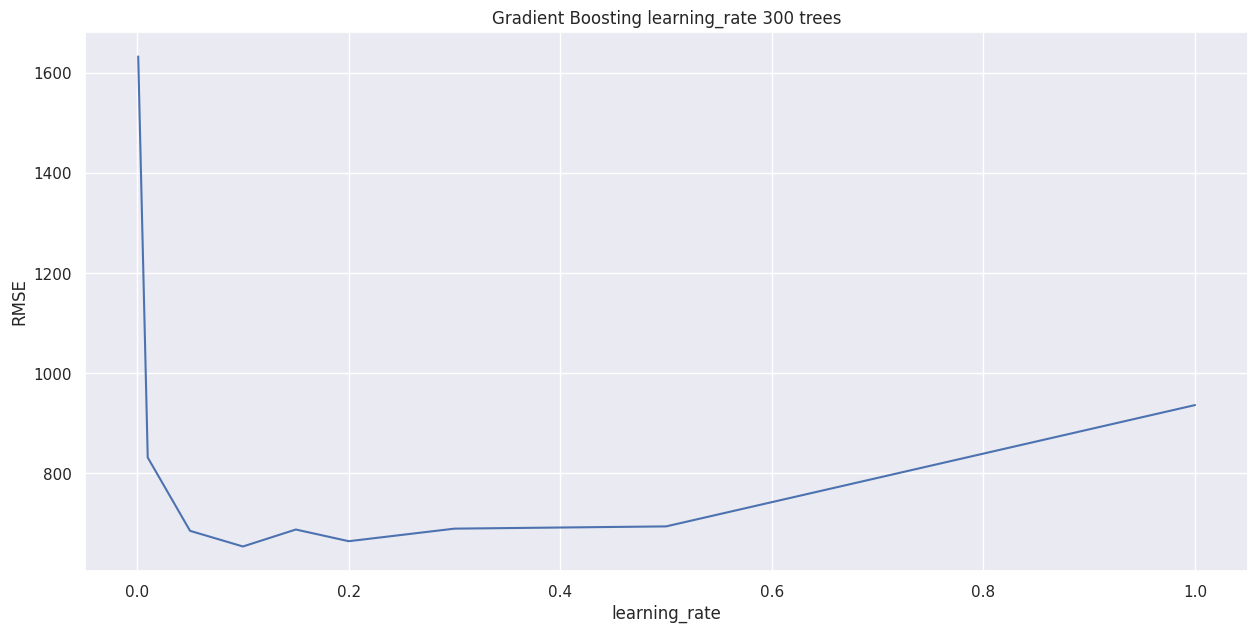

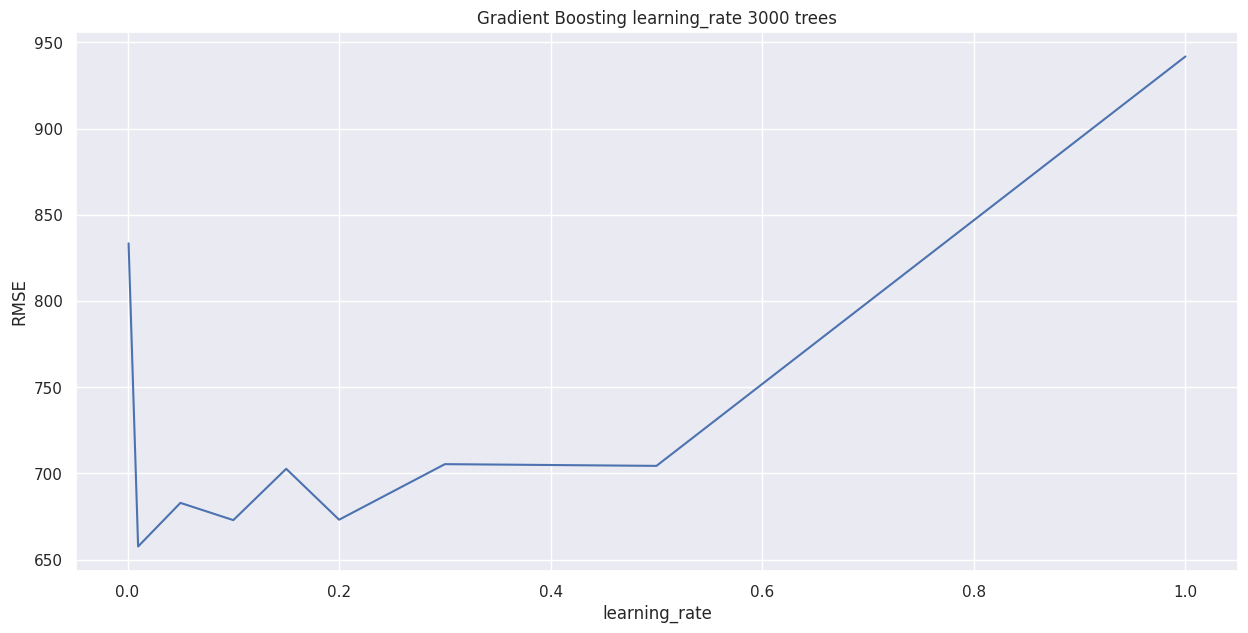

In [ ]:
from sklearn.metrics import mean_squared_error

for est in [30, 300, 3000]:
    rmse_scores = []
    for value in learning_rate_values:
        gbr = GradientBoostingRegressor(max_depth=2, n_estimators=est,
                                        random_state=2, learning_rate=value)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    plt.figure(figsize=(15,7))
    plt.plot(learning_rate_values, rmse_scores)
    plt.xlabel('learning_rate')
    plt.ylabel('RMSE')
    plt.title('Gradient Boosting learning_rate {} trees'.format(est))
    plt.show()

- 기본 학습기

In [ ]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300,
                                    random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('최대 깊이:', depth, ', 점수:', rmse)

최대 깊이: None , 점수: 869.2788645118395
최대 깊이: 1 , 점수: 707.8261886858736
최대 깊이: 2 , 점수: 653.7456840231495
최대 깊이: 3 , 점수: 646.4045923317708
최대 깊이: 4 , 점수: 663.048387855927


- 첫 번째 잔차를 계산하기 위한 초기 모델은 init_ 속성에 저장되어 있음.
- 회귀일 경우, 타깃 평균을 계산하는 DummyRegressor()이고 분류일 경우, 다수 클래스를 예측하는 DummyClassifier() 객체이다.

In [ ]:
gbr.init_

DummyRegressor()

In [ ]:
len(gbr.estimators_)

300

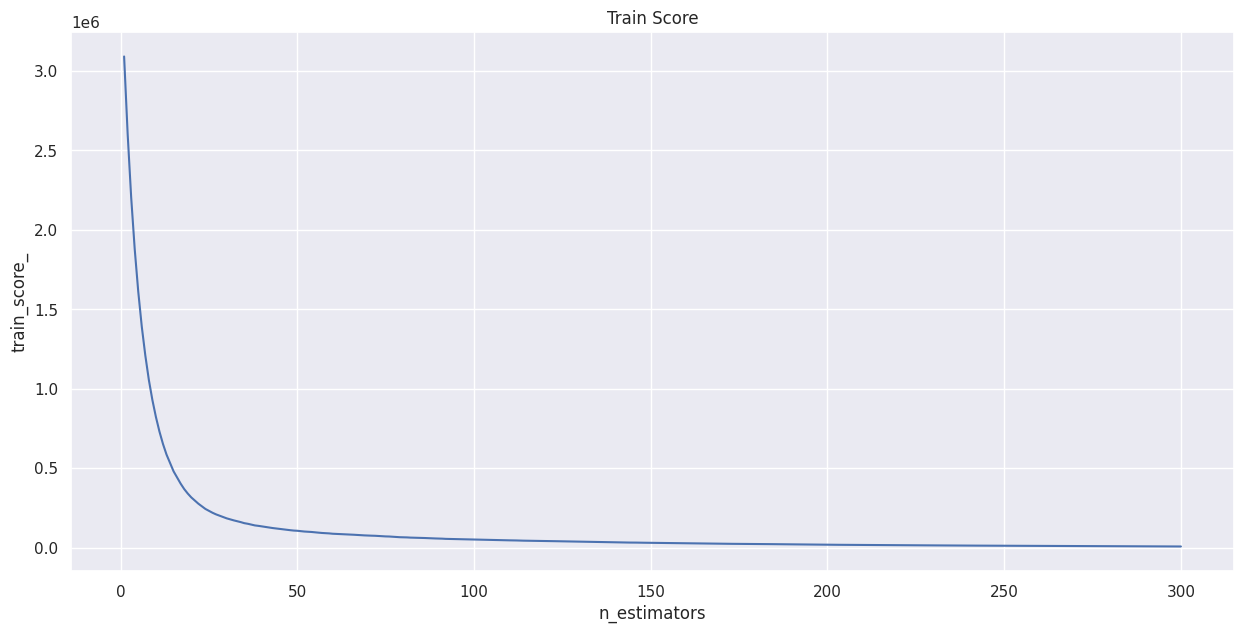

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 301), gbr.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

- validation_fraction
    - 일정한 수준 이상 향상되지 않으면 훈련을 종료할 수 있는 early stopping 기법을 제공
    - validation_fraction(기본값 0.1)만큼 훈련 세트에서 데이터를 덜어낸 다음 n_iter_no_change 반복 횟수 동안 검증 점수가 tol(기본값 1e-4)만큼 향상되지 않으면 훈련을 종료.

In [ ]:
depths = [None, 1, 2, 3, 4,5,6,7,8,9,10]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300,
                                    random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('최대 깊이:', depth, ', 점수:', rmse)

최대 깊이: None , 점수: 869.2788645118395
최대 깊이: 1 , 점수: 707.8261886858736
최대 깊이: 2 , 점수: 653.7456840231495
최대 깊이: 3 , 점수: 646.4045923317708
최대 깊이: 4 , 점수: 663.048387855927
최대 깊이: 5 , 점수: 652.1323137034725
최대 깊이: 6 , 점수: 660.5836169851443
최대 깊이: 7 , 점수: 671.1943812293273
최대 깊이: 8 , 점수: 708.0932348736387
최대 깊이: 9 , 점수: 729.2024199155686
최대 깊이: 10 , 점수: 784.6478730610328


In [ ]:
depths = [None, 1, 2, 3, 4,5,6,7,8,9,10]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300,
                                    random_state=2,validation_fraction=0.2,n_iter_no_change=1)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('최대 깊이:', depth, ', 점수:', rmse)

최대 깊이: None , 점수: 905.6843405761565
최대 깊이: 1 , 점수: 896.8428200331554
최대 깊이: 2 , 점수: 772.8942915546949
최대 깊이: 3 , 점수: 716.1733410810425
최대 깊이: 4 , 점수: 654.0065101320419
최대 깊이: 5 , 점수: 655.5789521263932
최대 깊이: 6 , 점수: 647.2710519126988
최대 깊이: 7 , 점수: 712.2219196267199
최대 깊이: 8 , 점수: 728.2991566826602
최대 깊이: 9 , 점수: 777.9203036778239
최대 깊이: 10 , 점수: 786.8312442270449


- subsample
    - 기본 학습기에 사용될 샘플의 비율을 지정.
    - 기본값인 1.0보다 작게 설정하면 트리를 훈련할 때, 샘플의 일부만 사용하게 됨.

In [ ]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300,
                                    subsample=sample, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('subsample:', sample, ', 점수:', rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 612.9879156983139
subsample: 0.6 , 점수: 622.6385116402317
subsample: 0.5 , 점수: 626.9974073227554


- max_depth=3, subsample=0.7에서 가장 좋은 점수를 얻음

- subsample이 1보다 작을 때, 이런 모델을 확률적 그레디언트 부스팅이라고 부름. 확률적이란 말은 모델에 무작위성이 주입된다는 의미.

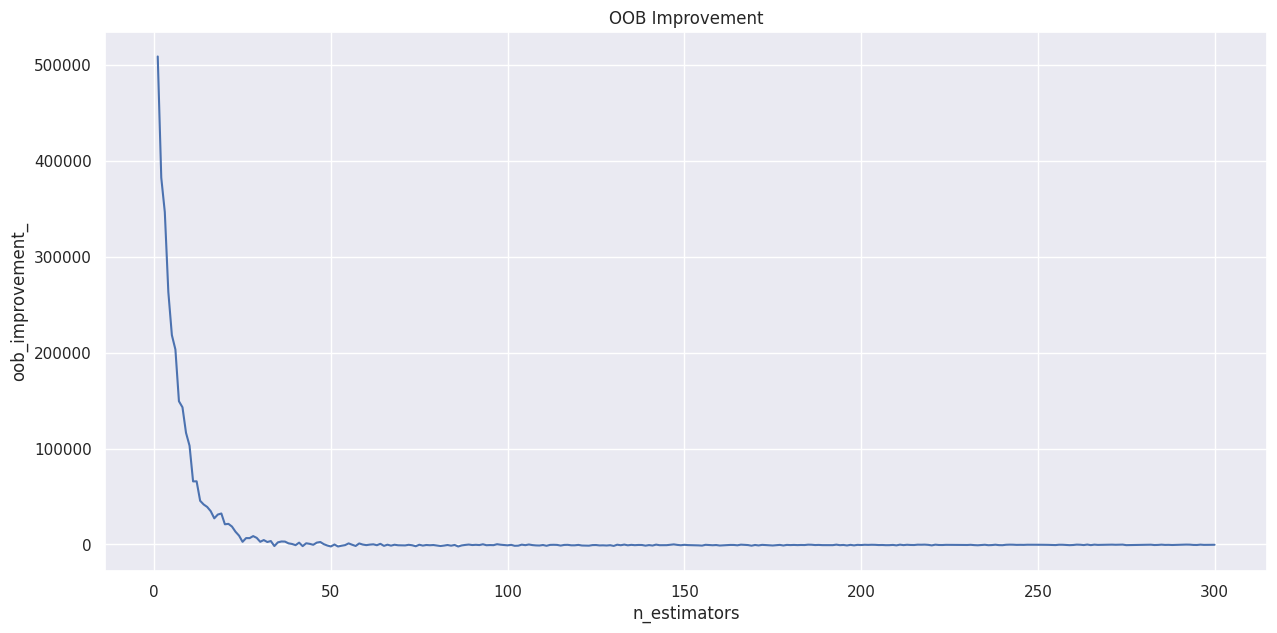

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.xlabel('n_estimators')
plt.ylabel('oob_improvement_')
plt.title('OOB Improvement')
plt.show()

- RandomserachCV
    - max_depth=3, subsample=0.7, n_estimators=300, learning_rate=0.1 근처가 grad search로 탐색하기 좋은 출발점. n_estimator는 높이고 learning_rate는 낮추는 것이 좋을 것 같습니다.
    - 분산을 줄이기 위해 max_depth은 고정으로 하자!


In [ ]:
params = {'subsample':[0.65, 0.7, 0.75],
          'n_estimators':[300, 500, 1000],
          'learning_rate':[0.05, 0.075, 0.1]}

# RandomizedSearchCV를 임포트합니다.
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)


# RandomizedSearchCV를 초기화합니다.
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10,
                              scoring='neg_mean_squared_error',
                              cv=5, n_jobs=-1, random_state=2)

# X_train와 y_train로 rand_reg를 훈련합니다.
rand_reg.fit(X_train, y_train)

# 최상의 모델을 추출합니다.
best_model = rand_reg.best_estimator_

# 최상의 매개변수를 추출합니다.
best_params = rand_reg.best_params_

# 최상의 매개변수를 출력합니다.
print("최상의 매개변수:", best_params)

# 최상의 점수를 계산합니다.
best_score = np.sqrt(-rand_reg.best_score_)

# 최상의 점수를 출력합니다.
print("훈련 점수: {:.3f}".format(best_score))

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = best_model.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
rmse_test = MSE(y_test, y_pred)**0.5

# 평균 제곱근 오차를 출력합니다.
print('테스트 세트 점수: {:.3f}'.format(rmse_test))

최상의 매개변수: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
훈련 점수: 636.200
테스트 세트 점수: 625.985


In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600,
                                subsample=0.75, learning_rate=0.02,
                                random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

596.9544588974487

- 종합코드

In [ ]:
import time
# 하이퍼파라미터 설정
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # 최대 깊이
subsamples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]  # 샘플링 비율
n_estimators_list = [30, 300, 3000]  # 트리 개수

# 최적 하이퍼파라미터 찾기
best_rmse = float("inf")
best_params = {}
start_time = time.time()

for subsample in subsamples:
    for depth in depths:
        for est in n_estimators_list:
            for value in learning_rate_values:
                iteration_start = time.time()

                gbr = GradientBoostingRegressor(
                    n_estimators=est, learning_rate=value,
                    max_depth=depth, subsample=subsample,
                    validation_fraction=0.2, n_iter_no_change=1
                )
                gbr.fit(X_train, y_train)
                y_pred = gbr.predict(X_test)
                rmse = MSE(y_test, y_pred) ** 0.5
                iteration_end = time.time()

                # 최적의 RMSE 값 갱신
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        "learning_rate": value,
                        "subsample": subsample,
                        "max_depth": depth,
                        "n_estimators": est,
                        "RMSE": rmse
                    }

                print("Learning_rate", value, "subsamples", subsample, "depth", depth, "n_estimator", est, 'RMSE', rmse, 'Time:', iteration_end - iteration_start)

# 전체 실행 시간 출력
end_time = time.time()
print("Total Execution Time: {:.2f} seconds".format(end_time - start_time))

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", best_params)

# SHAP 설명자 생성
best_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample']
)
best_model.fit(X_train, y_train)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test)

# SHAP 요약 그래프 출력 (특성 중요도 시각화)
shap.summary_plot(shap_values, X_test, feature_names=X_train.feature_names)

### XGboost

- 그래디언트 부스팅의 고급 버전
- 잔차로부터 훈련한 트리를 추가하여 약한 학습기를 강력한 학습기로 바꾸는 것.

In [ ]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor를 초기화합니다.
xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02,
                      subsample=0.75, random_state=2)

# 훈련 세트에서 xg_reg를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱근 오차를 계산합니다.
MSE(y_test, y_pred)**0.5

584.3395337495713

### 빅데이터 다루기 : Gradient Boosting VS Xgboost

- 외계 행성 데이터셋 전처리(https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data)
    - 별의 생명 주기 동안에 빛의 밝기를 기록한 것.
    - label : 외계 행성을 가지고 있으면 2, 아니면 1

In [ ]:
import pandas as pd
df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.iloc[:,0]

0       2
1       2
2       2
3       2
4       2
       ..
5082    1
5083    1
5084    1
5085    1
5086    1
Name: LABEL, Length: 5087, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# 데이터를 X와 y로 나눕니다.
X = df.iloc[:,1:]
y = df.iloc[:,0] - 1 # 0과 1로 만들기 위해.

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

- y = df.iloc[:,0] ->error(one-hot encoding이 필요합니다.(xgboost 최신버전에서는)

참고)https://velog.io/@theo/xgboost-%EC%83%88-%EB%B2%84%EC%A0%84%EC%97%90%EC%84%9C-%EC%83%9D%EA%B8%B4-%EC%98%A4%EB%A5%98

- 그레이디언트 부스팅 분류 모델 만들기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
# XGBClassifier를 임포트합니다.
from xgboost import XGBClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score

- 시간 측정

In [ ]:
import time
start = time.time()

df.info()

end = time.time()
elapsed = end - start

print('\n실행 시간: ' + str(elapsed) + ' 초')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

실행 시간: 0.028026819229125977 초


- 1번만 시간을 측정하고 싶다면 %time을 이용하는 것이 편리.
- 함수의 실행시간을 세부적으로 알고 싶다면 %prun을 이용하면 좋다.

In [ ]:
%timeit -n 100 -r 3 sum(np.square(range(10000))) # -n : number / -r :repeat

1.56 ms ± 27.8 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [ ]:
%%timeit -n 100 -r 3
summing = 0
for i in range(10000):
    summing += i**2

5.62 ms ± 16.1 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


- 속도 비교

In [ ]:
start = time.time()

gbr = GradientBoostingClassifier(n_estimators=100,
                                 max_depth=2, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))

end = time.time()
elapsed = end - start

print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9874213836477987
실행 시간: 323.4441683292389 초


In [ ]:
start = time.time()

# XGBRegressor를 초기화합니다.
xg_reg = XGBClassifier(n_estimators=100, max_depth=2)

# 훈련 세트에서 xg_reg를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = xg_reg.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))

end = time.time()
elapsed = end - start

print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9913522012578616
실행 시간: 20.99752116203308 초


# 5장

## Xgboost
- gradient boosting을 크게 업그레이드한 모델이다.
- extreme gradient boosting

- **누락값 처리**
    - XGboost는 자체적으로 누락된 값을 처리할 수 있음. missing값을 지정할 수 있음.
    - 누락된 값이 있을 때, Xgboost는 가능한 노드 분할마다 점수를 매겨서 최상의 결과를 분할을 선택함.

- **속도 향상**
    - 근사 분할 탐색 알고리즘
    - 희소성 고려 분할 탐색
    - 병렬 컴퓨팅
    - 캐시 고려 접근
    - 블록(block) 압축과 샤딩(sharing)


- 근사 분할 탐색 알고리즘
    - 최적의 분할을 찾는 것이 결정트리의 목표이다.
    - greedy algorithm은 매 단계에서 최상의 분할을 선택하고, 이전 노드를 돌아보지 않음.

- 새로운 근사 분할 탐색 알고리즘
    - 분할 탐색 알고리즘은 데이터를 나누는 퍼센트인 분위수(quantile)을 사용하여 후보 분할을 제안
    - 전역적 제안(global proposal)에서는 동일한 분위수가 전체 훈련에 사용됨.
    - 지역 제안(local proposal)에서는 각 분할마다 새로운 분위수를 제안.

- Quantile sketch algorithm
    - 가중치가 균일한 데이터셋에서 잘 동작함.
    - xgboost는 이론적으로 보장된 병합과 가지치기를 기반으로 한 새로운 가중 qunatile sketch algorithm 을 사용.

- 희소성 고려 분할 탐색
    - 희소한 데이터는 대부분의 원소가 0이거나 null인 데이터.
    - 희소행렬은 0이 아니거나 널이 아닌 데이터 포인트만 저장하여 공간을 절약
    - 희소성 고려 분할은 탐색할 때 희소한 행렬에서 xgboost가 더 빠르다는 것을 의미.

- 병렬 컴퓨팅
    - 여러 개의 계산 유닛이 동시에 동일한 문제에 대해 작업하는 것.
    - 데이터를 block이란 단위로 정렬하고 압축함. 이런 블록은 여러 대의 머신이나 외부 메모리에 분산될 수 있음.
    - 분할 탐색 알고리즘은 블록의 장점을 사용해 분위수 탐색을 빠르게 수행함.

- 캐쉬 고려 접근
    - 컴퓨터의 데이터는 캐시와 메인 메모리에 나뉘어 있습니다. 가장 빈번하게 사용하는 캐시는 고속 메모리를 사용함.

    - 자주 사용하지 않은 데이터는 저속 메모리에 저장됨.
    - 참고) https://gist.github.com/jboner/2841832

    - gradient 통계의 경우 xgboost는 캐시를 고려한 프리페칭(prefetching)을 사용함.
    - 내부 버퍼를 할당하고 gradient 통계를 가져와 미니배치 방식으로 누적을 수행.
    - 프리페칭은 읽기/쓰기 의존성을 느슨하게 만들고 많은 샘플을 가진 데이터셋에서 실행 부하를 약 50% 절감함.

- 블록 압축과 샤딩
    - 블록 압축은 열을 압축하여 계산 비용이 많이 드는 디스크 읽기에 도움 됨.
    - 블록 샤딩은 번갈아 가며 여러 디스크로 데이터를 샤딩하기 때문에, 데이터를 읽는 시간을 줄여줌.

- xgboost 모델 만들기


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

- np.c_ : Translates slice objects to concatenation along the second axis.(https://numpy.org/doc/stable/reference/generated/numpy.c_.html)

- 참고 : https://rfriend.tistory.com/352

In [ ]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


- Xgboost의 하이퍼 파라미터는 다양한 하이퍼 파라미터가 존재함.
    - 일반 파라미터 : 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다.
        -  booster[기본값=gbtree]
            - 어떤 부스트 구조를 쓸지 결정하는 것.
            - 의사결정기반 모형(gbtree), 선형 모델(gblinear),dart가 있다.
        -  n_jobs
            - xgboost를 실행하는데 사용되는 병렬 스레드 수
        -  verbosity[기본값=1]
            - 유효한 값은 0(무음), 1(경고), 2(정보), 3(디버그)
    - 부스트 파라미터 : 선택한 부스터에 따라서 적용할 수 있는 파라미터 종류가 다르다.
        - gbtree Booster의 파라미터
            - learning_rate['기본값':0.3]
                - learning_rate값, learning_rate가 높을수록 과적합 하기 쉽다.
            - n_estimators : 생성할 weak learner의 수
                - learning_rate가 낮을 땐, n_estimators를 높여야 과적합이 방지 됨.
            - max_depth[기본값 : 6]
                - 트리의 maximum depth이다.
                - 적절한 값이 제시되어야 하고 보통 3~10 사이 값이 적용됨.
                - max_depth가 높을수록 모델의 복잡도가 커져 과적합 하기 쉽다.
            - min_child_weight [기본값 1]
                - 관측치에 대한 가중치 합의 최소를 말함.
                - 값이 높을수록 과적합이 방지 됨.
            - gamma[기본값:0]
                - leaf node의 추가분할을 결정할 최소손실 감소값.
                - 해당값보다 손실이 크게 감소할 때 분리한다.
                - 값이 높을수록 과적합이 방지됨.
            - subsample[기본값:1]
                - weak learner가 학습에 사용하는 데이터 샘플링 비율이다. / 보통 0.5 ~ 1이 사용됨.
                - 값이 낮을수록 과적합이 방지 됨.
            - colsample_bytree[기본값:1]
                - 각 tree 별 사용된 feature의 percentage 이다. / 보통 : 0.5 ~ 1이 사용됨.
                - 값이 낮을수록 과적합이 방지 됨.
            - lambda [기본값=1, 별칭 : reg_lambda]
                - 가중치에 대한 L2 Regulization 적용 값이다.
                - 피처 개수가 많을 때 적용을 검토한다.
                - 이 값이 클수록 과적합 감소 효과가 있다.
            - alpha [기본값 = 0, 별칭 reg_alpha]
                - 가중치에 대한 L1 Regulization 적용 값이다.
                - 피쳐 개수가 많을 때, 적용을 검토한다.
                - 이 값이 클수록 과적합 감소 효과가 있다.

    - 학습 과정 파라미터 : 학습 시나리오를 결정한다.
        - object [기본값 : reg = squared error]
            - reg : squared error
                - 제곱 손실이 있는 회귀
            - binary : logistic(binary-logistic classification)
                - 이항 분류 문제 로지스틱 회귀 모형으로 반환값이 클래스가 아니라 예측 확률
            - multi : softmax
                - 다항 분류 문제의 경우 Softmax를 사용해서 분류한느데 반환되는 값이 예측확률이 아니라 클래스이다. 또한 num_class도 지정해야 한다.
            - multi : softprob
                - 각 클래스에 범주에 속하는 예측 확률을 반환한다.
            - count : poisson(count data poison regression) 등 다양함.

**eval_metric**

- 모델의 평가 함수를 조정하는 함수다.
- 설정한 objective 별로 기본설정값이 지정되어 있다.
- rmse: root mean square error
- mae: mean absolute error
- logloss: negative log-likelihood
- error: Binary classification error rate (0.5 threshold)    
- merror: Multiclass classification error rate
- mlogloss: Multiclass logloss
- auc: Area under the curve
- map (mean average precision)등, 해당 데이터의 특성에 맞게 평가 함수를 조정한다.
- seed [ 기본값 : 0 ]
    - 재현가능하도록 난수를 고정시킴.

**민감하게 조정해야하는 것**
- booster 모양
- eval_metric(평가함수) / objective(목적함수)
- eta
- L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
- L2 form

**과적합 방지를 위해 조정해야하는 것**

- learning rate 낮추기 → n_estimators은 높여야함
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기

- XGboost 분류 모델

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

- booster = 'gbtree' : 어떤 부스트 구조를 쓸지 결정하는 것. / 의사결정기반 모형(gbtree)
- objective = 'multi::softprob' / 각 클래스에 범주에 속하는 예측 확률을 반환.
- max_depth=6 : max_depth는 트리의 깊이를 지정.
- learning_rate  = 0.1 / xgboost에서는  eta라고 부름. 지정된 비율로 각 트리의 가중치를 감소시켜 분산을 억제
- n_estimations=100 / 부스팅에 포함할 트리 개수 / learning_rate를 줄이고 이 값을 늘리면 더 높은 성능을 얻을 수 있음.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state=2)

In [ ]:
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob',
                    max_depth=6, learning_rate=0.1, n_estimators=100,
                    n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))

점수: 0.9736842105263158


- accuracy_score() 함수 대신 score() 메서드를 사용할 수 있습니다.

In [ ]:
xgb.score(X_test, y_test)

0.9736842105263158

- XGBoost의 기본 파이썬 API를 사용하는 경우 부스터(Booster) 객체의 predict() 메서드는 multi:softprob일 때 확률을 반환하고 multi:softmax일 때 클래스 레이블을 반환합니다

- 주로 사이킷런 API로 XGBoost 모델을 만듭니다. 사이킷런 XGBoost API는 2019년에 릴리즈 됨.
- XGBoost 프레임워크의 장점을 사용하려면 넘파이 배열을 DMatrix로 바꿔야 함.


- 참고 : https://stackoverflow.com/questions/37943403/difference-between-original-xgboost-learning-api-and-sklearn-xgbclassifier-sc

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test[:5])

param = {'objective': 'multi:softprob', 'num_class': 3}
bstr = xgb.train(param, dtrain, 10)
bstr.predict(dtest)

array([[0.9486482 , 0.02711029, 0.02424142],
       [0.9486482 , 0.02711029, 0.02424142],
       [0.02841366, 0.05416913, 0.9174172 ],
       [0.9486482 , 0.02711029, 0.02424142],
       [0.9486482 , 0.02711029, 0.02424142]], dtype=float32)

In [ ]:
param = {'objective': 'multi:softmax', 'num_class': 3}
bstr = xgb.train(param, dtrain, 10)
bstr.predict(dtest)

array([0., 0., 2., 0., 0.], dtype=float32)

- 당뇨병 데이터셋

In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)

- XGboost 회귀 모델(교차 검증)


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. 개별 회귀 모델 정의
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror',
                   max_depth=6, learning_rate=0.1, n_estimators=100,
                   n_jobs=-1, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42, n_jobs=-1)
ridge = Ridge(alpha=1.0)

# 2. 보팅 회귀 모델 생성
voting_regressor = VotingRegressor(estimators=[
    ('xgb', xgb),
    ('rf', rf),
    ('ridge', ridge)
])

# 3. 교차 검증 수행
scores = cross_val_score(voting_regressor, X, y,
                         scoring='neg_mean_squared_error', cv=5)

# 4. 평가 점수의 제곱근(RMSE) 계산
rmse = np.sqrt(-scores)

# 5. RMSE 출력
print('RMSE:', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE: [63.033 59.689 64.538 63.699 64.661]
RMSE 평균: 63.124


In [ ]:
pd.DataFrame(y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


- 63.124는 1-표준 편차 이내이므로 괜찮은 결과이다.

- 힉스 보손 찾기 -사례 연구

- 힉스 보손은 신의 입자로 알려져 있음.
- 피터 힉스가 1964년 이론화한 힉스 보손은 입자가 질량을 가지는 이유를 설명하기 위해 소개되었음
- 양성자를 매우 빠른 속도로 서로 충돌시키고 그 결과를 관찰함으로써 힉스 보손을 발견함. 관측 데이터는 ATLAS 검출기로 얻습니다. 이 검출기는 초당 수억 건의 양성자 충돌로 인한 데이터를 기록함.

- 힉스 보손 발견 후 다음 단계는 붕괴의 특성을 정확하게 측정하는 것이다.
- 배경 잡음으로 돌러싸인 ATLAS 실험 데이터에서 힉스 보손이 두 개의 타우 입자로 붕괴하는 것을 발견한다.

- 대회 참고 : https://www.kaggle.com/c/higgs-boson

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter05/atlas-higgs-challenge-2014-v2.csv.gz

In [ ]:
df = pd.read_csv('atlas-higgs-challenge-2014-v2.csv.gz', nrows=250000, compression='gzip')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


- Kaggleset과 kaggleweight 열을 볼 수 있음.
- 캐글 데이터셋은 더 작았기 때문에 캐글은 kaggleWeight라는 가중치 열의 숫자가 달랐음.
- KaggleSet열의 t값은 캐글 데이터셋의 훈련 세트라는 의미.
- KaggleSet과 KaggleWeight 두열은 캐글 데이터셋에서 사용할 정보를 포함한 열.
- 캐글 훈련 데이터와 같게 만들기 위해 KaggleSet과 Weight 열을 삭제하고 KaggleWeight를 Weight로 바꾸고 label 열을 마지막으로 옮깁니다.

In [ ]:
del df['Weight']
del df['KaggleSet']
df = df.rename(columns={"KaggleWeight": "Weight"})

In [ ]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label,Weight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,4.505083
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b,2.497259
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,s,0.018636
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b,1.681611


- Label 열을 마지막으로 옮기는 한 가지 방법은 이 열을 변수에 저장하고 원본 데이터프레임에서 삭제한 다음 다시 새로운 열을 추가하는 것.

In [ ]:
label_col = df['Label']
del df['Label']
df['Label'] = label_col

- 판다스는 파이썬의 del 키워드보다 drop() 메서드를 권장함.
- label 열을 마지막에 놓는 더 나은 방법은 먼저 Label을 삭제하고, 그 다음 assign() 메서드를 메서드로 Label 열을 새로운 열로 추가하는 것.

In [ ]:
df_h = pd.read_csv('atlas-higgs-challenge-2014-v2.csv.gz', nrows=250000, compression='gzip')

- drop() 메서드는 이 세개의 열이 삭제된 데이터프레임을 반환함.
- 이 데이터프레임에서 assign() 메서드를 이어서 호출할 수 있음. assign() 메서드에서는 추가할 열의 이름을 키워드 매개변수로 사용함.

In [ ]:
df_new = df_h.drop(['Weight', 'KaggleSet', 'Label'], axis=1).assign(Label=df_h['Label'])
df_new = df_new.rename(columns={'KaggleWeight': 'Weight'})

In [ ]:
df_new

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


- column index 0 : EventID - 머신러닝 모델과 관련이 없음.
- column index 1~30 : LHC충돌에서 얻은 물리량.
- column index 31 : weight : 이 열은 스케일 조정에 사용됨.
- column index 32 : 타깃 열 / 신호는 s, 배경 잡음은 b로 레이블되어 있음. 훈련 데이터는 실제 데이터에서 시뮬레이션으로 생성했기 때문에, 원래 보다 더 많은 신호가 있음

In [ ]:
df_new['Label'].replace(('s', 'b'), (1, 0), inplace=True)

In [ ]:
X = df_new.iloc[:,1:31]
y = df_new.iloc[:,-1]

- 열을 선택하는 다른 방법
    -  label을 뒤로 보낸 이유는 iloc 메서드를 사용해 인덱스로 특성과 타깃 열을 쉽게 나눌 수 있기 때문이다. 하지만 loc 메서드를 사용하면 label 열을 옮기지 않고도 열 이름이나 불리언 배열을 사용해 특성과 타깃을 편리하게 나눌 수 있습니다.

In [ ]:
X_new = df_new.loc[:, ~df_new.columns.isin(['EventId','Weight','Label'])]
y_new = df_new.loc[:, 'Label']

- df_new.columns.isin() 메서드는 전달된 열 이름이 있으면 해당 열 위치에 True, 그렇지 않으면 False을 반환.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_new = le.fit_transform(df_new['Label'])
y_new

array([1, 0, 0, ..., 1, 0, 0])

- 측정 지표
    - 대회 metric(https://www.kaggle.com/c/higgs-boson)

- XGBoost의 사이킷런 API는  fit() 메서드의 eval_metric 매개변수에 측정 지표를 지정할 수 있다.
- 이진 분류일 경우 'logloss', 다중 분류일 경우 'mlogloss'
- eval_metric 매개변수를 지정할 경우, eval_set 매개변수에 평가할 데이터셋을 (특성,타깃) 튜플의 리스트로 전달해야합니다.

In [ ]:
xgb = XGBClassifier(n_estimators=5)
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-mlogloss:0.73655	validation_1-mlogloss:0.74850
[1]	validation_0-mlogloss:0.52525	validation_1-mlogloss:0.54465
[2]	validation_0-mlogloss:0.38855	validation_1-mlogloss:0.41754
[3]	validation_0-mlogloss:0.29493	validation_1-mlogloss:0.33279
[4]	validation_0-mlogloss:0.22880	validation_1-mlogloss:0.27454


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [ ]:
xgb.evals_result()

{'validation_0': OrderedDict([('mlogloss',
               [0.7365548280732972,
                0.5252466491822686,
                0.3885539788752794,
                0.2949308359197208,
                0.22880319266447])]),
 'validation_1': OrderedDict([('mlogloss',
               [0.7485030999309138,
                0.5446543285721227,
                0.4175380499739396,
                0.33279044534030716,
                0.2745441574799387])])}

- 가중치
    - 힉스 보손 데이터 셋의 타깃인 s(신호)와 b(배경 잡음)에 대해서 생각해보자.
    - 실제로 b가 s보다 훨씬 많아서, 신호는 배경 잡음 사이에서 드물게 나타남.
    - ex) 신호가 배경잡음보다 1,000배 드물게 나타난다고 가정하면 s=1, b=1/1000으로 주면 이런 불균형을 보상할 수 있음.
    - 모두 더하면 2012년 데이터 수집 당시 기대되는 신호와 배경 잡음의 횟수를 제공
    - 실제와 같은 예측을 만들기 위해 가중치가 필요함.
    - 그렇지 않으면 너무 많은 s(신호) 이벤트를 예측할 것이다.
    - test_set_size :550,000

In [ ]:
df_new['test_Weight'] = df_new['Weight'] * 550000 / len(y)

In [ ]:
s = np.sum(df_new[df_new['Label']==1]['test_Weight'])
b = np.sum(df_new[df_new['Label']==0]['test_Weight'])

In [ ]:
b/s

593.9401931492318

- 가중치는 신호와 배경 잡음의 기대 횟수를 나타냄.
- 테스트 데이터에 맞게 가중치를 조정한 다음 배경 잡음의 가중치 합을 신호의 가중치 합으로 나눔.

- 대회 당시 xgboost는 나온지 얼마 안되었고, 사이킷런의 API는 아직 없었습니다.
- 많은 자료들이 사이킷런이 아닌 경우가 있습니다.

- 누락된 값과 가중치를 지정한 DMatrix로 XGboost 모델을 초기화합니다.
- 사이킷런 전에는 모든 XGboost모델은 DMatrix로 초기화를 하엿습니다.
- 사이킷런 API는 입력 데이터를 자동으로 DMatrix로 변환합니다.
- DMatrix는 속도를 위해 XGboost가 최적화한 희소 행렬
- 문서에 따르면 -999.0는 누락된 값을 의미.
- XGboost에서는 missing 매개변수로 누락된 값을 알릴 수 있음.

In [ ]:
import xgboost as xgb

# 넘파이 배열로 xgboost.DMatrix 만들기. -999.0는 누락된 값으로 다룹니다.
xgmat = xgb.DMatrix(X, y, missing = -999.0, weight=df_new['test_Weight'])

# xgboost 파라미터 설정
param = {}
# 랭킹만 필요하기 때문에 로지스틱 함수를 적용하기 전의 출력을 사용합니다.
#모델이 시그모이드 함수를 적용하기 전의 점수(로짓,logit)을 최적화 한다는 의미.
# 이 대회에서는 확률이 아니라 랭킹을 제출하기 때문에 로짓으로도 충분함.
param['objective'] = 'binary:logitraw'
# 양성 샘플의 가중치를 조정합니다. -> 불균형을 보상.-> 테스트셋에서 좋은 성능을 내는데 도움.
param['scale_pos_weight'] = b/s
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc' # AUC : 진짜 양성 대 가짜 양성 곡선 아래 면적으로 1이면 완벽한 값.
#불균형한 데이터셋에 잘 안맞기 때문에, 종종 AUC가 낫습니다.

# ams 지표를 추가합니다.
#ams@0.15 -> 상위 15%를 신호로 판단한다는 의미.
plst = list(param.items())+[('eval_metric', 'ams@0.15')]

#트리가 추가됨에 따라 점수를 볼 수 있도록 분류 모델와
#'train'을 포함하는 watchlist를 만듦.
watchlist = [(xgmat,'train')]

# 120개 트리 부스팅
num_round = 120

print('데이터 로딩 완료, 트리 부스팅 시작')
bst = xgb.train(plst, xgmat, num_round, watchlist)
#save_model()메서드를 사용해 모델을 저장
bst.save_model('higgs.model')
print('훈련 종료')

데이터 로딩 완료, 트리 부스팅 시작
[0]	train-auc:0.91091	train-ams@0.15:3.71929
[1]	train-auc:0.91535	train-ams@0.15:3.99108
[2]	train-auc:0.91800	train-ams@0.15:4.11401
[3]	train-auc:0.91953	train-ams@0.15:4.24602
[4]	train-auc:0.92050	train-ams@0.15:4.24262
[5]	train-auc:0.92133	train-ams@0.15:4.25282
[6]	train-auc:0.92226	train-ams@0.15:4.33230
[7]	train-auc:0.92338	train-ams@0.15:4.35821
[8]	train-auc:0.92389	train-ams@0.15:4.37353
[9]	train-auc:0.92427	train-ams@0.15:4.36459
[10]	train-auc:0.92484	train-ams@0.15:4.36423
[11]	train-auc:0.92543	train-ams@0.15:4.40963
[12]	train-auc:0.92584	train-ams@0.15:4.41484
[13]	train-auc:0.92645	train-ams@0.15:4.46174
[14]	train-auc:0.92688	train-ams@0.15:4.43823
[15]	train-auc:0.92738	train-ams@0.15:4.47194
[16]	train-auc:0.92805	train-ams@0.15:4.52048
[17]	train-auc:0.92848	train-ams@0.15:4.57089
[18]	train-auc:0.92903	train-ams@0.15:4.60307
[19]	train-auc:0.92937	train-ams@0.15:4.65550
[20]	train-auc:0.92989	train-ams@0.15:4.69064
[21]	train-auc:0.93018	

- 사이킷런 API로 구현하기

In [ ]:
clf = XGBClassifier(n_estimators=120, learning_rate=0.1, missing=-999.0,
                    scale_pos_weight=b/s)

clf.fit(X, y, sample_weight=df_new['test_Weight'],
        eval_set=[(X, y)], eval_metric=['auc', 'ams@0.15'],
        sample_weight_eval_set=[df_new['test_Weight']])

clf.save_model('higgs-sklearn.model')

[0]	validation_0-auc:0.91091	validation_0-ams@0.15:3.71474
[1]	validation_0-auc:0.91531	validation_0-ams@0.15:3.98386
[2]	validation_0-auc:0.91774	validation_0-ams@0.15:4.07945
[3]	validation_0-auc:0.91935	validation_0-ams@0.15:4.20276
[4]	validation_0-auc:0.92014	validation_0-ams@0.15:4.13682
[5]	validation_0-auc:0.92102	validation_0-ams@0.15:4.17654
[6]	validation_0-auc:0.92194	validation_0-ams@0.15:4.26270
[7]	validation_0-auc:0.92234	validation_0-ams@0.15:4.26319
[8]	validation_0-auc:0.92333	validation_0-ams@0.15:4.32849
[9]	validation_0-auc:0.92419	validation_0-ams@0.15:4.38122
[10]	validation_0-auc:0.92474	validation_0-ams@0.15:4.39352
[11]	validation_0-auc:0.92532	validation_0-ams@0.15:4.40786
[12]	validation_0-auc:0.92592	validation_0-ams@0.15:4.44646
[13]	validation_0-auc:0.92633	validation_0-ams@0.15:4.44902
[14]	validation_0-auc:0.92696	validation_0-ams@0.15:4.48816
[15]	validation_0-auc:0.92743	validation_0-ams@0.15:4.51683
[16]	validation_0-auc:0.92808	validation_0-ams@0.1

In [ ]:
clf.score(X, y)

0.800476

# 6장. XGBoost hyperparameters

- 심장질환 데이터셋

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter06/heart_disease.csv

- target : binary value(1: 심장 질환 있는 사람 / 0:그렇지 않다)
- age : 나이
- sex : 성별(1=남성,0=여성)
- cp : 가슴 통증(chest pain) (1=전형적인 협심증, 2= 비전형적인 협심증, 3=협심증이 아닌 통증, 4=무증상)
- trestbps : 안정혈압 (입원시 mmHg)
- chol : 혈청 콜레스테롤(serum cholesterol)(mg/dl)
- fbs : 공복혈당 > 120 mg/dl (1=True, 0=False)
- restecg : 심전도 결과(0=정상, 1=ST-T파 이상)(T파 반전 및 또는 0.05mV 이상의 ST 상승 또는 감소), 2 = Estes 기준에 의해 좌심실 비대증 가능성 또는 유력
- thalach : 최대 심장 박동수
- exang : 운동으로 인한 협심증(1=yes, 2=no)
- oldpeak : 휴식 대비 운동으로 인한 ST 감소
- slope : 최대 운동 ST 세그먼트 기울기(1=상승 기울기, 2=수평,3=하강 기울기)
- ca : 형광 투시로 착색된 주요 혈관(0-3)
- thal : 탈륨 스트레스 테스트(3=정상, 6=고정 결합, 7=가역적 결함)

- verbose
    - 실행 과정 출력 여부(=0 기본값, 대규모 모델을 만들 때는 verbose=1로 선언함)

In [ ]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- XGbClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터를 X와 y로 나눕니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic')

In [ ]:
# cross_val_score를 임포트합니다.
from sklearn.model_selection import cross_val_score

# numpy를 임포트합니다.
import numpy as np

# 교차 검증 점수를 구합니다.
scores = cross_val_score(model, X, y, cv=5)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 정확도 평균을 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.84 0.85 0.82 0.8  0.77]
정확도 평균: 0.81


- booster = 'gbtree' : 어떤 부스트 구조를 쓸지 결정하는 것. / 의사결정기반 모형(gbtree)
- objective = 'multi::logistic' / 이진 분류의 기본 손실 함수

### StratifiedKFold
- 각 fold의 타깃 레이블의 비율을 동일하게 만듦.

- 참고 : https://amueller.github.io/aml/04-model-evaluation/1-data-splitting-strategies.html

- cross_val_score()와 GridSearchCV, RandomizedSearchCV에서 분류 모델을 받으면 기본적으로 StratifiedKFold(n_splits=cv) 객체를 사용하기 때문에, cv 매개변수에 폴드 수만 지정하면 됨.

- Fold를 나누기 전에 데이터를 섞기 위해 StratifiedKFold의 shuffle 매개변수(기본값 False)를 True로 지정하여 직접 StratifiedKFold의 객체를 만들어 cv 매개변수에 전달을 함.

In [ ]:
# StratifiedKFold를 임포트합니다.
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
print('전체 데이터의 클래스 분포:', np.bincount(y))
print()

for split_no, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print('{}번째 훈련 폴드:'.format(split_no+1), np.bincount(y[train_idx]))
    print('{}번째 검증 폴드:'.format(split_no+1), np.bincount(y[test_idx]))
    print()

전체 데이터의 클래스 분포: [138 165]

1번째 훈련 폴드: [110 132]
1번째 검증 폴드: [28 33]

2번째 훈련 폴드: [110 132]
2번째 검증 폴드: [28 33]

3번째 훈련 폴드: [110 132]
3번째 검증 폴드: [28 33]

4번째 훈련 폴드: [111 132]
4번째 검증 폴드: [27 33]

5번째 훈련 폴드: [111 132]
5번째 검증 폴드: [27 33]



- 기준 모델

In [ ]:
# 교차 검증 점수를 계산합니다.
scores = cross_val_score(model, X, y, cv=kfold)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 정확도 평균을 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.72 0.82 0.75 0.8  0.82]
정확도 평균: 0.78


- GridSearch와 RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
def grid_search(params, random=False):

    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic',
                        random_state=2, verbosity=0, use_label_encoder=False)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20,
                                  n_jobs=-1, random_state=2)
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)

    # X와 y에서 하이퍼파라미터 튜닝을 수행합니다.
    grid.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 추출합니다.
    best_score = grid.best_score_

    # 최상의 점수를 출력합니다.
    print("최상의 점수: {:.5f}".format(best_score))

#### Xgboost hyperparameter tuning

- n_estimators : 생성할 weak learner의 수
    - learning_rate가 낮을 땐, n_estimators를 높여야 과적합이 방지

In [ ]:
grid_search(params={'n_estimators':[100, 200, 400, 800]})

최상의 매개변수: {'n_estimators': 100}
최상의 점수: 0.78235


- learning_rate['기본값':0.3] (별칭 : eta)
    - learning_rate값, learning_rate가 높을수록 과적합 하기 쉽다.-> 값을 줄이면 과대적합 방지

In [ ]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

최상의 매개변수: {'learning_rate': 0.05}
최상의 점수: 0.79585


- Max_depth
    - 트리의 깊이 / 0은 tree_method='hist', grow_policy='Lossguide'일 때 선택할 수 있으며, 깊이에 제한이 없다는 의미.
    - 값을 줄이면 과대적합을 방지.

In [ ]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

최상의 매개변수: {'max_depth': 2}
최상의 점수: 0.79902


- gamma (별칭 : min_split_loss)
    - 값을 늘리면 과대적합을 방지
    - 보통 10보다 작은 값을 설정.

In [ ]:
grid_search(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

최상의 매개변수: {'gamma': 0.5}
최상의 점수: 0.79574


- min_child_weight
    - 노드 분할을 위해 필요한 최소 가중치 합.
    - 값을 늘리면 과대적합을 방지.

In [ ]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

최상의 매개변수: {'min_child_weight': 5}
최상의 점수: 0.81219


- subsample
    - 부스팅 단계마다 사용할 훈련 샘플 개수의 비율
    - 값을 줄이면 과대적합을 방지.

In [ ]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

최상의 매개변수: {'subsample': 0.8}
최상의 점수: 0.79579


- colsample_bytree
    - 부스팅 단계마다 사용할 특성 개수의 비율
    - 값을 줄이면 과대적합을 방지.

In [ ]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

최상의 매개변수: {'colsample_bytree': 0.5}
최상의 점수: 0.80552


- colsample_bylevel
    - 트리 깊이마다 사용할 특성 개수의 비율
    - 값을 줄이면 과대적합을 방지.

- colsample_bynode
    - 각 노드의 분할에 사용할 특성 개수의 비율
    - 값을 줄이면 과대적합을 방지.

- scale_pos_weight
    - 불균형한 데이터에서 사용함.
    - sum(음성 샘플) / (양성 샘플) -> 데이터 불균형을 제어함.

- max_delta_step
    - 불균형이 매우 심한 데이터셋에만 권장됨.

- lambda
    - 가중치 L2 규제
    - 값을 늘리면 과대적합을 방지.
- alpha
    - 가중치 L1 규제
    - 값을 늘리면 과대적합을 방지
- missing
    - 누락된 값을 -999.0과 같은 수치로 대입함.
    - 누락된 값을 자동으로 처리해줌.

- 조기 종료 적용
    - 반복적인 머신러닝 알고리즘의 훈련 횟수를 제한함.
    - 사전에 정한 훈련 반복 횟수를 채우지 않더라도 연속적인 n번의 반복횟수 동안 모델이 향상되지 않으면 훈련을 중지함.  n은 사용자가 정함.
    - 조기 종료에서 모델이 실패할 시간을 충분히 주는 것이 중요함.
    - early_stopping_rounds=10 이면 연속적적으로 10번의 훈련 반복 동안 점수가 향상되지 않으면 훈련을 멈춤.

- eval_set과 eval_metric
    - 일반적으로 분류는 'error', 회귀는 'rmse'임.

In [ ]:
# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic')
eval_set = [(X_test, y_test)]
eval_metric='error'
model.fit(X_train, y_train, eval_metric=eval_metric,
          eval_set=eval_set)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = model.predict(X_test)
# 예측을 평가합니다.
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15789
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15789
[12]	validation_0-error:0.15789
[13]	validation_0-error:0.17105
[14]	validation_0-error:0.17105
[15]	validation_0-error:0.17105
[16]	validation_0-error:0.15789
[17]	validation_0-error:0.17105
[18]	validation_0-error:0.15789
[19]	validation_0-error:0.17105
[20]	validation_0-error:0.17105
[21]	validation_0-error:0.17105
[22]	validation_0-error:0.18421
[23]	validation_0-error:0.18421
[24]	validation_0-error:0.17105
[25]	validation_0-error:0.18421
[26]	validation_0-error:0.18421
[27]	validation_0-error:0.18421
[28]	validation_0-error:0.18421
[29]	validation_0-error:0.18421
[30]	validation_0-error:0.18421
[31]	validation_0-

- early_stopping_rounds

In [ ]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic')
eval_set = [(X_test, y_test)]
eval_metric="error"
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set,
          early_stopping_rounds=10, verbose=True)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15789
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
정확도: 89.47%


In [ ]:
model = XGBClassifier(n_estimators=5000)
eval_set = [(X_test, y_test)]
eval_metric="error"
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set,
          early_stopping_rounds=100)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15789
[1]	validation_0-error:0.10526
[2]	validation_0-error:0.11842
[3]	validation_0-error:0.13158
[4]	validation_0-error:0.11842
[5]	validation_0-error:0.14474
[6]	validation_0-error:0.14474
[7]	validation_0-error:0.14474
[8]	validation_0-error:0.14474
[9]	validation_0-error:0.14474
[10]	validation_0-error:0.14474
[11]	validation_0-error:0.15789
[12]	validation_0-error:0.15789
[13]	validation_0-error:0.17105
[14]	validation_0-error:0.17105
[15]	validation_0-error:0.17105
[16]	validation_0-error:0.15789
[17]	validation_0-error:0.17105
[18]	validation_0-error:0.15789
[19]	validation_0-error:0.17105
[20]	validation_0-error:0.17105
[21]	validation_0-error:0.17105
[22]	validation_0-error:0.18421
[23]	validation_0-error:0.18421
[24]	validation_0-error:0.17105
[25]	validation_0-error:0.18421
[26]	validation_0-error:0.18421
[27]	validation_0-error:0.18421
[28]	validation_0-error:0.18421
[29]	validation_0-error:0.18421
[30]	validation_0-error:0.18421
[31]	validation_0-

- 하이퍼 파라미터의 결합.
    - 하나씩 하이퍼 파라미터 조사하기.

- n_estimators

In [ ]:
grid_search(params={'n_estimators':[2, 25, 50, 75, 100]})

최상의 매개변수: {'n_estimators': 50}
최상의 점수: 0.78907


- max_depth

In [ ]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[50]})

최상의 매개변수: {'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83869


In [ ]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[2, 50, 100]})

최상의 매개변수: {'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83869


- learning_rate

In [ ]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83869


- min_child_weight

In [ ]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50}
최상의 점수: 0.83869


- subsample

In [ ]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'max_depth': 1, 'n_estimators': 50, 'subsample': 1}
최상의 점수: 0.83869


In [ ]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1, 2, 3, 4, 5],
                    'n_estimators':[2]})

최상의 매개변수: {'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 2, 'subsample': 0.9}
최상의 점수: 0.81224


- 하이퍼 파라미터 조정

In [ ]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1, 2, 3, 4, 5, None],
                    'n_estimators':[2, 25, 50, 75, 100]}, random=True)

최상의 매개변수: {'subsample': 0.6, 'n_estimators': 25, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.5}
최상의 점수: 0.82208


- colsample

- colsample_bytree

In [ ]:
grid_search(params={'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83869


- colsample_bylevel

In [ ]:
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 1, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83869


- colsample_bynode

In [ ]:
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 0.6, 'colsample_bynode': 0.7, 'colsample_bytree': 0.8, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.84852


- gamma

In [ ]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3],
                    'colsample_bylevel':[0.9],
                    'colsample_bytree':[0.8],
                    'colsample_bynode':[0.5],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83536


# 7장. Xgboost로 외계 행성 찾기

- 별 중 5,050개는 외계 행성이 없고, 37개는 외계 행성을 가지고 있음.
- 3,000개 이상의 열과 5,000개 이상의 행이 있기 때문에, 총 1,500만개 이상의 원소가 있음. 100개의 xgboost 트리와 곱하면 15억개 데이터 포인트를 처리하는 셈.

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter07/exoplanets.csv.zip

!unzip -o exoplanets.csv.zip

     |████████████████████████████████| 255.9 MB 39 kB/s 
Archive:  exoplanets.csv.zip
  inflating: exoplanets.csv          
   creating: __MACOSX/
  inflating: __MACOSX/._exoplanets.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('exoplanets.csv', nrows=400)
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


- 열이 3198개를 가지고 있고,빛의 주기적인 변화를 관찰할 때, 주기성을 찾으려면, 충분한 데이터가 필요합니다.
- 태양계 안에 있는 행성의 공전은 88일(수성)에서 165년(해왕성)까지 다름.

In [ ]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

- 그래프 시각화

- 외계 행성이 별의 빛을 가릴 때 광속이 감소될 것임.
- 광속이 주기적으로 감소한다면 외계행성이 존재할 가능성이 높음. 정의상 행성은 별을 도는 큰 물체이기 때문

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X = df.iloc[:,1:]
y = df.iloc[:,0] - 1

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

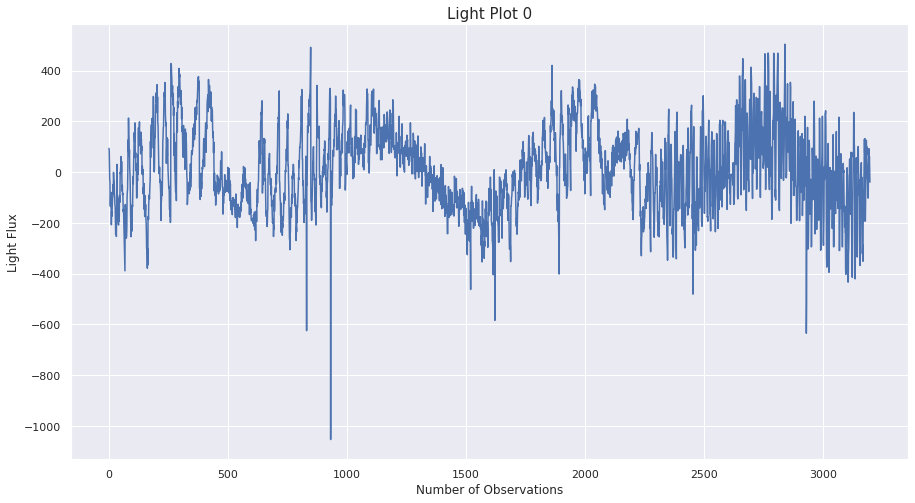

In [ ]:
light_plot(0)

- 비교를 위해 데이터셋에서 외계 행성을 가지지 않은 첫 번째 열인 인덱스 37을 출력해보자.

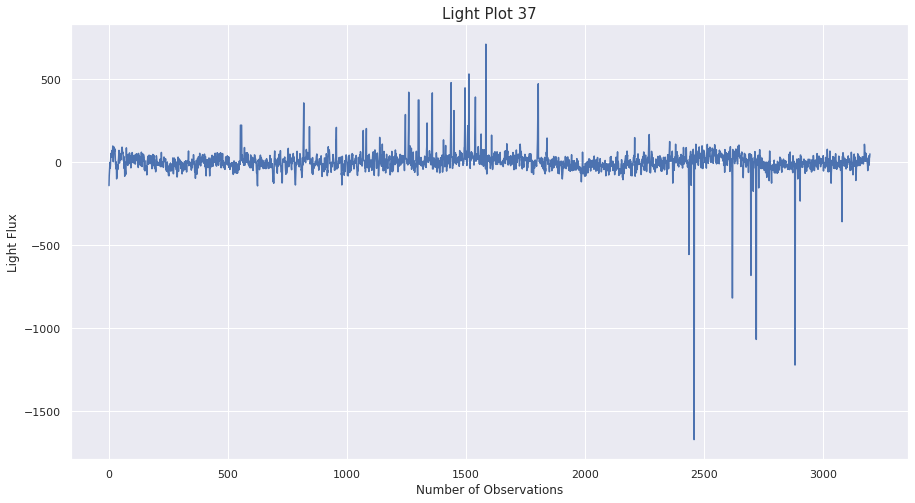

In [ ]:
light_plot(37)

- 빛 감소가 데이터에 보이지만 그래프 전체에 주기적으로 나타나지는 않음.
- 감소의 빈도가 지속적으로 반복되지 않음. 이런 증거만으로 외계 행성이 존재한다고 결정하기 충분하지 않음.

- 빛 감소가 명확하게 주기적으로 나타나기 때문에 외계 행성이 있을 가능성이 높음. 모든 그래프가 이처럼 명확하다면 머신러닝이필요하지 않을 것.

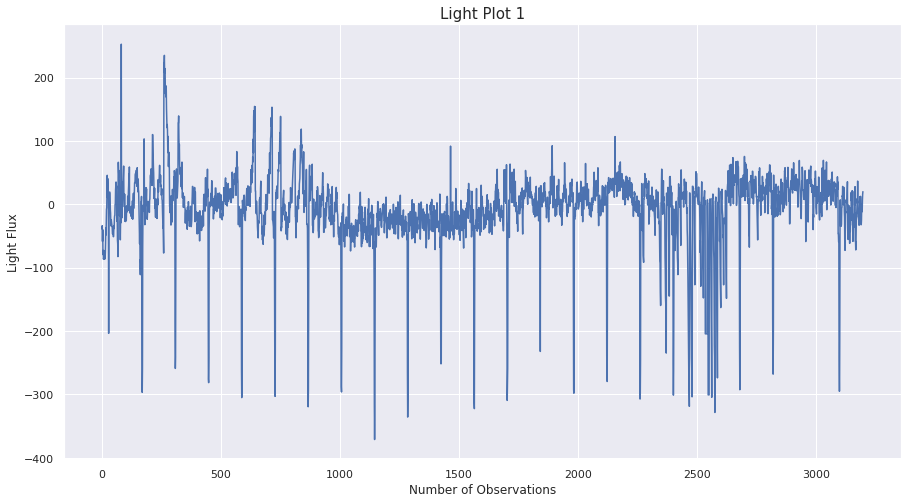

In [ ]:
light_plot(1)

- 데이터 준비

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [ ]:
df.isnull().sum().sum()

0

- 초기 XGBClassifier

In [ ]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score

# train_test_split를 임포트합니다.
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
# XGBClassifier를 초기화합니다.
model = XGBClassifier(booster='gbtree')

# 훈련 세트로 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = model.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))

점수: 0.89


- 불균형한 데이터에서는 정확도로 충분하지 않음.

- 오차 행렬 분석하기

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]])

- classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



- support : 각 행에 해당되는 샘플 갯수
- macro avg : 첫번 째 행(음성 클래스)과 두 번째 행(양성 클래스)의 평균
- weight avg : 첫 번째 행과 두 번째 행 support 값을 곱하고, 전체 샘플 개수로 나누어 계산. ex) 0.91*88+0.60*12) / (88+12) = 0.8728

- 다른 측정 방법.
    - recall_scroe

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.25

- 불균형 데이터 resampling
    - undersampling : sample의 수를 줄임.

- 5,807개 샘플 중에서 400개를 선택함. 이 subset은 원본 데이터셋의 일부를 포함하고 있기 때문에, undersampling의 예임.

In [ ]:
def xgb_clf(model, nrows):

    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    # 데이터를 X와 y로 나눕니다.
    X = df.iloc[:,1:]
    y = df.iloc[:,0] - 1

    # 데이터를 훈련 세트와 테스트 세트로 나눕니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    # 훈련 세트에서 모델을 훈련합니다.
    model.fit(X_train, y_train)

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = model.predict(X_test)

    score = recall_score(y_test, y_pred)

    print(confusion_matrix(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    return score

In [ ]:
xgb_clf(XGBClassifier(), nrows=800)

[[189   1]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200



0.1

In [ ]:
xgb_clf(XGBClassifier(), nrows=200)

[[37  0]
 [ 8  5]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.38      0.56        13

    accuracy                           0.84        50
   macro avg       0.91      0.69      0.73        50
weighted avg       0.87      0.84      0.81        50



0.38461538461538464

In [ ]:
xgb_clf(XGBClassifier(), nrows=74)

[[6 2]
 [5 6]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.75      0.55      0.63        11

    accuracy                           0.63        19
   macro avg       0.65      0.65      0.63        19
weighted avg       0.66      0.63      0.63        19



0.5454545454545454

- oversampling
    - 부족한 클래스의 샘픔을 복사하고 추가하여 샘플 수를 늘림.

In [ ]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [ ]:
newdf = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==1].values,
                               9,axis=0))
newdf.columns = df_train.columns
df_train_resample = pd.concat([df_train, newdf])

df_train_resample['LABEL'].value_counts()

0.0    275
1.0    250
Name: LABEL, dtype: int64

In [ ]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [ ]:
# XGBClassifier를 초기화합니다.
model = XGBClassifier()

# 훈련 세트로 모델을 훈련합니다.
model.fit(X_train_resample, y_train_resample)

# 테스트 세트에 대해 예측을 만듭니다.
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100

0.3333333333333333


- Tip) SMOTE는 imblearn에서 임포트 할 수 있는 인기 있는 resampling방법. 사용하려면 imblearn 설치해야 함. 앞의 resampling 코드를 사용해 smote에서 동일한 결과를 얻을 수 있음.

- resampling으로는 성능이 크게 올라가지 않으므로, xgboost의 hyperparameter를 tuning

- 가중치 조정
    - 사이킷런은 타깃 값 1을 양성으로 타깃 값 0을 음성으로 생각하기 때문에 바꿔줘야 함.

In [ ]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

df['LABEL'].value_counts()

0    363
1     37
Name: LABEL, dtype: int64

- scale_pos_weight
    - 데이터 불균형을 고려하여 scale_pos_weight=10으로 지정하여 새로운 XGBclassifer 모델을 만듦.

In [ ]:
# 데이터를 X와 y로 나눕니다.
X = df.iloc[:,1:]
y = df.iloc[:,0]

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
model = XGBClassifier(scale_pos_weight=10)

model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[86  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.67      0.33      0.44        12

    accuracy                           0.90       100
   macro avg       0.79      0.66      0.69       100
weighted avg       0.89      0.90      0.88       100

0.3333333333333333


- 하이퍼 파라미터 튜닝 -> 재현율을 높일 수 있는지 확인
     - 일관된 결과를 위해, StratifiedKFold를 사용하는 것이 권장됨.

In [ ]:
# 기준 모델
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2) # n_split=2와 shuffle=True로 StratifiedKFold를 초기화해줌.

model = XGBClassifier(scale_pos_weight=10) #음성 샘플이 양성 샘플보다 10배 많기 때문에, scale_pos_weight=10으로 xgb를 초기화해줌.

# 교차 검증 점수를 계산합니다.
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')

# 재현율을 출력합니다.
print('재현율: ', scores)

# 재현율의 평균을 출력합니다.
print('재현율 평균: ', scores.mean())

재현율:  [0.10526316 0.27777778]
재현율 평균:  0.1915204678362573


- graid_search

In [ ]:
def grid_search(params, random=False, X=X, y=y,
                model=XGBClassifier(scale_pos_weight=10, random_state=2)):

    xgb = model

    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_jobs=-1,
                                  random_state=2, scoring='recall')
    else:
        # 그리드 서치 객체를 초기화합니다.
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='recall')

    # X_train와 y_train으로 훈련합니다.
    grid.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 추출합니다.
    best_score = grid.best_score_

    # 최상의 점수를 출력합니다.
    print("최상의 점수: {:.5f}".format(best_score))

In [ ]:
grid_search(params={'n_estimators':[50, 200, 400, 800]})

최상의 매개변수: {'n_estimators': 50}
최상의 점수: 0.19152


In [ ]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.2, 0.3]})

최상의 매개변수: {'learning_rate': 0.01}
최상의 점수: 0.40351


In [ ]:
grid_search(params={'max_depth':[1, 2, 4, 8]})

최상의 매개변수: {'max_depth': 2}
최상의 점수: 0.24415


In [ ]:
grid_search(params={'subsample':[0.3, 0.5, 0.7, 0.9]})

최상의 매개변수: {'subsample': 0.3}
최상의 점수: 0.24561


In [ ]:
grid_search(params={'gamma':[0.05, 0.1, 0.5, 1]})

최상의 매개변수: {'gamma': 0.05}
최상의 점수: 0.24415


In [ ]:
grid_search(params={'learning_rate':[0.001, 0.01, 0.03],
                    'max_depth':[1, 2], 'gamma':[0.025, 0.05, 0.5]})

최상의 매개변수: {'gamma': 0.025, 'learning_rate': 0.001, 'max_depth': 2}
최상의 점수: 0.53509


In [ ]:
grid_search(params={'max_delta_step':[1, 3, 5, 7]})

최상의 매개변수: {'max_delta_step': 1}
최상의 점수: 0.24415


In [ ]:
grid_search(params={'subsample':[0.3, 0.5, 0.7, 0.9, 1],
                    'colsample_bylevel':[0.3, 0.5, 0.7, 0.9, 1],
                    'colsample_bynode':[0.3, 0.5, 0.7, 0.9, 1],
                    'colsample_bytree':[0.3, 0.5, 0.7, 0.9, 1]}, random=True)

최상의 매개변수: {'subsample': 0.3, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'colsample_bylevel': 1}
최상의 점수: 0.37865


- 균형잡힌 subset
    - 74개 샘플로 이루어진 균형잡힌 subset은 최소한 양의 data

In [ ]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [ ]:
grid_search(params={'max_depth':[1, 2, 3],
                    'colsample_bynode':[0.5, 0.75, 1]},
            X=X_short, y=y_short,
            model=XGBClassifier(random_state=2))

최상의 매개변수: {'colsample_bynode': 0.5, 'max_depth': 1}
최상의 점수: 0.65205


- 전체 데이터로 grid_search함수를 호출하면 오래 걸림.

In [ ]:
df_all = pd.read_csv('exoplanets.csv')
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [ ]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [ ]:
weight = int(5050/37)

In [ ]:
model = XGBClassifier(scale_pos_weight=weight)

# 교차 검증 점수를 계산합니다.
scores = cross_val_score(model, X_all, y_all, cv=kfold, scoring='recall')

# 재현율을 출력합니다.
print('재현율:', scores)

# 재현율의 평균을 출력합니다.
print('재현율 평균:', scores.mean())

재현율: [0.10526316 0.        ]
재현율 평균: 0.05263157894736842


In [ ]:
grid_search(params={'learning_rate':[0.001, 0.01]}, X=X_all, y=y_all,
            model=XGBClassifier(scale_pos_weight=weight))

최상의 매개변수: {'learning_rate': 0.001}
최상의 점수: 0.26316


In [ ]:
grid_search(params={'max_depth':[1, 2],'learning_rate':[0.001]}, X=X_all, y=y_all,
            model=XGBClassifier(scale_pos_weight=weight))

최상의 매개변수: {'learning_rate': 0.001, 'max_depth': 2}
최상의 점수: 0.53509


- 결과 통합
    - 5,050개 샘플 -> 약 54% 재현율
    - 400개 샘플 -> 약 54% 재현율
    - 74개 샘플 -> 약 68% 재현율
    - 가장 좋은 점수를 낸 매개변수 조합 : learning_rate=0.001, max_depth=2, colsample_bynode=0.5

- 외계 행성을 가진 37개의 별을 모두 포함해 모델을 훈련해보자.
- 테스트 세트에 훈련에 사용에 사용한 샘플이 포함된다는 의미. 일반적으로 이는 좋은 생각이 아님.

In [ ]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

- 74개 샘플

In [ ]:
final_model(X_short, y_short,
            XGBClassifier(max_depth=2, colsample_by_node=0.5,
                          random_state=2))

[04:13:25] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_by_node" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


1.0
[[3588 1462]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      5050
           1       0.02      1.00      0.05        37

    accuracy                           0.71      5087
   macro avg       0.51      0.86      0.44      5087
weighted avg       0.99      0.71      0.83      5087



- 400개 샘플

In [ ]:
final_model(X, y,
            XGBClassifier(max_depth=2, colsample_bynode=0.5,
                          scale_pos_weight=10, random_state=2))

1.0
[[4897  153]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5050
           1       0.19      1.00      0.33        37

    accuracy                           0.97      5087
   macro avg       0.60      0.98      0.66      5087
weighted avg       0.99      0.97      0.98      5087



- 5,050개 샘플

In [ ]:
final_model(X_all, y_all,
            XGBClassifier(max_depth=2, colsample_bynode=0.5,
                          scale_pos_weight=weight, random_state=2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087



## 8장. 고급 XGBoost
- xgboost 기본 학습기 : gbtree로 알려진 기본값은 여러 기본 학습기 중 하나.
- 그래디언트 부스팅 선형 모델인 gblinear, 신경망의 dropout 기법을 적용한 결정 트리의 변형인 dart가 있음. 게다가 xgboost 랜덤포레스트도 있음.

- gblinear 적용하기.
    - 결정 트리는 비선형 데이터에 최적이다. 데이터를 필요한 만큼 분할하여 샘플에 쉽게 도달할 수 있음.
    - 하지만 선형 모델이 적합한 경우도 있음. 실제 데이터가 선형 관계를 가지고 있다면 결정 트리가 최선의 선택이 아님.
    - 선형 부스팅 모델의 일반적인 아이디어는 트리 부스팅 모델과 동일 함.
    - 기본 모델을 만들고 이어지는 후속 모델이 잔차를 바탕으로 훈련됨.
    - 마지막으로 개별 모델을 합해 최종 결과를 만듦.
    - 선형 기본 학습기의 주요 차이점은 앙상블되는 각 모델이 선형이라는 것.

    - xgboost의 창시자는 gblinear를 여러번 부스팅하면 하나의 라소 회귀가 된다고 gitgub에서 언급함.(https://github.com/dmlc/xgboost/issues/332)

- dart
    - Dropouts meet Multiple Additive Regression Tree의 약자.(https://arxiv.org/abs/1505.01866)
    - MART가 성공적인 모델이지만 이전 트리에 너무 많이 의존하는 문제가 있다고 강조함.
    - DART는 기본 규제 방법인 축소에 초점을 맞추는 대신 신경망이 사용하는 dropout기법을 사용함.

    - DART에서는 새로운 부스팅 단계마다 새로운 모델을 만들기 위해 모든 이전 트리의 잔차를 더하지 않고 이전 트리를 랜덤하게 선택하고 1/k 배율로 리프 노드를 정규화함.
    - 여기서 k는 드랍아웃된 트리의 개수.
    - DART는 결정 트리의 변종.

- XGBOOST의 랜덤 포레스트
    - XGBRegressor와 XGBClassifier의 num_parallel_tree를 1보다 큰 값을 설정하여 랜덤 포레스트를 기본 학습기로 사용할 수 있음.
    - XGBOOST의 XGBRFRegressor와 XGBRFClassifier 클래스 사용해 랜덤 포레스트를 구현할 수 있음.

- gblinear 적용하기.
    - gblinear를 당뇨병 데이터셋에 적용하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X, y = load_diabetes(return_X_y=True)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
def regression_model(model):
    # 5폴드 교차 검증으로 음의 평균 제곱 오차를 구합니다.
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)

    # 제곱근을 계산합니다.
    rmse = (-scores)**0.5

    # 평균을 반환합니다.
    return rmse.mean()

In [ ]:
regression_model(XGBRegressor(booster='gblinear'))

55.477422340171096

In [ ]:
regression_model(LinearRegression())

55.50927267834351

In [ ]:
regression_model(Lasso())

62.64900771743497

In [ ]:
regression_model(Ridge())

58.83525077919003

In [ ]:
regression_model(XGBRegressor(booster='gbtree'))

65.96608449382913

#### gblinear 그리드 서치

- reg_lambda
    - lambda는 파이썬 람다 함수의 예약어 이기 때문에 사이킷런 API에서는 lambda 대신 reg_lambda를 사용함. 이는 ridge에서 사용하는 L2-규제의 크기를 조정함. 0에 가까운 값이 잘 작동하는 경향이 있음.

    - 값이 증가하면 과대적합을 방지.

- reg_alpha
    - 사이킷런 API는 reg_alpha와 alpha 매개변수를 모두 받을 수 있음. 이 매개변수는 Lasso에서 사용하는 L1규제의 양을 조절. 0에 가까운 값이 잘 작동하는 경향이 있음.
    - 값이 증가하면 과대적합을 방지.

- updater
    - 부스팅 단계마다 선형 모델을 훈련하기 위해 xgboost가 사용하는 알고리즘.
    - shotgun은 Hogwild 병량화 기반의 좌표 경사 하강법(coordinate descent)으로 비결정적인 솔루션을 만듦. 이와 다르게 coord_descent는 일반적인 좌표 경사 하강법을 사용하여 결정적인 솔루션을 만듦.

- feature_selector
    - 좌표 경사 하강법의 가중치 업데이트 단계에서 특성의 순서를 선택하는 방법.

    - a) cyclic - 가중치 업데이트 단계에서 특성을 순환하면서 선택(default)
    - b) shuffle - cyclic과 비슷하지만 가중치 업데이트 전에 특성을 랜덤하게 섞음.
    - c) random - 특성을 랜덤하게 선택.
    - d) greedy - 그래디언트가 가장 큰 특성을 선택. 속도가 느림.
    - e) thrifty - greedy와 비슷하지만 가중치 업데이트 전에 그레이디언트 크기에 따라 특성을 정렬함.

    - 다음과 같이 updater와 함께 사용해야 함.
        - a) shotgun : cyclic, shuffle
        - b) coord_descnet :random, greedy, thrifty
    
- greedy는 대용량 데이터셋일 경우 계산 비용이 비쌈. 하지만 top_k 매개변수를 바꾸어 greedy 방식이 고려할 특성 개수를 줄일 수 있음.

- top_k
    - greedy와 thrifty 방식에서 좌표 경사 하강법 동안에 선택하는 최상위 특성의 개수임. (기본값 : 0)

In [ ]:
def grid_search(params, reg=XGBRegressor(booster='gblinear')):

    # GridSearchCV를 초기화합니다.
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)

    # X_train와 y_train에서 훈련합니다.
    grid_reg.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 추출합니다.
    best_score = np.sqrt(-grid_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("최상의 점수:", best_score)

In [ ]:
grid_search(params={'reg_alpha':[0.001, 0.01, 0.1, 0.5, 1, 5]})

최상의 매개변수: {'reg_alpha': 0.01}
최상의 점수: 55.452863172616325


In [ ]:
grid_search(params={'reg_lambda':[0.001, 0.01, 0.1, 0.5, 1, 5]})

최상의 매개변수: {'reg_lambda': 0.001}
최상의 점수: 56.17163549971164


In [ ]:
grid_search(params={'feature_selector':['shuffle']})

최상의 매개변수: {'feature_selector': 'shuffle'}
최상의 점수: 55.49850814902274


In [ ]:
grid_search(params={'feature_selector':['random', 'greedy', 'thrifty'],
                    'updater':['coord_descent'] })

최상의 매개변수: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
최상의 점수: 55.48798105805444


In [ ]:
grid_search(params={'feature_selector':['greedy', 'thrifty'],
                    'updater':['coord_descent'], 'top_k':[3, 5, 7, 9]})

최상의 매개변수: {'feature_selector': 'thrifty', 'top_k': 3, 'updater': 'coord_descent'}
최상의 점수: 55.478623763746256


In [ ]:
param_grid = [{'updater':['shotgun'],
               'feature_selector':['cyclic', 'shuffle']},
              {'updater':['coord_descent'],
               'feature_selector':['random', 'greedy', 'thrifty']}]
grid_search(params=param_grid)

최상의 매개변수: {'feature_selector': 'cyclic', 'updater': 'shotgun'}
최상의 점수: 55.472990805176565


- updater가 shotgun일 때와 coord_descent일 때를 따로 누누어 그리드 서치를 수행했지만 탐색 범위를 지정한 두 딕셔너리를 리스트로 연결하여 동시에 탐색 할 수 있음. 이런 방식을 비대칭 그리드 탐색이라고 부름.

### 선형 데이터셋
 - X의 범위를 1~99로 선택하고 약간의 무작위성을 추가하여 선형적으로 y값을 만들어 보자.

In [ ]:
X = np.arange(1,100)
np.random.seed(2)
y = []
for i in X:
    y.append(i*np.random.uniform(-0.2, 0.2))
y = np.array(y)
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

- 사이킷런은 2차원 배열의 특성과 1차원 배열의 타깃을 기대함.
- y를 2차원 배열로 바꿀 필요가 없으며 파이썬 리스트를 사용하여도 괜찮음.

- booster가 gblinear일 경우 훈련된 선형 모델의 계수(가중치)와 절편이 coef_, intercept_ 속성에 저장됨.

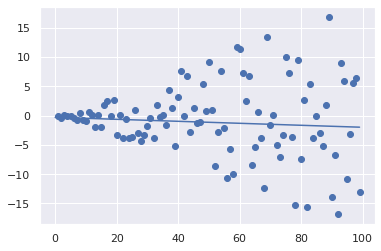

In [ ]:
import matplotlib.pyplot as plt

xgbr = XGBRegressor(booster='gblinear')
xgbr.fit(X, y)

plt.scatter(X, y)
plt.plot((0, 99), (xgbr.intercept_, xgbr.coef_*99+xgbr.intercept_))
plt.show()

In [ ]:
regression_model(XGBRegressor(booster='gblinear'))

6.214946302686011

In [ ]:
regression_model(XGBRegressor(booster='gbtree'))

9.372359516507444

In [ ]:
regression_model(LinearRegression())

6.214962315808842

- gblinear는 강력한 옵션이지만, 선형 모델이 트리 기반 모델보다 더 높은 성능을 낼 수 있다는 확신이 있을 때만 사용해야 함.
- 데이터셋이 크고 선형적 일 때, gblinear가 기본 학습기로 좋은 선택.

## dart 비교하기

- 그레이디언트 부스팅라는 점에서 gbtree와 비슷함. dart는 부스팅 단계마다 트리를 삭제(dropout)하는 것이 주요한 차이.

### dart를 사용한 XGBRegressor

In [ ]:
X, y = load_diabetes(return_X_y=True)

In [ ]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5))

64.27033739377164

### dart를 사용한 XGBClassifier

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter08/census_cleaned.csv

In [ ]:
df_census = pd.read_csv('census_cleaned.csv')
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:, -1]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

def classification_model(model):
    # 교차 검증 정확도를 계산합니다.
    scores = cross_val_score(model, X_census, y_census,
                             scoring='accuracy', cv=skf)

    # 평균 값을 반환합니다.
    return scores.mean()

In [ ]:
classification_model(XGBClassifier(booster='gbtree'))

0.8711649041738863

In [ ]:
classification_model(XGBClassifier(booster='dart', rate_drop=0.1))

0.8702743586725623

- 로지스틱 회귀처럼 가중치 합에 시그모이드 함수를 적용함.

In [ ]:
classification_model(XGBClassifier(booster='gblinear'))

0.8511409566050284

In [ ]:
classification_model(LogisticRegression(max_iter=1000))

0.7959523072547026

- max_iter를 증가시키면 정확도가 향상됨.

- gblinear가 로지스틱 회귀보다 확실히 좀 더 좋음. 가능한 대안임.

### dart 매개변수 적용
- sample_type
    - 균등하게 드랍아웃하는 uniform과 가중치에 비례하여 dropout하는 weighted가 있음.
     - 드랍아웃될 트리를 선택하는 방법을 결정.
- normalize_type
    - 새로운 트리가 드랍아웃된 트리와 같은 가중치를 가지는 tree와 새로운 트리가 dropout된 트리의 합과 동일한 가중치를 가지는 forest가 있음.
    - 트리의 가중치를 정규화

- rate_drop
    - 드랍아웃될 트리의 비율을 지정.

- one_drop
    - 1로 지정하면 부스팅 단계에서 적어도 하나의 트리가 항상 드랍아웃됨.
    - 드랍아웃될 트리가 하나도 선택되지 않을 경우, 최소한 하나의 트리를 드랍아웃함.
- skip_drop
    - 드랍아웃을 건너 뛸 확률을 지정.
    - rate_drop이나 one_drop보다 높은 우선순위를 가짐. 기본적으로 트리는 dropout될 확률이 동일.

In [ ]:
classification_model(XGBClassifier(booster='dart', one_drop=1))

0.8728233431077743

- 부스팅 단계마다 적어도 하나의 트리를 드롭아웃하는 것이 도움이 된다는 의미.

In [ ]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5,
                              sample_type='weighted'))

64.77758988457283

In [ ]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5,
                              normalize_type='forest'))

63.35922809798802

In [ ]:
regression_model(XGBRegressor(booster='dart', one_drop=1))

62.772860826030296

In [ ]:
grid_search(params={'rate_drop':[0.01, 0.1, 0.2, 0.4]},
            reg=XGBRegressor(booster='dart', one_drop=1))

최상의 매개변수: {'rate_drop': 0.2}
최상의 점수: 61.71159070206184


In [ ]:
grid_search(params={'skip_drop': [0.01, 0.1, 0.2, 0.4]},
            reg=XGBRegressor(booster='dart', rate_drop=0.2,
                             one_drop=1))

최상의 매개변수: {'skip_drop': 0.01}
최상의 점수: 62.21768657853914


- dart는 xgboost 프레임워크의 강력한 옵션.

## XGBoost 랜덤 포레스트

### 랜덤 포레스트 기본 학습기

- 기본 학습기에서는 booster 매개변수에서 지정하지 않음.
- num_parallel_tree 매개변수를 기본값 1보다 크게 지정하면 gbtree(또는 dart)를 부스팅 랜덤 포레스트로 바꿈.

- num_parallel_tree
    - 부스팅 단계에서 만들 트리 개수를 지정.
    - 1보다 크면 기본 학습기를 랜덤 포레스라고 부름.

In [ ]:
regression_model(XGBRegressor(booster='gbtree', num_parallel_tree=25))

66.00488961672875

- 부스팅 단계마다 하나의 트리를 사용하는 gbtree와 거의 동일한 성능을 냄. 그레이디언트 부스,팅은 이전 트리의 실수로부터 학습하도록 고안되었기 때문. 강력한 랜덤 포레스트로 부스팅을 시작하면 학습할 것이 거의 없거나 아주 적음.

### 스탠드얼론 랜덤 포레스트

- n_estimators
 - XGBRFRegressor와 XGBRFClasifier외에도 랜덤 포레스트를 만들 때는 num_parallel_tree가 아니라 n_estimator를 사용함.

- learning_rate
    -  기본값 1에서 바꾸면 결과가 달라지기 때문에 일반적으로 이 매개변수를 조정하는 것은 권장되지 않음.

- subsample, colsample_by_node
    - 기본갑 0.8
    - 값을 줄이면 과대적안을 막는 데 도움이 됨.

In [ ]:
regression_model(XGBRFRegressor())

59.506917961367165

In [ ]:
regression_model(RandomForestRegressor())

59.46563031802505

In [ ]:
classification_model(XGBRFClassifier())

0.855563447853867

In [ ]:
classification_model(RandomForestClassifier())

0.8564232761089048

# 9장. 캐글 마스터에게 배우기.
- xgboost를 사용해 캐글 대회에서 우승한 캐글 마스터의 팁과 기법을 배워보겠습니다.
- hold-out set가 중요한 이유, mean encoding으로 새로운 특성을 만드는 특성 공학, votingclassifier와 vortingregressor를 사용해 상관관계가 낮은 머신러닝 앙상블을 만드는 방법, 최종 모델을 위해 stacking을 사용하는 장점에 대해 배워보자!

- 홀드아웃 세트
    - 일반화되는지 확인하기 위해 데이터셋을 훈련 세트와 테스트 세트로 나눔.
    - 연구나 제품을 위해 모델을 만들 때, 검증 세트를 별도로 뗴어 놓는 것이 항상 좋음.
    - 이미 사용한 데이터를 사용해 모델을 테스트하면 검증 세트에 과적합될 가능성이 큼.
    - 오웬 장, (캐글 우승자) / 거의 항상 제가 원하는 것을 위한 오픈 소스를 찾을 수 있습니다. 연구와 특성 공학에 시간을 투자하는 것이 훨씬 낫습니다.

- 특성 공학
    - 머신러닝 모델의 성능은 훈련하는 데이터에 영향을 받습니다. 데이터가 불충분하면 강력한 머신러닝 모델을 만들 수 없음.
    - 기존 특성에서 새로운 특성을 만드는 작업을 특성 공학이라고 부름.

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !pip install category_encoders
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter09/cab_rides.csv
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter09/weather.csv

     |████████████████████████████████| 255.9 MB 33 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 892 kB/s 


In [ ]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

- 우버와 리프트 택시 요금 예측 데이터(https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices)

- 빠르게 처리하기 위해 nrows를 10000으로 제한합니다. 전체 행은 600,000개가 넘음.

In [ ]:
import pandas as pd
df = pd.read_csv('cab_rides.csv', nrows=10000)
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


- 범주형 특성과 timestamp를 포함하여 열의 종류가 다양한 것을 알 수있다.

- 누락된 값.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          10000 non-null  float64
 1   cab_type          10000 non-null  object 
 2   time_stamp        10000 non-null  int64  
 3   destination       10000 non-null  object 
 4   source            10000 non-null  object 
 5   price             9227 non-null   float64
 6   surge_multiplier  10000 non-null  float64
 7   id                10000 non-null  object 
 8   product_id        10000 non-null  object 
 9   name              10000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


In [ ]:
df[df.isna().any(axis=1)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...,...
9949,1.08,Uber,1543272429665,North End,North Station,NaN,1.0,74fffcba-da67-42d1-b585-13d546a125be,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9953,2.46,Uber,1545045010035,Beacon Hill,Fenway,NaN,1.0,18c2e91d-d594-4a22-9be7-0a5829efa4bf,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9965,2.58,Uber,1544815809335,Beacon Hill,South Station,NaN,1.0,77adadfb-4ac7-4cdf-aeab-6c4cfe8f7b26,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9985,1.89,Uber,1544695512211,Beacon Hill,North End,NaN,1.0,f2dfa974-f9d1-4e90-a0e6-77f7eea16956,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


- 결측치 제거

In [ ]:
df.dropna(inplace=True)

- 특성 공학 - timestamp

In [ ]:
df['date'] = pd.to_datetime(df['time_stamp'])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


- 문제가 있음. 이 분야 전문가가 아니더라도 우버와 리프트가 1970년도에 없었다는 것은 누구나 알 수 있음. 소수점 아래 자릿수가 변환에 문제가 있다는 증거.

- 10*6을 곱해서 원하는 값을 얻음.

- 판다 to_datetime()함수는 기본적으로 나노 초를 입력을 기대함.
- 밀리 초 단위를 변화하려면 unit 매개변수를 'ms'로 바꾸면 됨.

In [ ]:
pd.to_datetime(df['time_stamp'], unit='ms')

0      2018-12-16 09:30:07.890
1      2018-11-27 02:00:23.677
2      2018-11-28 01:00:22.198
3      2018-11-30 04:53:02.749
4      2018-11-29 03:49:20.223
                 ...          
9995   2018-11-29 15:12:59.037
9996   2018-12-03 01:27:57.997
9997   2018-11-28 12:11:23.241
9998   2018-12-15 18:00:13.623
9999   2018-12-03 04:53:01.166
Name: time_stamp, Length: 9227, dtype: datetime64[ns]

In [ ]:
df['date'] = pd.to_datetime(df['time_stamp']*(10**6))
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223


In [ ]:
import datetime as dt
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

- ex) 주말인지 러시아워인지 나타내는 특성을 추가할 수 있음.

- 그 다음 'dayofweek'가 5인지 6인지 확인하여 주말 여부를 결정하는 함수를 작성함.

- The day of the week with Monday=0, Sunday=6.(https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [ ]:
def weekend(row):
    if row['dayofweek'] in [5,6]:
        return 1
    else:
        return 0

df['weekend'] = df.apply(weekend, axis=1)

- 시간이 오전 6\~10시와 오후 3\~7시(15\시~19시)인지 확인하여 러시아워인지 확인하는 함수.

In [ ]:
def rush_hour(row):
    if (row['hour'] in [6,7,8,9,15,16,17,18]) & (row['weekend'] == 0):
        return 1
    else:
        return 0

df['rush_hour'] = df.apply(rush_hour, axis=1)

In [ ]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0


- 새로운 시간 특성을 만드는 과정을 계속 수행할 수 있음.
- 새로운 특성을 만들 때, 새로운 특성 사이에 강한 상관관계가 있는지 검토할 필요가 있음.

- 특성 공학 \-범주형 데이터

    - pd.get_dummies() 함수로 범주형 열을 수치형 열로 바꾸었습니다.
    - 사이킷런의 OneHotEncoder를 사용해서도 범주형 데이터를 0과 1로 이루어진 희소행렬로 변환할 수 있음.

    - 범주형 특성에서 0은 없음을 1은 있음을 나타내기 떄문에, 숫자값으로 의미가 있지만 다른 방식의 값이 더 나은 결과를 제공할 수 있음.
    - 한 가지 방법은 각 범주가 나타난 빈도로 범주형 특성을 변환하는 것.

- 특성 공학 - 범주형 데이터
    - 빈도 특성 만들기

In [ ]:
df['cab_type'].value_counts()

Uber    4654
Lyft    4573
Name: cab_type, dtype: int64

In [ ]:
df['cab_freq'] = df.groupby('cab_type')['cab_type'].transform('count')

In [ ]:
df['cab_freq'] = df['cab_freq']/len(df)

In [ ]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611


- 캐글 팁 - 평균 인코딩  
    - 평균 인코딩은 범주형 특성을 타깃 값의 평균을 기반으로 수치 특성을 변환.
    - ex) 오렌지 색 중에서 7개가 타깃 1이고 3개가 타깃 0이면 평균 인코딩 특성인 7/10 = 0.7이 됨. 타깃 값 사용으로 데이터 누수(data leakage)가 있기 때문에 추가적인 규제가 필요함.

- data leakage
    - 훈련 세트와 테스트 세트 또는 특성 타깃 사이에 정보가 공유될 때 일어남.
    - 타깃이 특성 데이터에 직접적으로 영향을 미치기 때문에 위험함.
    - 그럼에도 불구하고 평균 인코딩은 놀라운 성능을 낸다고 입증되었음.
    - 과대적합의 가능성 줄이기 위해 규제를 추가함.

In [ ]:
from category_encoders.target_encoder import TargetEncoder

encoder = TargetEncoder()
df['cab_type_mean'] = encoder.fit_transform(df['cab_type'], df['price'])
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq,cab_type_mean
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389,15.743446
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389,15.743446
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389,15.743446
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389,15.743446
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611,16.916357


- 평균 인코딩 참고 : https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study

- 추가적인 특성 공학
    - groupby()와 추가적인 인코더를 사용해 다른 열의 통계적 측정 값으로 특성 공학을 더 수행할 수 있음.
    - 특성 공학은 모든 강력한 모델을 만들기 위해 데이터 과학자에게 필수적인 기술임. 여기서 다루는 전략은 일부에 불과함. 특성 공학에는 연구, 실험, 실험, 도메인 전문 지식, 특성 표준화, 새로운 특성에 대한 모델 성능 피드백, 최종 특성 선정하기가 포함됨.

- 상관관계가 낮은 앙상블 만들기
    - 다양한 모델
    

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

X, y = load_breast_cancer(return_X_y=True)
kfold = StratifiedKFold(n_splits=5)

In [ ]:
from sklearn.model_selection import cross_val_score

def classification_model(model):
    # 5폴드 교차 검증을 수행합니다.
    scores = cross_val_score(model, X, y, cv=kfold)

    # 평균 점수를 반환합니다.
    return scores.mean()

In [ ]:
from xgboost import XGBClassifier
classification_model(XGBClassifier())

0.9771619313771154

In [ ]:
classification_model(XGBClassifier(booster='gblinear'))

0.9666356155876418

- dart 부스트인 경우, one_drop=True로 지정하여 적어도 하나의 트리가 드롭아웃되도록 함.

In [ ]:
classification_model(XGBClassifier(booster='dart', one_drop=True))

0.9683744760130415

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classification_model(RandomForestClassifier(random_state=2))

0.9666356155876418

In [ ]:
from sklearn.linear_model import LogisticRegression
classification_model(LogisticRegression(max_iter=10000))

0.9525694767893184

In [ ]:
classification_model(XGBClassifier(n_estimators=500, max_depth=2,
                                   learning_rate=0.1))

0.9701133364384411

- 앙상블의 상관관계
     - 다수결 방식을 사용하면 다수의 분류기가 실패했을 떄만 예측이 실패함. 따라서 좋은 성능을 내지만 다른 예측을 만드는 다양한 모델을 가지는 것이 좋음.
     - 대부분의 모델이 동일한 예측을 만든다면 상관관계가 높고 앙상블에 새로운 모델을 추가해서 얻은 이득이 적음.
     - 강력한 모델이 서로 다르게 실패하는 것이 앙상블 모델의 결과를 더 좋게 만듦.

In [ ]:
from sklearn.metrics import accuracy_score
def y_pred(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(score)
    return y_pred

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
y_pred_gbtree = y_pred(XGBClassifier())

0.951048951048951


In [ ]:
y_pred_dart = y_pred(XGBClassifier(booster='dart', one_drop=True))

0.951048951048951


In [ ]:
y_pred_forest = y_pred(RandomForestClassifier(random_state=2))

0.9370629370629371


In [ ]:
y_pred_logistic = y_pred(LogisticRegression(max_iter=10000))

0.9370629370629371


In [ ]:
y_pred_xgb = y_pred(XGBClassifier(max_depth=2, n_estimators=500, learning_rate=0.1))

0.965034965034965


In [ ]:
import numpy as np
import pandas as pd
df_pred = pd.DataFrame(data= np.c_[y_pred_gbtree, y_pred_dart,
                                   y_pred_forest, y_pred_logistic, y_pred_xgb],
                       columns=['gbtree', 'dart', 'forest', 'logistic', 'xgb'])

- 앤스컴 콰르텟 참고(https://m.blog.naver.com/youji4ever/221799742751)

In [ ]:
df_pred.corr()

,gbtree,dart,forest,logistic,xgb
gbtree,1.000000,0.971146,0.884584,0.914111,0.971146
dart,0.971146,1.000000,0.913438,0.914111,0.971146
forest,0.884584,0.913438,1.000000,0.943308,0.913438
logistic,0.914111,0.914111,0.943308,1.000000,0.914111
xgb,0.971146,0.971146,0.913438,0.914111,1.000000


- 최상위 모델 xgb와 가장 상관관계가 적은 두 모델인 랜덤 포레스트와 로지스틱 회귀를 선택.

- VotingClassifier
    - 여러 개의 분류 모델을 연결하고 다수결 투표를 사용하여 출력을 만듦.
    - 여러 개의 회귀 모델을 앙상블하여 각 모델의 예측을 평균하는 VotingRegreesor도 있음.

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []
logistic_model = LogisticRegression(max_iter=10000)
estimators.append(('logistic', logistic_model))
xgb_model = XGBClassifier(max_depth=2, n_estimators=500, learning_rate=0.1)
estimators.append(('xgb', xgb_model))
rf_model = RandomForestClassifier(random_state=2)
estimators.append(('rf', rf_model))
ensemble = VotingClassifier(estimators)
scores = cross_val_score(ensemble, X, y, cv=kfold)
print(scores.mean())

0.9771619313771154


- Stacking
    - 데이브딘 오스틴(캐글 유승자) 스태깅과 부스팅을 위해 xgboost를 사용함. 친숙하고 입증된 결과이기 때문이죠.

- 최종 모델은 원본 데이터를 입력으로 사용하지 않고, 베이스 모델의 예측을 입력으로 사용함.
- 최종적으로 예측을 결합하는 메타 모델로 인해 기본적인 앙상블과 구별됨.
- 메타모델은 예측을 입력으로 받기 때문에 회귀에서는 선형 회귀, 분류에서는 로지스틱 회귀 같은 간단한 모델을 사용하는 것이 권장.

In [ ]:
from sklearn.ensemble import StackingClassifier
base_models = []
base_models.append(('lr', LogisticRegression()))
base_models.append(('xgb', XGBClassifier()))
base_models.append(('rf', RandomForestClassifier(random_state=2)))
# 메타 모델을 정의합니다.
meta_model = LogisticRegression()
# 스태킹 앙상블을 만듭니다.
clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
scores = cross_val_score(clf, X, y, cv=kfold)
print(scores.mean())

0.9789318428815401


## 10장. XGBoost 모델 배포
- 비즈니스 세계에서는 새로운 데이터가 자주 발생하기 때문에, 자동화가 중요. -> 머신러닝 모델을 튜닝하여 미세한 성능을 올리는 것 보다는 프로세스에 중점을 줌.

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter10/student-por.csv

     |████████████████████████████████| 255.9 MB 38 kB/s 


- 혼합 데이터 인코딩
    - 데이터 로딩

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('student-por.csv')
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;NaN;18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";NaN;""U"";""GT3"";""T"";1;1;""at_home"";""other""..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


- ';'으로 구분되어 있다.

In [ ]:
df = pd.read_csv('student-por.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


- 누락된 값 처리

In [ ]:
df.isnull().sum()

school        0
sex           1
age           1
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      1
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


- 판다는 기본적으로 출력하는 열의 개수를 제한하기 때문에 중간에 있는 누락된 값은 볼 수 없음. -> 옵션으로 조절이 가능.

In [ ]:
pd.options.display.max_columns = None

df[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,18.0,U,GT3,A,4,4,at_home,teacher,course,NaN,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


In [ ]:
df['age'] = df['age'].fillna(-999.0)

df['sex'] = df['sex'].fillna(df['sex'].mode())
df['guardian'] = df['guardian'].fillna(df['guardian'].mode())

- 최빈값은 해당 특성에 가장 많이 등장하는 값.
- 범주형 특성을 최빈값으로 채우면 분포가 왜곡될 수 있지만 이는 누락된 값의 개수가 많을 때에만 해당됨. 지금은 2개 밖에 되지 않으므로 분포에 영향을 끼치지 않음.

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,-999.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


- 원-핫 인코딩
    - pd.get_dummies() 함수를 사용해 범주형 특성을 0과 1의 수치형으로 바꿀 수 있음.
    - 첫 번째 단점은 계산 비용이 많이 듦. 두 번째 단점은 사이킷런의 파이프라인에 통합되지 않음.

- onehotencoder는 공간과 시간을 절약하기 위해 밀집 배열 대신 희소 행렬을 사용하기 때문.
- 희소행렬은 0이 아닌 값만 저장하여 공간을 절약함. 더 적은 용령으로 동일한 정보를 저장할 수 있음.

In [ ]:
categorical_columns = df.columns[df.dtypes==object].tolist()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
hot = ohe.fit_transform(df[categorical_columns])
hot_df = pd.DataFrame(hot.toarray())
hot_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


- 0이 아닌 값들만 출력이 됨.

In [ ]:
print(hot)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 10)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 25)	1.0
  (0, 28)	1.0
  (0, 29)	1.0
  (0, 31)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 38)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 17)	1.0
  (1, 20)	1.0
  :	:
  (647, 27)	1.0
  (647, 29)	1.0
  (647, 31)	1.0
  (647, 33)	1.0
  (647, 35)	1.0
  (647, 38)	1.0
  (647, 40)	1.0
  (647, 41)	1.0
  (648, 1)	1.0
  (648, 3)	1.0
  (648, 4)	1.0
  (648, 7)	1.0
  (648, 9)	1.0
  (648, 13)	1.0
  (648, 17)	1.0
  (648, 20)	1.0
  (648, 25)	1.0
  (648, 27)	1.0
  (648, 29)	1.0
  (648, 31)	1.0
  (648, 33)	1.0
  (648, 35)	1.0
  (648, 38)	1.0
  (648, 40)	1.0
  (648, 41)	1.0


In [ ]:
hot

<649x43 sparse matrix of type '<class 'numpy.float64'>'
	with 11033 stored elements in Compressed Sparse Row format>

- 행렬은  649X43 크지만, 11,033개의 값만 저장되어 있어서 공간이 크게 절약됨. 0이 많이 등장하는 텍스트 데이터의 경우 희소 행렬을 많이 사용함.

- 원-핫 인코딩된 특성과 수치 특성 합치기

In [ ]:
cold_df = df.select_dtypes(exclude=["object"])
cold_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18.0,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,-999.0,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15.0,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15.0,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16.0,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


- 희소 행렬은 일반 데이터프레임으로 변환하거나 이 데이터프레임을 희소 행렬로 변환해야 함. -> 공간 절약

In [ ]:
from scipy.sparse import csr_matrix
cold = csr_matrix(cold_df)

from scipy.sparse import hstack
final_sparse_matrix = hstack((hot, cold))

final_df = pd.DataFrame(final_sparse_matrix.toarray())
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


- 사용자 정의 사이킷런 변환기
    - 사용자 정의 변환기
    - 여러 종류의 누락된 값을 대체하는 변환기 만들기

- 참고 : https://databuzz-team.github.io/2018/11/11/make_pipeline/

In [ ]:
from sklearn.base import TransformerMixin

class NullValueImputer(TransformerMixin):

    def __init__(self):
        None

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for column in X.columns.tolist():
            if column in X.columns[X.dtypes==object].tolist():
                X[column] = X[column].fillna(X[column].mode())
            else:
                X[column]=X[column].fillna(-999.0)
        return X

In [ ]:
df = pd.read_csv('student-por.csv', sep=';')
nvi = NullValueImputer().fit_transform(df)
nvi.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,-999.0,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
nvi.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
nvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    float64
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

- ColumnTransformer 사용하기
    - 입력 데이터의 열마다 다른 변환기를 적용할 수 있음.
    - ColumnTransformer와 누락된 값을 대체해주는 SimpleImputer 클래스를 사용해보자.
    - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
    - [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df = pd.read_csv('student-por.csv', sep=';')

mode_imputer = SimpleImputer(strategy='most_frequent')
const_imputer = SimpleImputer(strategy='constant', fill_value=-999.0)

numeric_columns = df.columns[df.dtypes!=object].tolist()

ct = ColumnTransformer([('str', mode_imputer, categorical_columns),
                        ('num', const_imputer, numeric_columns)])

new_df = pd.DataFrame(ct.fit_transform(df),
                      columns=categorical_columns+numeric_columns)
new_df = new_df[df.columns]
new_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,-999.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


- 여러 종류의 특성으로 구성된 데이터를 원-핫 인코딩 하기

In [ ]:
class SparseMatrix(TransformerMixin):

    def __init__(self):
        self.ohe = OneHotEncoder()

    def fit(self, X, y=None):
        self.categorical_columns= X.columns[X.dtypes==object].tolist()
        self.ohe.fit(X[self.categorical_columns])
        return self

    def transform(self, X, y=None):
        hot = self.ohe.transform(X[self.categorical_columns])
        cold_df = X.select_dtypes(exclude=["object"])
        cold = csr_matrix(cold_df)
        final_sparse_matrix = hstack((hot, cold))
        return final_sparse_matrix

In [ ]:
sm = SparseMatrix().fit_transform(nvi)
print(sm)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 10)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 25)	1.0
  (0, 28)	1.0
  (0, 29)	1.0
  (0, 31)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 38)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 17)	1.0
  (1, 20)	1.0
  :	:
  (647, 49)	2.0
  (647, 50)	4.0
  (647, 51)	5.0
  (647, 52)	3.0
  (647, 53)	4.0
  (647, 54)	2.0
  (647, 55)	6.0
  (647, 56)	10.0
  (647, 57)	10.0
  (647, 58)	10.0
  (648, 43)	18.0
  (648, 44)	3.0
  (648, 45)	2.0
  (648, 46)	3.0
  (648, 47)	1.0
  (648, 49)	4.0
  (648, 50)	4.0
  (648, 51)	1.0
  (648, 52)	3.0
  (648, 53)	4.0
  (648, 54)	5.0
  (648, 55)	4.0
  (648, 56)	10.0
  (648, 57)	11.0
  (648, 58)	11.0


In [ ]:
sm_df = pd.DataFrame(sm.toarray())
sm_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


- ColumnTransformer 사용하기

In [ ]:
ct2 = ColumnTransformer([('ohe', OneHotEncoder(), categorical_columns)],
                       remainder='passthrough')
ct2.fit(new_df)
#ct2 객체에서 OntHotEncoder 객체를 참조하려면 다음처럼 named_transformers 속성을 사용.
oh_columns = ct2.named_transformers_['ohe'].get_feature_names_out()

import numpy as np
new_df2 = pd.DataFrame(ct2.transform(new_df),
                       columns=np.append(oh_columns, numeric_columns))
new_df2.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


- 전처리 파이프라인 만들기

In [ ]:
df = pd.read_csv('student-por.csv', sep=';')

y = df.iloc[:, -1]
X = df.iloc[:, :-3]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)


from sklearn.pipeline import Pipeline
data_pipeline = Pipeline([('null_imputer', NullValueImputer()),
                          ('sparse', SparseMatrix())])
X_train_transformed = data_pipeline.fit_transform(X_train).toarray()

- XGBoost 모델 만들기

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor

In [ ]:
y_train.value_counts()

11    82
10    75
13    58
12    53
14    42
15    36
9     29
16    27
8     26
17    24
18    14
0     10
7      7
6      1
19     1
5      1
Name: G3, dtype: int64

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
def cross_val(model):
    scores = cross_val_score(model, X_train_transformed, y_train,
                             scoring='neg_root_mean_squared_error', cv=kfold)
    rmse = (-scores.mean())
    return rmse

In [ ]:
cross_val(XGBRegressor(missing=-999.0))

2.9004041754792746

- 사이킷런으로 예측 구간 계산하기
    - 예측 구간은 회귀 분석에서 새로운 샘플에 대한 예측이 속할 범위를 추정한 것.
    - xgboost는 예측 구간을 위한 도구를 제공하지 않지만, 사이킷런의 GradientBoostingRegressor는 loss 매개변수를 'quantile'로 지정하고 alpha 매개변수에 백분율로 구간을 지정하여 계산할 수 있음. 90% 예측 구간을 얻기 위해 alpha를 각각 0.05와 0.95로 지정하고 훈련 세트에 대한 예측 값을 만듦.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_lower = GradientBoostingRegressor(loss="quantile", alpha=0.05,
                                      random_state=2)
y_lower = gbr_lower.fit(X_train_transformed, y_train).predict(X_train_transformed)

gbr_upper = GradientBoostingRegressor(loss="quantile", alpha=0.95,
                                      random_state=2)
y_upper = gbr_upper.fit(X_train_transformed, y_train).predict(X_train_transformed)

np.logical_and(y_lower <= y_train,
               y_train <= y_upper).mean()

0.897119341563786

- 일반적으로 테스트 세트의 경우 예측 구간이 조금 좁아지는 경향이 있음.

In [ ]:
X_test_clean = data_pipeline.transform(X_test).toarray()

y_lower = gbr_lower.predict(X_test_clean)
y_upper = gbr_upper.predict(X_test_clean)

np.logical_and(y_lower <= y_test,
               y_test <= y_upper).mean()

0.8650306748466258

- 사이킷런 API와 호환되는 MAPIE패키지는 jacknife+기반을 기반으로 예측 구간을 계산.

- MAPIE 패키지의 MapieRegressor 클래스로 XGBRegressor 모델의 예측 구간을 계산해보자. MapieRegressor 클래스는 예측 구간을 계산하기 위해 기본적으로 교차 검증을 사용.

- 참고 : https://mapie.readthedocs.io/en/latest/quick_start.html


In [ ]:
!pip -q install mapie

     |████████████████████████████████| 75 kB 3.0 MB/s 


In [ ]:
from mapie.regression import MapieRegressor

xgbr = XGBRegressor(missing=-999.0)
mapie = MapieRegressor(xgbr, cv=10, n_jobs=-1) #모든 코어 사용

mapie.fit(X_train_transformed, y_train)

MapieRegressor(cv=10,
               estimator=XGBRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_bin=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=-999.0, monotone_co

- mapie 객체를 훈련한 다음 predict() 메서드로 테스트 세트에 대한 예측 구간을 계산할 수 있음. alpha 매개변수에 0~1 사이 값으로 불확실성의 수준을 지정할 수 있음. 여기서는 90% 신뢰 구간을 위해 0.1로 지정.
- predict() method가 반환하는 y_pred는 predict 값, y_pis는 각 샘플에 대한 예측 구간의 하한값과 상환값이 담겨 있음. 앞에서 GBM의 경우 예측 구간에 대한 커버지리지를 직접 계산하였지만, MAPIE 패캐지는 편리하게도 이를 계산하는 regression_coverage_score() 함수를 제공함.
- y_test와 하한값 : y_pis[:,0] / 상한값 : y_pis[:,1]

In [ ]:
from mapie.metrics import regression_coverage_score

y_pred, y_pis = mapie.predict(X_test_clean, alpha=0.1)
regression_coverage_score(y_test, y_pis[:, 0], y_pis[:, 1])

0.9202453987730062

- MapieRegressor는 중복을 허용한 부트스트랩 샘플링을 사용하는 방법도 제공함. 사용하려면 maipe.subsample 모듈 아래에 있는 Subsample 클래스를 임포트하고 n_resamplings 매개변수에 부트스트래핑 횟수를 지정.

In [ ]:
from mapie.subsample import Subsample

subs = Subsample(n_resamplings=30, random_state=0)

mapie = MapieRegressor(xgbr, cv=subs, n_jobs=-1)
mapie.fit(X_train_transformed, y_train)

MapieRegressor(cv=Subsample(n_resamplings=30, n_samples=None, random_state=0, replace=True),
               estimator=XGBRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_bin=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=

In [ ]:
y_pred, y_pis = mapie.predict(X_test_clean, alpha=0.1)
regression_coverage_score(y_test, y_pis[:, 0], y_pis[:, 1])

0.9079754601226994

- 테스트 세트에 대해 설정한 예측 구간이 실질적인 예측 구간과 거의 같음. 따라서 새로운 샘플이 주어졌을 때, mapie 객체로 만든 예측 구간에 포함될 확률이 90%라고 말할 수 있음.

- XGBoost 하이퍼파라미터 튜닝

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_transformed,
                                                            y_train, random_state=2)

In [ ]:
def n_estimators(model):
    eval_set = [(X_test_2, y_test_2)]
    eval_metric="rmse"
    model.fit(X_train_2, y_train_2, eval_metric=eval_metric,
              eval_set=eval_set, early_stopping_rounds=100)
    y_pred = model.predict(X_test_2)
    rmse = MSE(y_test_2, y_pred)**0.5
    return rmse

In [ ]:
n_estimators(XGBRegressor(n_estimators=5000, missing=-999.0))

[0]	validation_0-rmse:8.49176
[1]	validation_0-rmse:6.31389
[2]	validation_0-rmse:4.97965
[3]	validation_0-rmse:4.16109
[4]	validation_0-rmse:3.67782
[5]	validation_0-rmse:3.42779
[6]	validation_0-rmse:3.30579
[7]	validation_0-rmse:3.25238
[8]	validation_0-rmse:3.22878
[9]	validation_0-rmse:3.20020
[10]	validation_0-rmse:3.17934
[11]	validation_0-rmse:3.16766
[12]	validation_0-rmse:3.15061
[13]	validation_0-rmse:3.13508
[14]	validation_0-rmse:3.14204
[15]	validation_0-rmse:3.13769
[16]	validation_0-rmse:3.15551
[17]	validation_0-rmse:3.15064
[18]	validation_0-rmse:3.14732
[19]	validation_0-rmse:3.14887
[20]	validation_0-rmse:3.14607
[21]	validation_0-rmse:3.14591
[22]	validation_0-rmse:3.14349
[23]	validation_0-rmse:3.14303
[24]	validation_0-rmse:3.14024
[25]	validation_0-rmse:3.14376
[26]	validation_0-rmse:3.14765
[27]	validation_0-rmse:3.14520
[28]	validation_0-rmse:3.13969
[29]	validation_0-rmse:3.14365
[30]	validation_0-rmse:3.13755
[31]	validation_0-rmse:3.14122
[32]	validation_0-

3.125373597402936

In [ ]:
def grid_search(params, reg=XGBRegressor(missing=-999.0)):
    grid_reg = GridSearchCV(reg, params,
                            scoring='neg_mean_squared_error', cv=kfold)
    grid_reg.fit(X_train_transformed, y_train)
    best_params = grid_reg.best_params_
    print("최상의 매개변수:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("최상의 점수:", best_score)

In [ ]:
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[34]})

최상의 매개변수: {'max_depth': 1, 'n_estimators': 34}
최상의 점수: 2.662773659268993


In [ ]:
grid_search(params={'max_depth':[1, 2],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'n_estimators':[34]})

최상의 매개변수: {'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 34}
최상의 점수: 2.6619193269068284


In [ ]:
grid_search(params={'max_depth':[1],
                    'min_child_weight':[6, 7, 8, 9, 10],
                    'subsample':[0.5, 0.6, 0.7, 0.8, 0.9],
                    'n_estimators':[34, 50]})

최상의 매개변수: {'max_depth': 1, 'min_child_weight': 8, 'n_estimators': 50, 'subsample': 0.8}
최상의 점수: 2.655334578520487


In [ ]:
grid_search(params={'max_depth':[1],
                    'min_child_weight':[7, 8, 9, 10],
                    'subsample':[0.8, 0.9, 1],
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'n_estimators':[40, 50, 60]})

최상의 매개변수: {'colsample_bytree': 0.8, 'max_depth': 1, 'min_child_weight': 8, 'n_estimators': 40, 'subsample': 0.9}
최상의 점수: 2.6398680061869304


In [ ]:
grid_search(params={'max_depth':[1],
                    'min_child_weight':[8, 9, 10],
                    'subsample':[0.8],
                    'colsample_bytree':[1.0],
                    'colsample_bylevel':[0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bynode':[0.6, 0.7, 0.8, 0.9, 1],
                    'n_estimators':[40]})

최상의 매개변수: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.7, 'colsample_bytree': 1.0, 'max_depth': 1, 'min_child_weight': 9, 'n_estimators': 40, 'subsample': 0.8}
최상의 점수: 2.6382947884921335


- 사이킷런 0.24 버전에서는 제한된 자원으로 그리드 서치를 실행한 후 가장 좋은 일부 후보를 골라 더 많은 자우너을 투여하여 다음번 탐색을 반복하는 식으로 시스템을 효율적으로 활용하는 SH(successive having)방식의 HalvingGridSearchCV가 추가 됨.

- 모델 테스트

In [ ]:
X_test_transformed = data_pipeline.fit_transform(X_test).toarray()

In [ ]:
model = XGBRegressor(max_depth=1,
                     min_child_weight=10,
                     subsample=0.8,
                     colsample_bytree=1.0,
                     colsample_bylevel=0.7,
                     colsample_bynode=0.6,
                     n_estimators=40,
                     missing=-999.0)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
rmse = MSE(y_pred, y_test)**0.5
rmse

2.8053885817272746

In [ ]:
model = XGBRegressor(max_depth=1,
                     min_child_weight=13,
                     subsample=0.6,
                     colsample_bytree=1.0,
                     colsample_bylevel=0.7,
                     colsample_bynode=0.6,
                     n_estimators=40,
                     missing=-999.0)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
rmse = MSE(y_pred, y_test)**0.5
rmse

2.83255472458864

- 머신러닝 파이프라인 구성하기

In [ ]:
full_pipeline = Pipeline([('null_imputer', NullValueImputer()),
                          ('sparse', SparseMatrix()),
                          ('xgb', XGBRegressor(max_depth=1,
                                               min_child_weight=13,
                                               subsample=0.6,
                                               colsample_bytree=1.0,
                                               colsample_bylevel=0.7,
                                               colsample_bynode=0.6,
                                               n_estimators=40,
                                               missing=-999.0))])

In [ ]:
full_pipeline.fit(X, y)

Pipeline(steps=[('null_imputer',
                 <__main__.NullValueImputer object at 0x7f1b08f67550>),
                ('sparse', <__main__.SparseMatrix object at 0x7f1b08f67b50>),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=0.7, colsample_bynode=0.6,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=1, max_leaves=0, min_child_weight=13,
                              missing=-999.0, monotone_constraints='()',
                              n_estimat

In [ ]:
new_data = X_test
full_pipeline.predict(new_data)

array([13.410856 ,  9.399757 , 12.532548 , 13.520119 , 12.475722 ,
       11.750607 , 13.652693 , 11.784681 , 11.001605 , 12.69339  ,
       13.486883 ,  9.770833 , 12.657307 , 13.004725 , 13.76239  ,
        8.457308 , 10.29121  , 10.497839 , 14.168394 , 10.651788 ,
       12.1955805, 13.4779005,  7.5282187, 13.280034 ,  7.9106717,
        8.158135 , 10.9469185, 13.22751  , 13.218307 , 13.119164 ,
       11.677392 , 11.86242  , 14.54946  ,  9.172024 , 11.800204 ,
       13.447606 , 12.261321 , 11.484585 ,  9.221175 , 13.043528 ,
       11.527605 , 11.962923 , 11.959569 , 13.274131 , 13.723855 ,
       13.887159 , 12.665446 , 12.721364 , 12.63051  , 11.887977 ,
       13.781497 ,  7.0989876,  6.7631817, 12.5362835, 13.411464 ,
       10.029529 , 13.101118 ,  9.016784 , 13.1871395, 11.997433 ,
       12.707476 ,  6.7228174,  9.060835 , 11.503031 , 14.58472  ,
       11.054872 , 13.224182 , 13.934139 , 12.754667 , 10.923042 ,
       12.5546255, 11.823312 , 12.982801 ,  8.243411 , 13.2445

In [ ]:
np.round(full_pipeline.predict(new_data))

array([13.,  9., 13., 14., 12., 12., 14., 12., 11., 13., 13., 10., 13.,
       13., 14.,  8., 10., 10., 14., 11., 12., 13.,  8., 13.,  8.,  8.,
       11., 13., 13., 13., 12., 12., 15.,  9., 12., 13., 12., 11.,  9.,
       13., 12., 12., 12., 13., 14., 14., 13., 13., 13., 12., 14.,  7.,
        7., 13., 13., 10., 13.,  9., 13., 12., 13.,  7.,  9., 12., 15.,
       11., 13., 14., 13., 11., 13., 12., 13.,  8., 13., 13., 13., 14.,
       13., 10., 13.,  8., 10., 11., 14., 11., 10., 12., 14., 14., 12.,
       10., 14., 12., 12., 13., 13.,  9., 14., 14., 13.,  9., 13., 13.,
       12., 14., 13., 11.,  9., 13.,  7., 10., 13., 12., 14., 12., 12.,
       12., 12., 12., 13.,  9., 13., 11., 14., 12., 14., 14., 12., 13.,
       10., 14.,  8., 10., 12., 13.,  9., 11., 14., 13., 10., 11., 12.,
       13., 12., 12., 13., 13., 14., 13.,  9., 11., 12.,  7.,  9., 12.,
       14., 13., 13., 10., 12., 13.,  9.], dtype=float32)

In [ ]:
new_df = pd.read_csv('student-por.csv')
new_X = df.iloc[:, :-3]
new_y = df.iloc[:, -1]
new_model = full_pipeline.fit(new_X, new_y)

In [ ]:
more_new_data = X_test[:25]
np.round(new_model.predict(more_new_data))

array([13.,  9., 13., 14., 12., 12., 14., 12., 11., 13., 13., 10., 13.,
       13., 14.,  8., 10., 10., 14., 11., 12., 13.,  8., 13.,  8.],
      dtype=float32)

- 배포를 위해 모델 직렬화하기
    - 모델을 서비스 장치로 배포하려면 훈련된 모델 객체를 직렬화(serialization) 해야 함.

In [ ]:
model.save_model('final_xgboost_model.json')

In [ ]:
load_xgbr = XGBRegressor()
load_xgbr.load_model('final_xgboost_model.json')
load_xgbr

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.6, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=13,
             missing=-999.0, monotone_constraints='()', n_estimators=40,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
load_xgbr.predict(X_test_transformed[:5])

array([13.337358, 10.78673 , 12.109719, 12.481805, 12.658035],
      dtype=float32)

In [ ]:
import pickle

with open('full_pipeline.pickle', 'wb') as f:
    pickle.dump(full_pipeline, f)

In [ ]:
with open('full_pipeline.pickle', 'rb') as f:
    load_pipeline = pickle.load(f)

In [ ]:
np.round(load_pipeline.predict(more_new_data))

array([13.,  9., 13., 14., 12., 12., 14., 12., 11., 13., 13., 10., 13.,
       13., 14.,  8., 10., 10., 14., 11., 12., 13.,  8., 13.,  8.],
      dtype=float32)

In [ ]:
import joblib

joblib.dump(full_pipeline, 'full_pipeline.joblib')

['full_pipeline.joblib']

In [ ]:
load_pipeline = joblib.load('full_pipeline.joblib')
np.round(load_pipeline.predict(more_new_data))

array([13.,  9., 13., 14., 12., 12., 14., 12., 11., 13., 13., 10., 13.,
       13., 14.,  8., 10., 10., 14., 11., 12., 13.,  8., 13.,  8.],
      dtype=float32)

# 부록

- Lightgbm에서 영향을 받은 HistGradientBoostingRegressor도 있음.


In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !pip install -q --upgrade xgboost lightgbm catboost
    !wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Appendix/student-por.csv

## LightGBM
- 마이크로소프트에서 만든 그래디언트 부스팅 모델. 다른 라이브러리보다 속도가 빠르다고 알려져 있음.
- XGBOOST는 기본적으로 깊이별(depth-wise 또는 level-wise) 트리 성장 방식을 사용함.
- LightGBM는 leaf-wise 트리 성장 방식을 사용함.

- 두 방식은 최종적으로 동일한 트리를 만들지만 깊이별 성장 방식은 동일한 깊이에 있는 노드를 차례대로 분할하고 리프별 성장 방식은 분할을 통해 가장 높은 이익을 얻은 순서대롷 노드를 분할함.

<img src='https://media-exp1.licdn.com/dms/image/C4D12AQFiESAteXmohw/article-cover_image-shrink_600_2000/0/1651467488192?e=2147483647&v=beta&t=IjA6lWt1VCgoRtiuL5Ly_MId3JgJJisq2Op0ryTM_r8'>

- lightgbm은 히스토그램 기반 그레이디언트 부스팅을 사용함. 특성 값을 구간(bin)으로 나누어 노드 분할을 하기 때문에 속도가 빠름. 기본적으로 256개의 구간을 사용하며 max_bin 매개변수에서 바꿀 수 있음. 구간 중 하나를 누락된 값을 위해 사용하기 때문에 훈련 데이터에 있는 누락된 값을 따로 전처리할 필요가 없음. 또한 특성 값이 256개의 구간으로 바뀌기 때문에 메모리 사용량도 적음.

In [ ]:
#학생 데이터
import pandas as pd

df = pd.read_csv('student-por.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
y = df.iloc[:, -1]
X = df.iloc[:, :-3]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- Lightgbm은 NaN을 누락된 값으로 인식하여 자동으로 처리하기 때문에, 수동으로 이를 전처리하지 않고, 그대로 사용할 수 있음.
- zero_as_missing 매개변수를 기본값 False에서 True로 바꾸 면 0이나 희소 행렬에 기록되지 않은 값을 누락된 값으로 인식함.

In [ ]:
import lightgbm as lgb

lgbr = lgb.LGBMRegressor(random_state=42)

- lightgbm에 범주형 특성을 알려주려면 LGBMRegressor 클래스 객체의 fit() 메서드를 호출할 때, categorical_features 매개변수에 해당 특성의 열 인덱스나 이름을 전달해야 함.

In [ ]:
cat_columns = X_train.columns[X_train.dtypes==object].tolist()
for c in cat_columns:
    X_train[c] = X_train[c].astype('category')
    X_test[c] = X_test[c].astype('category')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 213 to 102
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      486 non-null    category
 1   sex         485 non-null    category
 2   age         485 non-null    float64 
 3   address     486 non-null    category
 4   famsize     486 non-null    category
 5   Pstatus     486 non-null    category
 6   Medu        486 non-null    int64   
 7   Fedu        486 non-null    int64   
 8   Mjob        486 non-null    category
 9   Fjob        486 non-null    category
 10  reason      486 non-null    category
 11  guardian    485 non-null    category
 12  traveltime  486 non-null    int64   
 13  studytime   486 non-null    int64   
 14  failures    486 non-null    int64   
 15  schoolsup   486 non-null    category
 16  famsup      486 non-null    category
 17  paid        486 non-null    category
 18  activities  486 non-null    category
 19  nurser

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lgbr, X_train, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.78376593734659

### XGBRegressor의 히스토그램 기반 부스팅

- xgboost도 0.7버전부터 히스토그램 기반 그레이디언트 부스팅 기능을 제공하고 있음.
- 이를 사용하려면 tree_method 매개변수를 'hist'로 지정해야함. 이 때 grow_policy 매개변수를 'Lossguide'로 바꾸면 리프별 트리 성장 방식을 사용할 수 있음.

- 최근 1.5버전에서 LightGBM과 같이 범주형 특성을 자동으로 처리하는 기능을 추가함.
- 하지만 이 기능은 아직 실험중이며, tree_method를 'gpu_hist'로 지정할 때만 사용이 가능.
- gpu_hist는 히스토그램 기반 그레이디언트 부스팅의 GPU구현.
- tree_method = 'gpu_hist'와 enable_categorical = True로 지정하면 LightGBM처럼 dtype이 category인 특성을 범주형으로 처리함.


In [ ]:
X_oe = pd.get_dummies(X)
X_oe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                648 non-null    float64
 1   Medu               649 non-null    int64  
 2   Fedu               649 non-null    int64  
 3   traveltime         649 non-null    int64  
 4   studytime          649 non-null    int64  
 5   failures           649 non-null    int64  
 6   famrel             649 non-null    int64  
 7   freetime           649 non-null    int64  
 8   goout              649 non-null    int64  
 9   Dalc               649 non-null    int64  
 10  Walc               649 non-null    int64  
 11  health             649 non-null    int64  
 12  absences           649 non-null    int64  
 13  school_GP          649 non-null    uint8  
 14  school_MS          649 non-null    uint8  
 15  sex_F              649 non-null    uint8  
 16  sex_M              649 non

- category 열에 있는 범주가 개별적인 열로 분리된 것을 볼 수 있음. school의 열-> school_GP와 school_MS로 나누어짐.
- get_dummies()함수는 판다스 데이터프레임을 간편하게 원-핫 인코딩을 바꾸어지지만, 사이킷런의 파이프라인과 통합되지 않으며 모델을 실전에 배치했을 때, 새로운 데이터에 적용하기 어렵다.

In [ ]:
import xgboost as xgb

X_train_oe, X_test_oe = train_test_split(X_oe, random_state=42)

xgbr = xgb.XGBRegressor(tree_method='hist', grow_policy='lossguide')

scores = cross_validate(xgbr, X_train_oe, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.8554759086042276

xgboost 1.6 버전부터 `'approx'`, `'hist'`, `'gpu_hist'`에서 범주형 특성을 지원합니다.

In [ ]:
xgbr = xgb.XGBRegressor(tree_method='hist', grow_policy='lossguide', enable_categorical=True)

scores = cross_validate(xgbr, X_train, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.8345498531888267

### LightGBM 튜닝

- num_leaves : 모델의 복잡도 결정. default=31
- min_child_samples : 리프 노드의 최소 샘플 개수를 지정하며 과대적합을 방지함 default=20
- max_depth : 트리의 최대 깊이를 지정하며 기본값은 -1로 트리 깊이에 제한이 없음.
- n_estimators : 부스팅 횟수를 지정. (default=100)
- learning_rate : 학습률 (default=0.1)
- subsample : 트리를 생성할 떄 (중복을 허용하지 않고) 랜덤하게 추출할 샘플의 비율
- subsample_fraq : 부스팅 횟수 몇 번 마다 subsample 비율만큼 샘플링을 수행할지 정함.


RandomSearchCV  에서 매개변수를 찾아보자.

In [ ]:
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'num_leaves': randint(10, 100),
    'max_depth': randint(1, 10),
    'min_child_samples': randint(10, 40),
    'n_estimators': randint(50, 300),
    'learning_rate': loguniform(1e-3, 0.1),
    'subsample': loguniform(0.6, 1.0),
    'subsample_freq': randint(1, 5),
}

rs = RandomizedSearchCV(lgbr, param_grid, n_iter=300,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)

print('최상의 매개변수:', rs.best_params_)
print('최상의 교차 검증 점수:', -rs.best_score_)

최상의 매개변수: {'learning_rate': 0.021887293880411753, 'max_depth': 3, 'min_child_samples': 17, 'n_estimators': 193, 'num_leaves': 45, 'subsample': 0.8656809331397646, 'subsample_freq': 2}
최상의 교차 검증 점수: 2.63508853549706


### 모델 저장

In [ ]:
import joblib

lgbr = rs.best_estimator_

joblib.dump(lgbr, 'lightgbm_model.joblib')
lgbr = joblib.load('lightgbm_model.joblib')

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lgbr.predict(X_test)

mean_squared_error(y_pred, y_test, squared=False)

2.742443918665029

### 특성 중요도

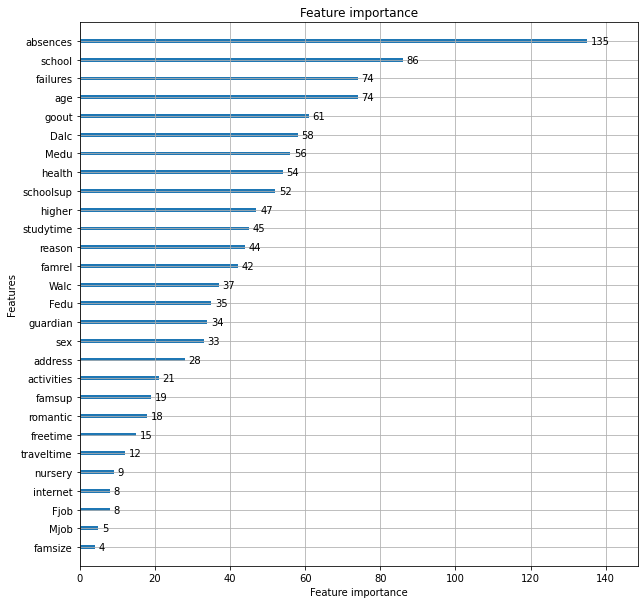

In [ ]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgbr, figsize=(10,10))
plt.show()

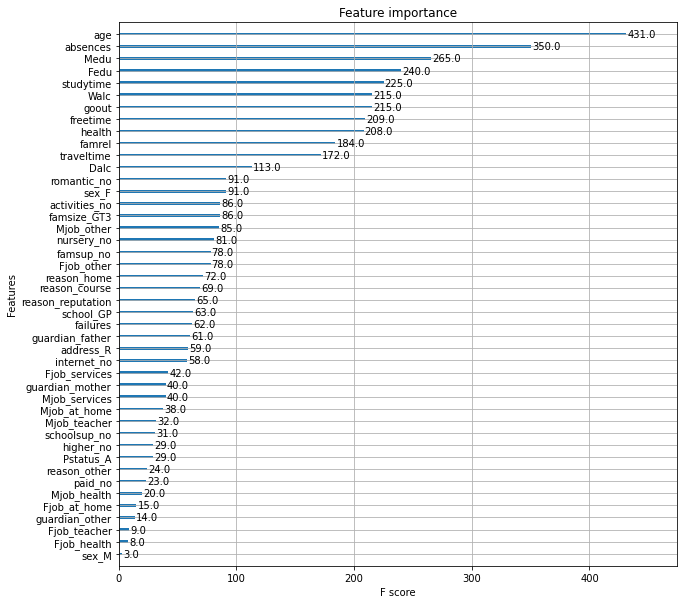

In [ ]:
xgbr.fit(X_train_oe, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(xgbr, ax=ax)
plt.show()

### 트리 그래프

- lightgbm은 부스팅 각 단계마다 추가된 트리를 시각화 할 수 있는 plot_tree()를 지원함.

- 이 함수에 모델 객체와 tree_index 매개변수에 시각화할 트리 인덱스를 지정하면 결정 트리 그래프와 비슷한 그래프를 그려줌.
- 트리 인덱스를 지정하지 않으면, 기본값이 0이 됨. 즉 앙상블의 첫 번째 트리가 그려짐.
- 기본적으로 왼쪽에서 오른쪽으로 가지가 뻗어가는 트리를 그려줌.
- orientation  매개변수를 'vertical'로 지정하면 루트 노트가 맨 위에서 시작하는 그래프를 그려줌.
- show_info 매개변수에는 노드 안에 포함될 정보를 지정할 수 있음. 여기에서는 'internal_count'와 'leat_node'를 추가하여 노드 안에 포함된 샘플의 개수를 나타냄.,

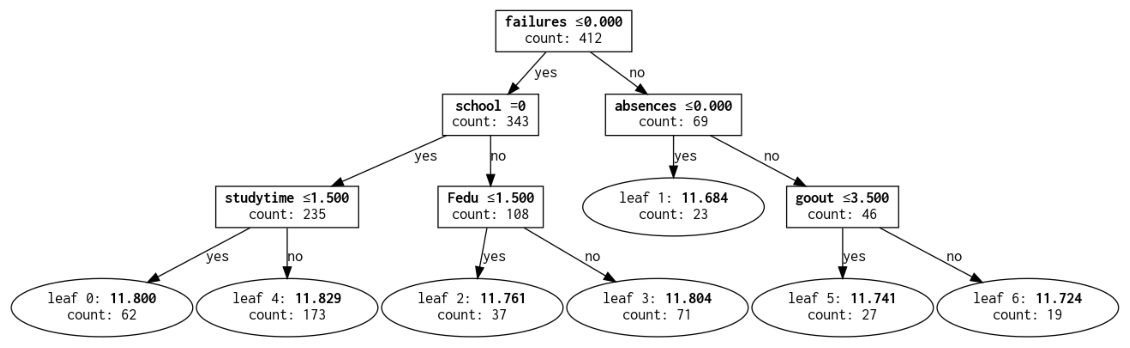

In [ ]:
lgb.plot_tree(lgbr, tree_index=0, figsize=(20,10),
              orientation='vertical',
              show_info=['internal_count', 'leaf_count'])
plt.show()

- 리프별 트리 성장 과정을 확인하기 위해 num_leaves 매개변수 값을 3에서 8까지 늘려가며 앙상블의 첫 번째 트리 그래프로 그려봄.
- 노드의 분할로 얻는 이득을 표시하기 위해 show_info 매개변수에 'split_gain'을 지정함.

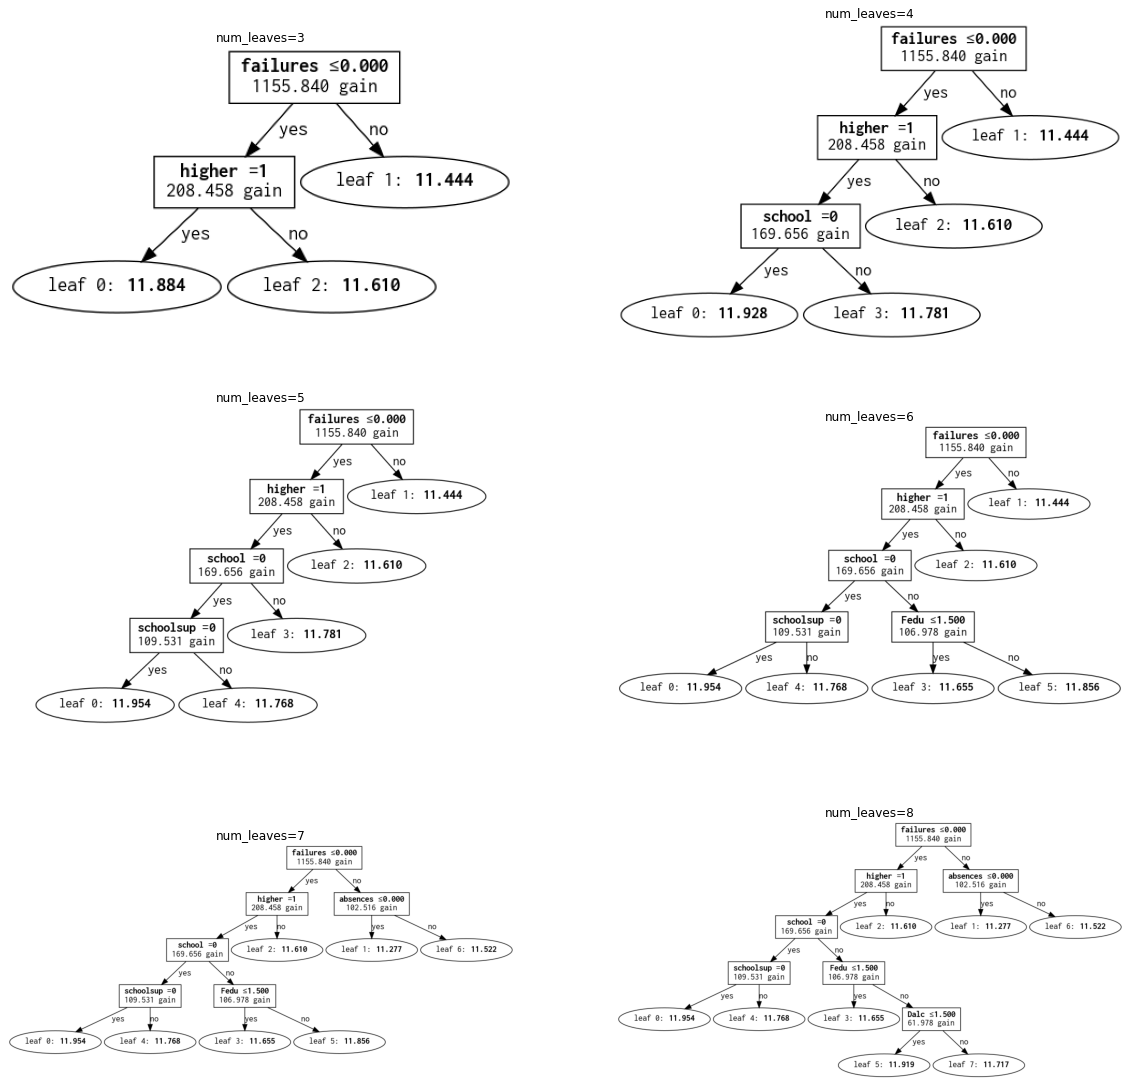

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
for i in range(0, 3):
    for j in range(0, 2):
        lgbr2 = lgb.LGBMRegressor(num_leaves=i*2+j+3)
        lgbr2.fit(X_train, y_train)
        lgb.plot_tree(lgbr2, tree_index=0, show_info=['split_gain'],
                      orientation='vertical', ax=axs[i, j])
        axs[i, j].set_title('num_leaves={}'.format(i*2+j+3))

- 왼쪽 맨 위부터 num_leaves를 증가되면서 트리가 왼쪽 가지 쪽으로 성장하는 과정을 볼 수 있다.  num_leaves=7에서는 왼쪽 가지를 따라 성장하는 과정을 멈추고 루트 노드의 오른쪽 가지가 분할되었음.
- 노드에 표시된 gain 점수로도 유추할 수 있듯이 리프별 노드 성장은 분할로 인해 가장 큰 이득을 얻는 리프 순서대로 분할을 함.

- xgboost에서도 트리를 그리는 plot_tree()함수를 제공. num_trees 매개변수로 출력할 트리의 인덱스를 지정. 기본값은 0, ax 매개변수에 matplotlib의 Axes 객체를 전달함.

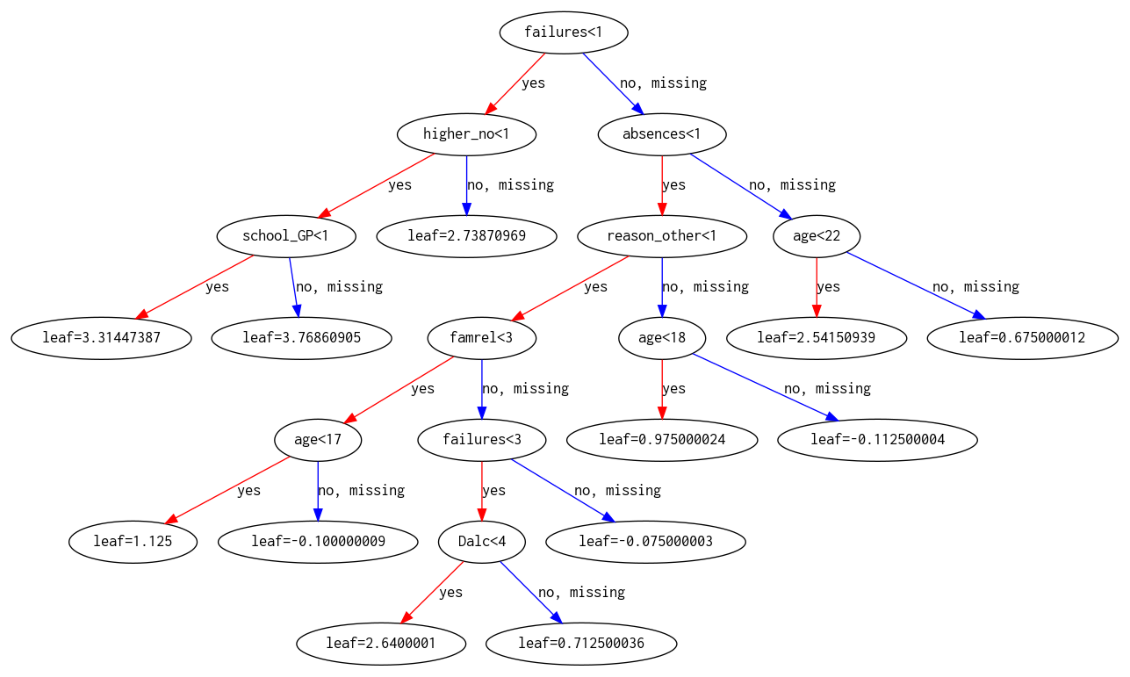

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgbr, num_trees=0, ax=ax)
plt.show()

## HistGradientBoostingRegressor
- lightgbm에서 영향을 많이 받음.
- max_iter 매개변수는 부스팅 반복 횟수를 지정하며 기본값은 100.
- max_depth는 트리깊이를 지정하며 기본값은 None
- max_leaf_nodes : 트리의 최대 리프 노드 개수를 지정. default=31
- min_samples_leaf : 리프 노드의 최소 샘플 개수를 지정. deafult=20
- learning_rate : 학습률. default=0.1

- 사이킷런의 히스토그램 기반 그레이디언트 부스팅은 아직 특성과 샘플의 랜덤 샘플링 기능을 제공하지 않음.



- 사이킷런 0.24 버전에서는 범주형 특성을 지원하는 categorical_feature 매개변수가 추가되었음.
- 이 매개변수에는 범주형 특성의 인덱스나 범주형 특성 위치를 표현한 불리언 배열을 전달함.
- 범주형 특성의 값을 문자가 아니라 정수로 바꾸어야 하기 때문에 OrdinalEncoder를 사용함.

- OrdinalEncoder가 변환할 범주형 열을 알려주기 위하여 dtype이 category인 열을 표시하는 불리언 배열  cat_columns_bool을 만듭니다. ColumnTransfoer가 나머지 열을 그대로 통과시키도록 하기 위해 remainder = 'passthrough'로 지정함.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_columns_bool = X_train.dtypes=='category'
ct = ColumnTransformer([('ord', OrdinalEncoder(), cat_columns_bool)],
                       remainder='passthrough')
X_train_ord = ct.fit_transform(X_train)

In [ ]:
import numpy as np
cat_num_names = np.append(ct.feature_names_in_[cat_columns_bool],
                          ct.feature_names_in_[~cat_columns_bool])

X_train_ord = pd.DataFrame(X_train_ord, columns=cat_num_names)[X_train.columns]
X_train_ord.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0.0,0.0,16.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,...,1.0,1.0,0.0,4.0,5.0,2.0,1.0,2.0,3.0,0.0
1,0.0,1.0,15.0,1.0,0.0,1.0,2.0,2.0,3.0,3.0,...,1.0,1.0,0.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,15.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,...,1.0,1.0,0.0,4.0,3.0,3.0,1.0,1.0,5.0,0.0
3,0.0,1.0,16.0,1.0,0.0,1.0,3.0,1.0,2.0,2.0,...,1.0,0.0,0.0,5.0,3.0,2.0,2.0,2.0,5.0,0.0
4,1.0,0.0,16.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,...,0.0,1.0,0.0,4.0,4.0,5.0,1.0,3.0,3.0,0.0


- X_train 에서 NaN으로 표시된 누락된 값은 OrdinalEncoder를 통해서 바뀌지 않음. 히스토그램 기반 그레이디언트 부스팅은 누락된 값을 자동으로 처리하므로 이에 대해 전처리 하지 않음.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(categorical_features=cat_columns_bool,
                                     random_state=42)

scores = cross_validate(hgbr, X_train_ord, y_train,
                        scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.8096716836564264

### 특성 중요도
- 사이킷런의 히스토그램 기반 그레디언트 부스팅 구현은 자체적으로 특성 중요도를 제공하지 않음. 대신 permutation_importance() 함수를 사용하여 훈련된 모델의 특성 중요도를 계산할 수 있음.
- 이 함수는 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변환하는지 관찰하여 특성의 중요도를 계산함. 이 함수는 그레이디언트 부스팅 모델뿐만 아니라 사이킷런에서 제공하는 모든 모델에 사용할 수 있음.

- sklearn.inspection 모듈에서 임포트하고 hgbr 모델을 훈련한 다음 훈련 세트를 전달하여 실행함. 이 함수는 기본적으로 각 특성마다 랜덤하게 섞는 과정을 다섯 번을 수행하여 평균을 냄. n_repeats 매개변수에서 이 횟수를 바꿀 수 있음.

In [ ]:
from sklearn.inspection import permutation_importance

hgbr.fit(X_train_ord, y_train)
result = permutation_importance(hgbr, X_train_ord, y_train, random_state=42)

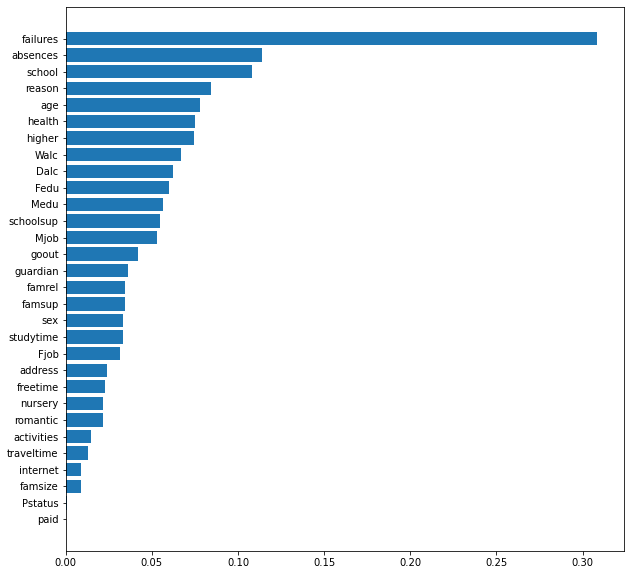

In [ ]:
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.show()

- 반환된 results 딕셔너리에는 'importance'키에 각 특성마다 n_repeats 횟수만큼의 점수가 담겨 있음.
 - 'importance_mean'에는 이 점수의 평균이 저장되어 있고 'importances_std'에는 표준편차 값이 계산되어 있음. 'importance_mean'에 저장된 값을 크기 순서대로 나열해보자.

## CatBoost

- 범주형 특성을 잘 처리함.
- LightGBM처럼 범주형 특성을 원-핫 인코딩이나 정수 인코딩으로 바꿀 필요가 없음. 다만 모델을 훈련할 때, 어떤 특성이 범주형인지를 알려주어야 함.

- catboost는 XGBoost처럼 깊이별 트리 성장 방식을 사용하지만 대칭적인 구조를 가짐. 트리에서 깊이가 같은 노드는 모두 동일한 특성을 사용하여 분할. 이를 통해 속도를 높이고 과대적합을 방지. 하지만 grow_policy 매개변수에서 깊이별 성장 방식인 'Depthwise'나 리프별 성장 방식인 'Lossguide'로 지정할 수 있음. 기본값은 대칭 트리를 만드는 'SymmetricTree'입니다.

- Catboost는 수치형 특성일 경우 기본적으로 누락된 값을 특성의 최솟값을 대체함. non_mode 매개변수에서 기본 동작 방식을 바꿀 수 있음. 에러를 발생시키는 'Forbidden'이나 특성의 최댓값으로 대체하는 'Max'가 있음.

- 하지만 범주형 특성의 경우 누락된 값을 처리하지 못함. 또 수치형일 경우에도 평균값으로 바꾸는 방법이 없음.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='most_frequent') #범주형인 경우 가장 많이 등장하는 값으로 대체
mean_imputer = SimpleImputer(strategy='mean') #수치형인 경우 평균값으로 바꿈.

ct2 = ColumnTransformer([('str', mode_imputer, cat_columns_bool),
                         ('num', mean_imputer, ~cat_columns_bool)])

X_train_ct = pd.DataFrame(ct2.fit_transform(X_train),
                          columns=cat_num_names)
X_train_ct = X_train_ct[X_train.columns]
X_train_ct.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,16.0,U,LE3,T,4.0,4.0,teacher,teacher,...,yes,yes,no,4.0,5.0,2.0,1.0,2.0,3.0,0.0
1,GP,M,15.0,U,GT3,T,2.0,2.0,services,services,...,yes,yes,no,5.0,4.0,1.0,1.0,1.0,1.0,0.0
2,GP,M,15.0,U,GT3,T,4.0,4.0,services,teacher,...,yes,yes,no,4.0,3.0,3.0,1.0,1.0,5.0,0.0
3,GP,M,16.0,U,GT3,T,3.0,1.0,other,other,...,yes,no,no,5.0,3.0,2.0,2.0,2.0,5.0,0.0
4,MS,F,16.0,R,LE3,T,1.0,2.0,at_home,other,...,no,yes,no,4.0,4.0,5.0,1.0,3.0,3.0,0.0


In [ ]:
param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(4, 10),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [ ]:
import catboost as cb

cat_columns_idx = np.where(cat_columns_bool)[0]

cbr = cb.CatBoostRegressor(cat_features=cat_columns_idx,
                           verbose=False, random_seed=42)

In [ ]:
rs = RandomizedSearchCV(cbr, param_grid, n_iter=100,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1, random_state=42)
rs.fit(X_train_ct, y_train)

print('최상의 매개변수:', rs.best_params_)
print('최상의 교차 검증 점수:', -rs.best_score_)

최상의 매개변수: {'depth': 6, 'grow_policy': 'Depthwise', 'learning_rate': 0.025924756604751586, 'min_child_samples': 12, 'n_estimators': 262}
최상의 교차 검증 점수: 2.605378509872569


In [ ]:
cbr = cb.CatBoostRegressor(cat_features=cat_columns_idx, verbose=False, random_seed=42)
result = cbr.randomized_search(param_grid, X_train_ct, y_train,
                               cv=5, n_iter=100, verbose=False)


bestTest = 9.62467499
bestIteration = 153


bestTest = 8.084724145
bestIteration = 236


bestTest = 8.842856681
bestIteration = 255


bestTest = 2.711456804
bestIteration = 256


bestTest = 10.11760234
bestIteration = 194


bestTest = 2.961680557
bestIteration = 259


bestTest = 9.18344069
bestIteration = 288


bestTest = 2.281776075
bestIteration = 113


bestTest = 3.704691868
bestIteration = 115


bestTest = 3.337367351
bestIteration = 210


bestTest = 9.434947261
bestIteration = 192


bestTest = 10.29300317
bestIteration = 182


bestTest = 8.814529058
bestIteration = 259


bestTest = 9.244708424
bestIteration = 112


bestTest = 2.407592485
bestIteration = 124


bestTest = 5.50056839
bestIteration = 291


bestTest = 2.266755652
bestIteration = 242


bestTest = 7.993441657
bestIteration = 237


bestTest = 8.084316077
bestIteration = 236


bestTest = 2.347391049
bestIteration = 166


bestTest = 2.344082578
bestIteration = 245


bestTest = 6.975334777
bestIteration = 114


bestTest = 8

In [ ]:
print('최상의 매개변수:', result['params'])
print('최상의 교차 검증 점수:', result['cv_results']['test-RMSE-mean'][-1])

최상의 매개변수: {'min_data_in_leaf': 15.0, 'depth': 8.0, 'learning_rate': 0.035124458577905505, 'iterations': 274.0, 'grow_policy': 'Lossguide'}
최상의 교차 검증 점수: 2.6947919449545523


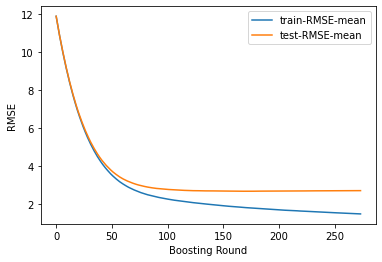

In [ ]:
plt.plot(result['cv_results']['train-RMSE-mean'], label='train-RMSE-mean')
plt.plot(result['cv_results']['test-RMSE-mean'], label='test-RMSE-mean')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### 모델 저장과 복원

- format에 저장 포맷을 지정할 수 있으며 기본값은 Catboost의 바이너리 포맷인 'cbm'입니다. 모델을 로그할 때는 훈련하지 않은 빈 모델 객체를 만든 후 load_model() 메서드를 호출.

In [ ]:
cbr.save_model('catboost_model.cbm')
cbr = cb.CatBoostRegressor().load_model('catboost_model.cbm')

In [ ]:
cbr.save_model('catboost_model.json', format='json')
cbr = cb.CatBoostRegressor().load_model('catboost_model.json', format='json')

In [ ]:
X_test_ct = pd.DataFrame(ct2.transform(X_test),
                         columns=cat_num_names)
X_test_ct = X_test_ct[X_test.columns]

y_pred = cbr.predict(X_test_ct)
mean_squared_error(y_pred, y_test, squared=False)

2.849254495441046

### 특성 중요도

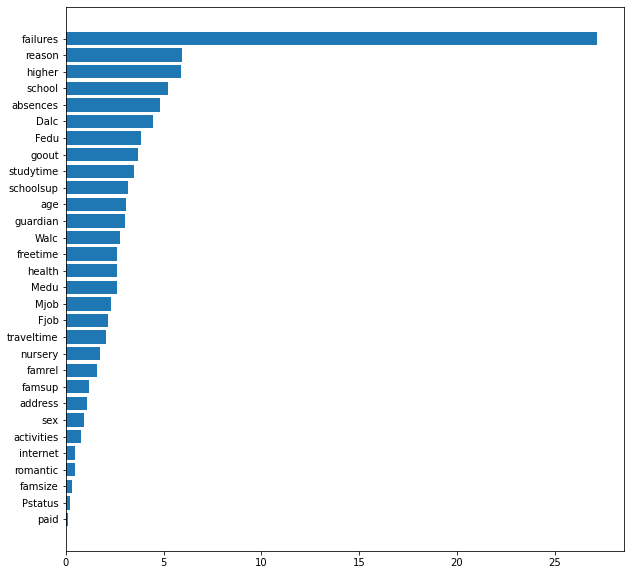

In [ ]:
feature_importances = cbr.get_feature_importance()
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.show()

- 사이킷런의 HistGradientBoostingRegressor 클래스와 비슷하게 failure를 가장 중요한 특성으로 사용하고 있음.